# Data Science Python

The goal is to learn about Python and commonly used Data Science libraries in the field.

We'll go over a bit of Python, Numpy and Pandas and then we'll load a WHO dataset and try to predict life expectancy given various factors.

## 1. Basic Python

#### Variables

Variables allow for storing any value with a label.
They can be used for later operations.

In [1]:
my_int = 3
my_float = 3.14
my_string = "hello"
my_list = [5, 23, 5]
my_dict = { "alice": 20, "bob": 21 }

print(my_int)
print(my_float)
print(my_string)
print(my_list[1])
print(my_dict["bob"])

3
3.14
hello
23
21


In [2]:
one = 1
two = 2

res = one + two
print(res)

3


#### Control flow

Control flow allows us to define conditions and branch of to different parts of code as we desire.

In [3]:
age = 20

if age < 18:
    print("You are under 18")
elif age >= 18 and age < 40:
    print("You are between 18 and 40")
else:
    print("You are over 40")

You are between 18 and 40


#### Loops

Repeat code until a condition is satisfied.

For loops are typically used to iterate over lists.

In [4]:
counter = 0
while counter < 5:
    print(counter)
    counter += 1

0
1
2
3
4


In [5]:
elems = [4, 334, 56]

for elem in elems:
    print(elem)

4
334
56


#### Functions

Functions allow to define routines that take inputs and return ouputs.

In [6]:
def add(input1, input2):
    return input1 + input2

res = add(1, 2)
print(res)

3


#### Classes

Classes allow for the creation of custom data types by composing already existing data types. The variables that compose a class are called attributes.

Functions, called methods in the context on a class can act upon the attributes of that class.

A class exists as an abstract blueprint. We say we instantiate a class when we define it into a variable. An instantiated class is called an object.

In [7]:
class Person:
    def __init__(self, name, age, university):
        self.name = name
        self.age = age
        self.university = university
        
    def is_over_18(self):
        return self.age >= 18
    
    def is_at_imperial(self):
        return self.university == 'imperial'
    
    def present(self):
        return f"Hi I'm {self.name}, I'm {self.age} and I study at {self.university}"

In [8]:
alice = Person("alice", 20, "imperial")
bob = Person("bob", 17, "ucl")

print(alice.is_over_18())
print(alice.present())
print(bob.present())

True
Hi I'm alice, I'm 20 and I study at imperial
Hi I'm bob, I'm 17 and I study at ucl


## 2. Numpy

Numpy is a powerful computing library, mainly used to efficiently manipulate n-dimensional arrays.

In [9]:
import numpy as np

#### Creating arrays and indexing

In [10]:
arr = np.array([1, 2, 3, 4, 5])

print(arr)
print(arr[1])
print(arr[-1])
print(arr[1:3])
print(arr[1:])
print(arr[:2])
print(arr[::2])

[1 2 3 4 5]
2
5
[2 3]
[2 3 4 5]
[1 2]
[1 3 5]


In [11]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [12]:
np.ones([3, 3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

#### Slicing

In [13]:
arr = np.array([[0,  1,  2],
                [3,  4,  5],
                [6,  7,  8],
                [9, 10, 11]])

print(arr[:, 0:2])

[[ 0  1]
 [ 3  4]
 [ 6  7]
 [ 9 10]]


#### Boolean indexing

In [14]:
a = np.arange(10)
print(a[a < 5]) # prints [0, 1, 2, 3, 4]
print(a[a % 2 == 0]) # prints [0, 2, 4, 6, 8]

[0 1 2 3 4]
[0 2 4 6 8]


#### Shapes

In [15]:
a = np.array([0, 1, 2])
print(a.shape) # prints 3

b = np.array([[0, 1, 2],
              [3, 4, 5],
              [6, 7, 8]])
print(b.shape) # prints (3, 3)

(3,)
(3, 3)


In [16]:
a = np.arange(9)
print(a)

a = a.reshape(3, 3)
print(a)

[0 1 2 3 4 5 6 7 8]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


#### Operations

In [17]:
a = np.arange(9)

print(a * a)
print(a / 2)
print(a.sum())
print(a.mean())
print(a.dot(a))

[ 0  1  4  9 16 25 36 49 64]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
36
4.0
204


## 3. Pandas

Pandas is a data analysis and manipulation library. It is typically used to load, manipulate and store data.

In [18]:
import pandas as pd

#### Series

Series are one dimensional array-like object which have and index.

Typically used to represent data across time or any value with respect to another value.

In [19]:
s = pd.Series([12, 312, 56, 32, 34], index=[0, 1, 2, 3, 4])
print(s)
print("")
print(s[2])

0     12
1    312
2     56
3     32
4     34
dtype: int64

56


#### DataFrames

DataFrames are like tables.

They are two dimensional data structures with an index and columns.

In [20]:
df = pd.DataFrame(
    {
        'col1': [1, 2],
        'col2': [3, 4]
    }
)

print(df)

   col1  col2
0     1     3
1     2     4


In [21]:
df['col2']

0    3
1    4
Name: col2, dtype: int64

## 4. WHO Example

We will load a dataset by the WHO that contains 2939 lines of data about life expectancy with lots of factors.

Factors include Measles rate, GDP, AIDS rate, Population, alcohol consumption etc.

The dataset is located under `workshops/data/life_expectancy.csv`

#### Loading the data

We will use a Pandas DataFrame to store the data from the csv file.

In [23]:
data = pd.read_csv('./data/life_expectancy.csv')
print(len(data))
display(data.head())
print(data.columns)

2938


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [24]:
# Rename column
data = data.rename(columns={
    'Life expectancy ': 'life expectancy',
    ' BMI ': 'bmi',
})
data.head()

,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
# We have some missing data ! notice the NaN values (Not a Number)
data.iloc[32]

Country                                Algeria
Year                                      2015
Status                              Developing
life expectancy                           75.6
Adult Mortality                             19
infant deaths                               21
Alcohol                                    NaN
percentage expenditure                       0
Hepatitis B                                 95
Measles                                     63
bmi                                       59.5
under-five deaths                           24
Polio                                       95
Total expenditure                          NaN
Diphtheria                                  95
 HIV/AIDS                                  0.1
GDP                                    4132.76
Population                         3.98715e+07
 thinness  1-19 years                        6
 thinness 5-9 years                        5.8
Income composition of resources          0.743
Schooling    

#### Cleaning the data

In [26]:
data = data.dropna()
len(data)

1649

#### Selecting data

In [66]:
data[data['Country'] == 'Ukraine']

,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2731,Ukraine,2014,Developing,78.0,23.0,4,8.06,5.663849,22.0,0,...,45.0,7.10,23.0,0.2,314.658296,45271947.0,2.3,2.4,0.746,15.2
2732,Ukraine,2013,Developing,71.0,198.0,4,8.44,52.425296,46.0,0,...,72.0,7.67,76.0,0.2,429.715540,454896.0,2.3,2.4,0.744,15.2
2733,Ukraine,2012,Developing,77.0,25.0,5,8.44,453.783085,46.0,12746,...,72.0,7.47,76.0,0.2,3855.421280,455933.0,2.4,2.4,0.739,15.1
2734,Ukraine,2011,Developing,75.0,24.0,5,8.48,415.162771,21.0,1333,...,54.0,6.98,5.0,0.2,3569.757270,45761.0,2.4,2.5,0.734,14.9
2735,Ukraine,2010,Developing,69.8,212.0,5,8.39,375.683538,48.0,39,...,57.0,7.81,52.0,0.2,2965.142365,45877.0,2.4,2.5,0.728,14.9
2736,Ukraine,2009,Developing,69.2,231.0,5,8.71,324.549135,66.0,0,...,74.0,7.80,71.0,0.3,2545.483410,46533.0,2.5,2.6,0.734,14.9
2737,Ukraine,2008,Developing,67.7,273.0,5,9.46,456.458666,84.0,48,...,91.0,6.63,9.0,0.4,3891.378230,462582.0,2.5,2.6,0.730,14.9
2738,Ukraine,2007,Developing,67.5,277.0,5,8.86,46.196854,92.0,1005,...,98.0,6.36,98.0,0.7,368.689980,465935.0,2.5,2.7,0.723,14.8
2739,Ukraine,2006,Developing,67.7,267.0,5,7.99,29.381727,96.0,42724,...,99.0,6.39,98.0,0.8,233.188310,4678775.0,2.6,2.7,0.716,14.7
2740,Ukraine,2005,Developing,67.0,278.0,5,7.31,217.434526,97.0,2392,...,95.0,6.41,96.0,0.9,1828.717626,471515.0,2.7,2.8,0.707,14.5


In [76]:
data[data['Hepatitis B'] < 5]

,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
461,Cabo Verde,2002,Developing,77.0,148.0,0,3.82,155.207267,4.0,0,...,92.0,5.17,91.0,0.8,1373.515636,45216.0,9.2,9.1,0.569,11.3
531,Chad,2012,Developing,51.8,367.0,46,0.62,57.824271,4.0,120,...,51.0,3.00,4.0,3.6,973.472574,1275135.0,9.0,8.9,0.381,7.3
835,Equatorial Guinea,2014,Developing,57.9,32.0,3,0.01,13.404774,2.0,13,...,24.0,3.80,2.0,4.4,192.597330,1129424.0,8.5,8.4,0.582,9.2
1784,Myanmar,2011,Developing,65.6,27.0,47,0.33,21.236988,4.0,2046,...,9.0,1.87,84.0,0.5,1186.423937,555331.0,13.0,13.3,0.526,9.1
1825,Nepal,2003,Developing,64.3,22.0,38,0.20,2.790965,2.0,13344,...,76.0,5.48,78.0,0.1,253.724120,2495623.0,18.0,18.6,0.457,9.2
1832,Netherlands,2012,Developed,81.1,62.0,1,9.05,1162.656768,2.0,10,...,97.0,11.10,97.0,0.1,49474.756100,16754962.0,1.0,0.9,0.921,18.1
1833,Netherlands,2011,Developed,81.1,63.0,1,8.96,1047.370244,2.0,51,...,97.0,1.53,97.0,0.1,5354.653600,1669374.0,1.0,0.9,0.911,17.2
2745,Ukraine,2000,Developing,67.5,257.0,6,4.49,7.883791,4.0,817,...,99.0,5.59,99.0,0.7,635.789635,49175848.0,3.0,3.1,0.669,13.3


#### Grouping & apply

Let's see how we can compute the average life expectancy per country with the data we have

In [46]:
# We start by grouping by country
data.groupby('Country').apply(lambda it: display(it))

,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
21,Albania,2010,Developing,76.2,91.0,1,5.28,41.822757,99.0,10,...,99.0,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5
22,Albania,2009,Developing,76.1,91.0,1,5.79,348.055952,98.0,0,...,98.0,5.79,98.0,0.1,4114.136545,2927519.0,1.5,1.6,0.721,12.2
23,Albania,2008,Developing,75.3,1.0,1,5.61,36.622068,99.0,0,...,99.0,5.87,99.0,0.1,437.539647,2947314.0,1.6,1.6,0.713,12.0
24,Albania,2007,Developing,75.9,9.0,1,5.58,32.246552,98.0,22,...,99.0,6.10,98.0,0.1,363.136850,29717.0,1.6,1.7,0.703,11.6
25,Albania,2006,Developing,74.2,99.0,1,5.31,3.302154,98.0,68,...,97.0,5.86,97.0,0.1,35.129300,2992547.0,1.7,1.8,0.696,11.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
33,Algeria,2014,Developing,75.4,11.0,21,0.01,54.237318,95.0,0,...,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012,Developing,75.1,113.0,21,0.66,555.926083,95.0,18,...,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
36,Algeria,2011,Developing,74.9,116.0,21,0.56,509.002041,95.0,112,...,95.0,5.29,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0
37,Algeria,2010,Developing,74.7,119.0,21,0.45,430.717586,95.0,103,...,95.0,5.12,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
38,Algeria,2009,Developing,74.4,123.0,20,0.50,352.063642,94.0,107,...,94.0,5.36,95.0,0.1,3868.831230,3546576.0,6.0,5.9,0.705,13.1
39,Algeria,2008,Developing,74.1,126.0,20,0.46,43.087173,91.0,217,...,92.0,4.20,93.0,0.1,495.254866,3486715.0,6.0,5.9,0.697,12.6
40,Algeria,2007,Developing,73.8,129.0,20,0.44,320.323924,9.0,0,...,95.0,3.82,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
41,Algeria,2006,Developing,73.4,132.0,20,0.36,270.240196,8.0,944,...,95.0,3.36,95.0,0.1,3464.617900,33777915.0,6.1,6.0,0.686,12.3
42,Algeria,2005,Developing,72.9,136.0,19,0.50,2.548923,83.0,2302,...,88.0,3.24,88.0,0.1,31.122378,33288437.0,6.1,6.0,0.680,12.0


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
49,Angola,2014,Developing,51.7,348.0,67,8.33,23.965612,64.0,11699,...,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
50,Angola,2013,Developing,51.1,355.0,69,8.10,35.958573,77.0,8523,...,67.0,4.26,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
51,Angola,2012,Developing,56.0,358.0,72,8.24,256.122524,75.0,4458,...,75.0,3.30,75.0,2.6,4598.249988,259615.0,8.8,8.6,0.508,10.3
52,Angola,2011,Developing,51.0,361.0,75,8.06,239.891392,72.0,1449,...,73.0,3.38,71.0,2.5,4299.128890,24218565.0,8.9,8.8,0.495,9.4
53,Angola,2010,Developing,49.6,365.0,78,7.80,191.653741,77.0,1190,...,81.0,3.39,77.0,2.5,3529.534820,23369131.0,9.1,9.0,0.488,9.0
54,Angola,2009,Developing,49.1,369.0,81,7.01,212.922933,61.0,2807,...,63.0,4.37,6.0,2.5,3347.844850,22549547.0,9.3,9.2,0.480,8.5
55,Angola,2008,Developing,48.7,371.0,84,7.07,249.910196,69.0,265,...,65.0,3.84,69.0,2.6,3868.578883,2175942.0,9.5,9.4,0.468,8.1
56,Angola,2007,Developing,48.2,375.0,87,6.35,184.821345,73.0,1014,...,75.0,3.38,73.0,2.6,2878.837144,2997687.0,9.6,9.6,0.454,7.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
81,Argentina,2014,Developing,76.2,118.0,8,7.93,847.371746,94.0,1,...,92.0,4.79,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3
82,Argentina,2013,Developing,76.0,119.0,8,8.28,1001.796332,94.0,0,...,99.0,4.99,94.0,0.1,12976.636420,42539925.0,1.0,0.9,0.823,17.3
83,Argentina,2012,Developing,75.9,12.0,9,8.35,1133.558003,91.0,2,...,99.0,5.20,91.0,0.1,12969.771200,4296739.0,1.0,0.9,0.822,17.2
84,Argentina,2011,Developing,75.7,12.0,9,8.11,1504.329462,91.0,3,...,93.0,5.89,91.0,0.1,12726.983600,41656879.0,1.0,0.9,0.816,17.1
85,Argentina,2010,Developing,75.5,121.0,10,8.15,187.610955,94.0,17,...,95.0,6.55,94.0,0.1,1276.265000,41223889.0,1.0,0.9,0.802,16.8
86,Argentina,2009,Developing,75.6,126.0,10,8.33,1398.042623,94.0,3,...,97.0,7.63,94.0,0.1,8161.369660,479947.0,1.0,0.9,0.794,16.5
87,Argentina,2008,Developing,75.4,126.0,10,8.41,1413.735430,9.0,0,...,94.0,6.66,93.0,0.1,8953.359275,4382389.0,1.0,0.9,0.792,16.3
88,Argentina,2007,Developing,74.8,129.0,10,8.16,1105.659031,85.0,0,...,92.0,6.49,91.0,0.1,7193.617640,3997224.0,1.1,0.9,0.788,16.3
89,Argentina,2006,Developing,75.2,127.0,11,7.75,961.177468,84.0,0,...,92.0,6.68,91.0,0.1,5878.761270,3955889.0,1.1,0.9,0.782,16.1
90,Argentina,2005,Developing,74.9,127.0,11,7.53,96.166534,88.0,0,...,95.0,6.85,98.0,0.1,576.883829,39145488.0,1.1,1.0,0.780,16.3


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
97,Armenia,2014,Developing,74.6,12.0,1,3.91,295.608714,93.0,13,...,95.0,4.48,93.0,0.1,3994.712355,29622.0,2.1,2.1,0.739,12.7
98,Armenia,2013,Developing,74.4,123.0,1,3.79,279.429081,95.0,10,...,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,2.1,0.736,12.7
99,Armenia,2012,Developing,74.4,121.0,1,3.89,274.152699,95.0,0,...,96.0,4.48,95.0,0.1,3684.848100,2881922.0,2.0,2.1,0.732,12.7
100,Armenia,2011,Developing,73.9,128.0,1,4.09,260.996383,95.0,0,...,96.0,3.71,95.0,0.1,3526.978143,2875581.0,2.0,2.1,0.729,12.7
101,Armenia,2010,Developing,73.5,132.0,1,4.23,224.321201,94.0,2,...,96.0,4.56,94.0,0.1,3218.381655,2877311.0,2.0,2.1,0.720,12.3
102,Armenia,2009,Developing,73.3,137.0,1,3.96,201.185546,93.0,0,...,94.0,4.55,93.0,0.1,2993.832531,2888584.0,2.0,2.1,0.725,11.9
103,Armenia,2008,Developing,73.2,14.0,1,3.96,2.888898,89.0,0,...,91.0,3.80,89.0,0.1,41.269970,29822.0,2.0,2.1,0.721,12.3
104,Armenia,2007,Developing,73.5,132.0,1,3.99,44.572200,85.0,1,...,9.0,4.31,88.0,0.1,3138.887300,293356.0,2.0,2.1,0.707,11.7
105,Armenia,2006,Developing,72.9,141.0,1,4.01,244.535277,78.0,137,...,87.0,4.58,87.0,0.1,2158.299000,29585.0,2.0,2.1,0.692,11.2
106,Armenia,2005,Developing,73.0,137.0,1,4.25,20.218228,91.0,2281,...,92.0,5.25,9.0,0.1,1643.758397,2981259.0,2.0,2.1,0.679,10.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.363050,91.0,340,...,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.853810,91.0,158,...,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,1,10.03,11714.998580,91.0,199,...,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,1,10.30,10986.265270,92.0,190,...,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8
117,Australia,2010,Developed,81.9,64.0,1,10.52,8875.786493,92.0,70,...,92.0,9.20,92.0,0.1,51874.84800,223175.0,0.7,0.6,0.927,19.5
118,Australia,2009,Developed,81.7,66.0,1,10.62,7172.275229,94.0,104,...,92.0,9.50,92.0,0.1,42742.99898,216917.0,0.7,0.6,0.925,19.1
119,Australia,2008,Developed,81.3,66.0,1,10.76,8547.292357,94.0,65,...,92.0,8.78,92.0,0.1,49664.68540,212492.0,0.7,0.6,0.921,19.1
120,Australia,2007,Developed,81.3,66.0,1,10.56,872.598609,94.0,11,...,92.0,8.53,92.0,0.1,4991.98289,28276.0,0.7,0.6,0.918,19.0
121,Australia,2006,Developed,81.2,66.0,1,10.31,6187.062017,95.0,0,...,92.0,8.49,92.0,0.1,36118.28381,26979.0,0.7,0.6,0.915,20.3
122,Australia,2005,Developed,81.0,67.0,1,10.30,579.133164,95.0,10,...,92.0,8.45,92.0,0.1,3416.71483,23948.0,0.7,0.6,0.910,20.3


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
129,Austria,2014,Developed,81.4,66.0,0,12.32,8350.193523,98.0,117,...,98.0,11.21,98.0,0.1,51322.63997,8541575.0,1.8,2.0,0.892,15.9
130,Austria,2013,Developed,81.1,68.0,0,11.82,90.585012,95.0,0,...,95.0,11.14,95.0,0.1,554.71532,8479375.0,1.8,2.0,0.887,15.7
131,Austria,2012,Developed,88.0,7.0,0,12.26,7878.372355,92.0,36,...,92.0,11.17,92.0,0.1,48333.57273,8429991.0,1.8,2.0,0.884,15.7
132,Austria,2011,Developed,88.0,73.0,0,12.04,8272.306757,89.0,68,...,89.0,1.94,89.0,0.1,51126.74139,8391643.0,1.7,2.0,0.880,15.7
133,Austria,2010,Developed,84.0,75.0,0,12.10,7423.228774,86.0,52,...,86.0,11.17,86.0,0.1,46657.62900,836344.0,1.7,1.9,0.872,15.4
134,Austria,2009,Developed,82.0,77.0,0,11.30,8053.557638,83.0,49,...,83.0,11.19,83.0,0.1,47654.18721,8343323.0,1.7,1.9,0.870,15.3
135,Austria,2008,Developed,84.0,76.0,0,12.00,8329.731655,83.0,448,...,83.0,1.60,83.0,0.1,51386.37665,8321496.0,1.7,1.9,0.864,15.1
136,Austria,2007,Developed,81.0,8.0,0,12.50,7453.864400,85.0,20,...,85.0,1.40,85.0,0.1,46586.65250,8295487.0,1.7,1.9,0.860,15.2
137,Austria,2006,Developed,79.8,81.0,0,12.40,69.928994,83.0,23,...,83.0,1.35,83.0,0.1,443.99361,8268641.0,1.7,1.9,0.854,15.0
138,Austria,2005,Developed,79.4,85.0,0,12.40,5992.588029,86.0,9,...,86.0,1.53,86.0,0.1,38242.42520,8227829.0,1.7,1.9,0.848,14.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
145,Azerbaijan,2014,Developing,72.5,119.0,5,0.01,306.182431,94.0,0,...,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2
146,Azerbaijan,2013,Developing,72.2,121.0,5,2.14,275.651493,93.0,164,...,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9
147,Azerbaijan,2012,Developing,71.9,123.0,5,0.01,285.610391,88.0,0,...,92.0,5.37,89.0,0.1,7496.335728,9295784.0,2.8,2.8,0.742,11.8
148,Azerbaijan,2011,Developing,71.6,125.0,5,1.98,263.142699,84.0,0,...,91.0,5.10,87.0,0.1,7189.691229,917382.0,2.8,2.9,0.741,11.7
149,Azerbaijan,2010,Developing,71.1,13.0,5,1.98,246.568601,8.0,0,...,85.0,5.33,81.0,0.1,5842.857840,954332.0,2.8,2.9,0.737,11.7
150,Azerbaijan,2009,Developing,78.0,132.0,6,2.10,22.486384,74.0,0,...,84.0,5.85,81.0,0.1,495.294791,8947243.0,2.8,2.9,0.728,11.6
151,Azerbaijan,2008,Developing,73.0,141.0,6,1.18,206.261613,68.0,5,...,85.0,4.37,81.0,0.1,5574.638200,87634.0,2.8,2.9,0.719,11.6
152,Azerbaijan,2007,Developing,73.0,14.0,6,1.02,176.010711,62.0,0,...,81.0,5.10,79.0,0.1,3851.437869,85813.0,2.8,2.9,0.708,11.6
153,Azerbaijan,2006,Developing,69.2,154.0,6,0.85,105.633726,52.0,222,...,8.0,6.17,78.0,0.1,2473.857760,848455.0,2.9,2.9,0.682,10.7
154,Azerbaijan,2005,Developing,68.4,162.0,6,0.73,81.288831,49.0,1238,...,79.0,7.86,75.0,0.1,1578.423900,839185.0,2.9,3.0,0.675,11.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
193,Bangladesh,2014,Developing,71.4,132.0,98,0.01,10.446403,97.0,289,...,97.0,2.82,97.0,0.1,184.565430,15945279.0,18.1,18.6,0.570,10.0
194,Bangladesh,2013,Developing,71.0,135.0,104,0.01,52.829865,96.0,237,...,96.0,2.88,96.0,0.1,951.889454,157571292.0,18.3,18.8,0.565,10.0
195,Bangladesh,2012,Developing,77.0,137.0,111,0.01,59.258926,94.0,1986,...,94.0,3.80,94.0,0.1,856.342857,15572753.0,18.5,19.0,0.557,9.9
196,Bangladesh,2011,Developing,73.0,14.0,118,0.01,62.349885,96.0,5625,...,96.0,3.16,96.0,0.1,835.789341,153911916.0,18.7,19.2,0.545,9.4
197,Bangladesh,2010,Developing,69.9,142.0,126,0.01,62.659454,94.0,788,...,94.0,3.60,94.0,0.1,757.671757,15214912.0,18.9,19.4,0.535,8.9
198,Bangladesh,2009,Developing,69.5,144.0,135,0.01,53.264004,97.0,718,...,97.0,2.91,97.0,0.1,681.125368,1545478.0,19.1,19.7,0.523,8.4
199,Bangladesh,2008,Developing,69.1,147.0,144,0.01,42.488650,96.0,2660,...,96.0,2.85,96.0,0.1,615.777541,14885814.0,19.3,19.9,0.520,8.6
200,Bangladesh,2007,Developing,68.6,151.0,154,0.01,46.365367,95.0,2924,...,96.0,2.80,94.0,0.1,541.651484,147139191.0,19.5,2.1,0.513,8.6
201,Bangladesh,2006,Developing,68.2,152.0,164,0.01,42.330455,86.0,6192,...,95.0,2.80,94.0,0.1,494.514660,1453684.0,19.7,2.3,0.506,8.4
202,Bangladesh,2005,Developing,67.8,155.0,174,0.01,38.054620,45.0,25934,...,94.0,2.68,93.0,0.1,484.155471,14343111.0,19.9,2.5,0.499,8.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
225,Belarus,2014,Developing,72.0,199.0,0,13.94,1147.111400,97.0,64,...,97.0,5.69,97.0,0.1,8318.429294,9474511.0,1.9,2.0,0.796,15.7
226,Belarus,2013,Developing,71.7,23.0,0,14.66,1109.854619,98.0,16,...,98.0,6.70,98.0,0.1,7978.825443,9465997.0,2.0,2.0,0.796,15.7
227,Belarus,2012,Developing,71.9,194.0,0,16.35,91.709621,97.0,10,...,98.0,5.10,98.0,0.1,694.243915,9464495.0,2.0,2.1,0.793,15.6
228,Belarus,2011,Developing,72.0,232.0,0,17.31,846.911307,98.0,50,...,98.0,4.92,98.0,0.1,6519.717530,9473172.0,2.0,2.1,0.787,15.5
229,Belarus,2010,Developing,73.0,222.0,0,14.44,8.494095,96.0,1,...,99.0,5.55,98.0,0.1,63.388770,949583.0,2.0,2.2,0.780,15.5
230,Belarus,2009,Developing,70.0,226.0,0,14.09,434.798503,98.0,0,...,98.0,6.90,96.0,0.1,5176.172649,956765.0,2.1,2.2,0.771,15.4
231,Belarus,2008,Developing,70.0,224.0,1,14.67,501.805614,98.0,0,...,98.0,5.95,97.0,0.1,6376.183153,9527985.0,2.1,2.3,0.755,15.1
232,Belarus,2007,Developing,69.8,226.0,1,14.22,464.077513,91.0,1,...,9.0,6.44,95.0,0.1,4735.484827,956953.0,2.2,2.3,0.739,14.9
233,Belarus,2006,Developing,68.9,243.0,1,12.60,364.426052,98.0,149,...,97.0,6.34,99.0,0.1,3848.215966,964924.0,2.2,2.4,0.723,14.6
234,Belarus,2005,Developing,68.1,252.0,1,11.01,45.650078,99.0,1,...,98.0,6.89,99.0,0.1,3126.717670,9663915.0,2.3,2.5,0.713,14.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
241,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.0,70,...,99.0,1.59,99.0,0.1,47439.39684,112957.0,1.0,1.0,0.890,16.3
242,Belgium,2013,Developed,87.0,77.0,0,11.77,702.359357,98.0,39,...,99.0,1.57,99.0,0.1,4651.38647,11182817.0,1.0,0.9,0.889,16.3
243,Belgium,2012,Developed,83.0,78.0,0,10.08,664.473897,98.0,109,...,99.0,1.54,99.0,0.1,4474.57170,11128246.0,0.9,0.9,0.886,16.2
244,Belgium,2011,Developed,83.0,8.0,0,10.11,713.529735,97.0,576,...,98.0,1.42,98.0,0.1,4772.77415,1147744.0,0.9,0.9,0.884,16.1
245,Belgium,2010,Developed,80.0,81.0,0,10.22,665.735612,97.0,40,...,98.0,1.17,98.0,0.1,4438.23741,1895586.0,0.9,0.9,0.878,15.9
246,Belgium,2009,Developed,79.8,85.0,0,10.05,671.937657,97.0,33,...,98.0,1.39,98.0,0.1,4488.56150,1796493.0,0.9,0.9,0.876,15.8
247,Belgium,2008,Developed,79.5,87.0,0,10.47,7191.051507,98.0,98,...,99.0,9.60,99.0,0.1,48424.58927,179973.0,0.8,0.8,0.874,15.8
248,Belgium,2007,Developed,79.5,86.0,0,10.25,640.356092,94.0,64,...,99.0,9.25,98.0,0.1,4443.83131,16257.0,0.8,0.8,0.871,15.8
249,Belgium,2006,Developed,79.4,85.0,0,10.98,5579.199083,94.0,15,...,99.0,9.17,98.0,0.1,38852.36130,1547958.0,0.8,0.8,0.865,15.7
250,Belgium,2005,Developed,78.9,89.0,0,12.27,5068.214488,77.0,26,...,97.0,9.24,97.0,0.1,36967.28292,1478617.0,0.8,0.8,0.861,15.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
257,Belize,2014,Developing,70.0,177.0,0,6.58,670.092088,95.0,0,...,95.0,5.79,95.0,0.2,4852.223666,351694.0,3.4,3.4,0.705,12.8
258,Belize,2013,Developing,69.8,18.0,0,6.56,629.201859,95.0,0,...,95.0,5.79,95.0,0.2,4688.538443,344181.0,3.4,3.4,0.706,12.9
259,Belize,2012,Developing,69.4,189.0,0,6.66,582.802718,98.0,0,...,98.0,5.45,98.0,0.1,4673.638480,33671.0,3.5,3.4,0.702,12.5
260,Belize,2011,Developing,69.4,188.0,0,6.64,605.628689,95.0,0,...,95.0,5.61,95.0,0.5,4516.246750,329192.0,3.5,3.4,0.700,12.4
261,Belize,2010,Developing,69.5,186.0,0,6.76,569.952712,96.0,0,...,96.0,5.85,96.0,0.2,4344.151770,32168.0,3.5,3.4,0.700,12.4
262,Belize,2009,Developing,69.5,184.0,0,6.85,549.809610,97.0,0,...,98.0,5.81,97.0,0.3,4258.788611,313929.0,3.5,3.4,0.700,12.7
263,Belize,2008,Developing,69.6,181.0,0,7.22,51.252324,94.0,0,...,94.0,5.90,94.0,0.1,447.227960,36165.0,3.5,3.4,0.699,12.8
264,Belize,2007,Developing,69.6,181.0,0,7.24,69.630510,96.0,0,...,97.0,4.76,96.0,0.6,4324.876427,29847.0,3.5,3.5,0.700,12.8
265,Belize,2006,Developing,69.4,184.0,0,6.48,387.332493,98.0,0,...,98.0,4.40,98.0,0.6,4187.378300,29747.0,3.6,3.5,0.692,12.3
266,Belize,2005,Developing,69.0,191.0,0,6.25,365.799896,96.0,0,...,96.0,4.45,96.0,0.8,3933.332215,283277.0,3.6,3.5,0.695,12.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
273,Benin,2014,Developing,59.7,252.0,25,0.01,90.122068,78.0,786,...,74.0,4.59,78.0,1.1,943.686575,1286712.0,7.1,6.9,0.475,10.7
274,Benin,2013,Developing,59.5,251.0,25,0.01,87.408042,77.0,637,...,73.0,4.59,77.0,1.2,915.267459,14451.0,7.2,7.1,0.466,10.3
275,Benin,2012,Developing,59.3,251.0,25,0.01,9.804075,8.0,288,...,8.0,4.86,8.0,1.3,837.955100,972916.0,7.4,7.3,0.458,10.0
276,Benin,2011,Developing,59.1,251.0,25,1.40,110.263362,75.0,426,...,77.0,5.37,75.0,1.4,825.942785,94682.0,7.6,7.5,0.454,9.8
277,Benin,2010,Developing,58.7,254.0,25,1.33,94.257379,76.0,392,...,77.0,4.95,76.0,1.4,757.695974,9199259.0,7.8,7.6,0.451,9.5
278,Benin,2009,Developing,58.4,259.0,25,1.16,71.013992,79.0,1461,...,8.0,4.46,79.0,1.6,793.452430,894476.0,7.9,7.8,0.448,9.3
279,Benin,2008,Developing,57.6,278.0,25,1.28,7.615430,75.0,928,...,77.0,4.20,75.0,1.8,82.151350,8696916.0,8.1,8.0,0.444,9.1
280,Benin,2007,Developing,57.1,283.0,25,1.12,7.492818,82.0,341,...,82.0,4.55,82.0,2.0,76.535419,8454791.0,8.3,8.2,0.438,8.9
281,Benin,2006,Developing,56.8,284.0,25,1.19,75.914295,74.0,176,...,76.0,4.75,74.0,2.0,625.839200,8216896.0,8.5,8.4,0.434,8.7
282,Benin,2005,Developing,56.5,285.0,25,1.13,7.106997,7.0,210,...,73.0,4.73,7.0,2.1,61.799977,7982225.0,8.7,8.6,0.430,8.5


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
289,Bhutan,2014,Developing,69.4,216.0,0,0.01,209.392134,99.0,0,...,98.0,3.57,99.0,0.5,2522.796800,776448.0,15.7,16.2,0.596,12.5
290,Bhutan,2013,Developing,69.1,219.0,0,0.01,19.790574,97.0,0,...,97.0,3.83,97.0,0.6,235.882889,764961.0,15.9,16.5,0.589,12.6
291,Bhutan,2012,Developing,68.7,223.0,0,0.01,188.737366,97.0,1,...,97.0,3.70,97.0,0.6,2422.816000,752967.0,16.1,16.7,0.581,12.3
292,Bhutan,2011,Developing,68.3,225.0,0,0.23,289.852406,95.0,10,...,95.0,4.73,95.0,0.5,2458.459760,7451.0,16.3,17.0,0.572,11.9
293,Bhutan,2010,Developing,67.9,228.0,1,0.28,244.039195,91.0,21,...,92.0,5.17,91.0,0.5,2178.921383,727641.0,16.6,17.3,0.000,11.4
294,Bhutan,2009,Developing,67.4,232.0,1,0.17,27.489070,93.0,6,...,93.0,6.30,93.0,0.4,177.234497,714458.0,16.8,17.5,0.000,10.9
295,Bhutan,2008,Developing,67.0,234.0,1,0.21,302.667579,96.0,7,...,96.0,6.58,96.0,0.4,1795.181370,795.0,17.1,17.8,0.000,10.5
296,Bhutan,2007,Developing,66.5,238.0,1,0.16,283.806236,95.0,11,...,93.0,5.88,95.0,0.3,1741.142552,686958.0,17.3,18.1,0.000,10.1
297,Bhutan,2006,Developing,65.8,245.0,1,0.29,169.202397,95.0,2,...,96.0,5.27,95.0,0.3,1335.456960,672228.0,17.5,18.3,0.000,9.6
298,Bhutan,2005,Developing,65.0,254.0,1,0.73,145.596544,95.0,11,...,95.0,5.28,95.0,0.3,1247.613920,656639.0,17.8,18.6,0.000,9.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
321,Bosnia and Herzegovina,2014,Developing,77.2,89.0,0,4.03,732.866249,89.0,3000,...,86.0,9.57,86.0,0.1,5193.949320,35662.0,2.4,2.4,0.742,14.2
322,Bosnia and Herzegovina,2013,Developing,77.0,9.0,0,4.12,75.610629,91.0,0,...,87.0,9.46,89.0,0.1,535.865550,364999.0,2.4,2.4,0.735,14.2
323,Bosnia and Herzegovina,2012,Developing,76.8,92.0,0,4.61,693.822646,92.0,22,...,87.0,9.94,92.0,0.1,4716.673325,36482.0,2.5,2.5,0.728,13.9
324,Bosnia and Herzegovina,2011,Developing,76.9,92.0,0,4.64,7.959131,88.0,10,...,89.0,9.71,88.0,0.1,55.156834,3688865.0,2.6,2.5,0.711,13.4
325,Bosnia and Herzegovina,2010,Developing,76.4,94.0,0,4.54,630.388356,89.0,45,...,9.0,9.58,89.0,0.1,4611.472980,372284.0,2.6,2.6,0.717,13.3
326,Bosnia and Herzegovina,2009,Developing,76.1,97.0,0,4.75,645.021302,9.0,22,...,9.0,9.64,9.0,0.1,4697.897320,3746561.0,2.7,2.7,0.716,13.3
327,Bosnia and Herzegovina,2008,Developing,76.0,98.0,0,5.13,66.046350,88.0,8,...,92.0,8.58,91.0,0.1,575.316640,3763599.0,2.8,2.7,0.710,13.1
328,Bosnia and Herzegovina,2007,Developing,75.4,16.0,0,5.16,8.240356,94.0,166,...,95.0,8.37,95.0,0.1,418.292176,3774.0,2.8,2.8,0.703,12.9
329,Bosnia and Herzegovina,2006,Developing,75.7,1.0,0,4.82,38.254141,9.0,17,...,91.0,8.28,87.0,0.1,344.321698,3779468.0,2.9,2.8,0.697,12.7
330,Bosnia and Herzegovina,2005,Developing,75.0,12.0,0,4.56,45.713543,93.0,23,...,95.0,8.50,93.0,0.1,2968.411860,378153.0,2.9,2.9,0.000,12.5


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
337,Botswana,2014,Developing,65.1,268.0,2,0.01,662.802194,95.0,1,...,96.0,5.41,95.0,2.3,7497.762376,2168573.0,6.7,6.4,0.697,12.6
338,Botswana,2013,Developing,64.2,286.0,2,0.01,1.117811,95.0,1,...,96.0,5.84,95.0,2.8,77.625783,212857.0,7.0,6.7,0.693,12.6
339,Botswana,2012,Developing,63.4,3.0,2,0.01,12.834474,95.0,7,...,96.0,6.27,95.0,4.4,729.231453,289315.0,7.3,7.0,0.687,12.5
340,Botswana,2011,Developing,62.2,325.0,2,5.76,668.956285,95.0,8,...,96.0,5.25,95.0,5.5,7645.214690,251339.0,7.7,7.4,0.678,12.4
341,Botswana,2010,Developing,61.1,349.0,2,5.99,547.038668,95.0,853,...,96.0,5.64,95.0,6.2,6346.156240,214866.0,8.0,7.8,0.669,12.3
342,Botswana,2009,Developing,59.2,393.0,2,5.01,426.785566,94.0,184,...,96.0,6.39,96.0,9.0,5185.729845,1979882.0,8.4,8.2,0.661,12.2
343,Botswana,2008,Developing,57.5,427.0,2,6.56,476.862587,94.0,0,...,96.0,5.55,96.0,12.7,5623.379566,1946351.0,8.8,8.6,0.646,12.1
344,Botswana,2007,Developing,56.9,436.0,2,6.21,512.588800,93.0,1,...,96.0,4.71,96.0,13.4,5714.479370,1914414.0,9.2,9.0,0.630,12.1
345,Botswana,2006,Developing,54.8,491.0,2,6.45,76.318679,93.0,6,...,96.0,4.93,96.0,14.4,5374.554867,1884238.0,9.6,9.4,0.610,11.9
346,Botswana,2005,Developing,51.7,566.0,2,6.37,629.842564,92.0,5,...,96.0,5.62,96.0,20.6,5351.253732,1855852.0,1.0,9.9,0.593,11.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
353,Brazil,2014,Developing,74.8,144.0,44,7.32,83.164654,96.0,876,...,96.0,8.32,93.0,0.1,1226.617310,24213133.0,2.7,2.7,0.747,15.2
354,Brazil,2013,Developing,74.7,146.0,46,7.24,916.270845,96.0,220,...,96.0,8.48,97.0,0.1,12216.944600,2248632.0,2.8,2.7,0.734,14.2
355,Brazil,2012,Developing,74.5,148.0,49,7.55,843.194626,96.0,2,...,96.0,8.26,95.0,0.1,12291.466850,256983.0,2.8,2.8,0.730,14.2
356,Brazil,2011,Developing,74.1,152.0,51,7.58,1084.999766,98.0,43,...,98.0,8.90,99.0,0.1,13167.472890,198686688.0,2.9,2.8,0.724,14.0
357,Brazil,2010,Developing,73.8,154.0,54,7.52,1111.191325,96.0,68,...,99.0,8.27,99.0,0.1,11224.154800,196796269.0,2.9,2.9,0.716,13.8
358,Brazil,2009,Developing,73.6,157.0,57,7.33,564.523390,99.0,0,...,99.0,8.65,99.0,0.1,8553.384700,194895996.0,3.0,2.9,0.714,13.8
359,Brazil,2008,Developing,73.4,158.0,61,7.21,526.378064,96.0,0,...,99.0,8.24,99.0,0.1,8787.613750,19297929.0,3.0,3.0,0.704,13.3
360,Brazil,2007,Developing,73.3,159.0,65,7.19,394.932130,99.0,0,...,99.0,8.28,99.0,0.1,7313.557962,19126637.0,3.1,3.0,0.700,13.5
361,Brazil,2006,Developing,73.0,161.0,70,7.10,30.303747,99.0,57,...,99.0,8.36,99.0,0.1,586.145975,18912412.0,3.1,3.1,0.698,13.8
362,Brazil,2005,Developing,72.7,163.0,75,6.97,23.763701,98.0,6,...,99.0,8.27,99.0,0.1,477.182746,186917361.0,3.2,3.1,0.694,13.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
385,Bulgaria,2014,Developed,74.3,138.0,1,12.03,153.140036,95.0,0,...,88.0,8.44,88.0,0.1,7853.335191,7223938.0,1.9,1.9,0.787,14.8
386,Bulgaria,2013,Developed,74.1,14.0,1,12.06,149.659879,95.0,14,...,95.0,7.93,95.0,0.1,7674.865590,7265115.0,1.9,1.9,0.781,14.4
387,Bulgaria,2012,Developed,73.9,139.0,1,10.99,851.450672,95.0,1,...,95.0,7.11,95.0,0.1,7378.255390,735888.0,1.9,1.9,0.778,14.3
388,Bulgaria,2011,Developed,73.7,144.0,1,10.67,875.149519,96.0,157,...,95.0,6.88,95.0,0.1,7813.834990,7348328.0,2.0,2.0,0.775,14.2
389,Bulgaria,2010,Developed,73.4,147.0,1,10.80,766.445488,95.0,22004,...,94.0,7.24,94.0,0.1,6843.263289,7395599.0,2.0,2.0,0.770,13.9
390,Bulgaria,2009,Developed,73.2,152.0,1,10.93,661.514433,96.0,2249,...,94.0,6.78,94.0,0.1,6955.987733,7444443.0,2.0,2.1,0.768,13.8
391,Bulgaria,2008,Developed,72.9,155.0,1,10.98,107.982613,96.0,1,...,96.0,6.61,95.0,0.1,7296.122479,7492561.0,2.1,2.1,0.761,13.8
392,Bulgaria,2007,Developed,72.6,157.0,1,10.89,591.510098,95.0,1,...,95.0,6.41,95.0,0.1,5932.899677,7545338.0,2.1,2.2,0.755,13.5
393,Bulgaria,2006,Developed,72.2,161.0,1,10.39,508.630459,96.0,1,...,96.0,6.67,95.0,0.1,4513.136280,76122.0,2.2,2.2,0.750,13.5
394,Bulgaria,2005,Developed,72.1,16.0,1,10.48,456.340466,96.0,3,...,97.0,7.80,96.0,0.1,3893.689980,7658972.0,2.2,2.3,0.745,13.5


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
401,Burkina Faso,2014,Developing,59.3,268.0,39,0.01,8.386340,91.0,343,...,91.0,4.96,91.0,0.6,75.146411,17585977.0,8.2,7.7,0.398,7.7
402,Burkina Faso,2013,Developing,59.0,27.0,40,4.64,88.970402,88.0,375,...,89.0,5.91,88.0,0.7,699.452847,1772723.0,8.4,7.9,0.392,7.5
403,Burkina Faso,2012,Developing,58.6,271.0,41,4.75,78.769874,9.0,7362,...,9.0,5.33,9.0,0.8,673.822700,16571216.0,8.6,8.1,0.384,7.2
404,Burkina Faso,2011,Developing,58.1,275.0,42,4.51,85.555929,91.0,860,...,9.0,5.17,91.0,0.9,666.842783,168194.0,8.8,8.4,0.377,6.7
405,Burkina Faso,2010,Developing,57.5,279.0,43,4.55,90.460182,91.0,2511,...,9.0,7.17,91.0,1.0,575.446453,1565217.0,9.0,8.6,0.365,6.3
406,Burkina Faso,2009,Developing,56.9,283.0,44,4.55,81.143047,92.0,54118,...,91.0,7.41,92.0,1.1,552.745552,1514199.0,9.3,8.8,0.356,5.9
407,Burkina Faso,2008,Developing,56.1,288.0,45,4.50,107.798834,93.0,395,...,92.0,6.77,93.0,1.5,569.761278,14689726.0,9.5,9.1,0.345,5.4
408,Burkina Faso,2007,Developing,55.3,293.0,46,4.58,73.927306,89.0,12,...,93.0,6.63,89.0,1.7,475.111220,1425221.0,9.8,9.3,0.334,4.9
409,Burkina Faso,2006,Developing,54.3,32.0,47,4.73,64.240252,76.0,125,...,94.0,6.58,86.0,2.0,422.633237,13829177.0,1.0,9.6,0.325,4.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
417,Burundi,2014,Developing,59.1,297.0,22,0.01,41.251590,95.0,0,...,95.0,7.54,95.0,0.7,312.748979,989179.0,7.4,7.3,0.404,10.6
418,Burundi,2013,Developing,58.6,33.0,22,0.01,40.151285,96.0,0,...,96.0,8.30,96.0,1.0,282.755525,96186.0,7.4,7.4,0.398,10.5
419,Burundi,2012,Developing,58.0,312.0,22,0.01,38.731705,96.0,49,...,96.0,8.21,96.0,1.2,265.285651,931971.0,7.5,7.5,0.393,10.3
420,Burundi,2011,Developing,57.4,321.0,22,4.16,3.595980,96.0,129,...,95.0,8.58,96.0,1.5,26.479973,94358.0,7.6,7.6,0.385,9.9
421,Burundi,2010,Developing,56.8,33.0,23,4.16,31.141876,96.0,495,...,94.0,8.82,96.0,1.9,231.194326,876693.0,7.7,7.7,0.361,9.3
422,Burundi,2009,Developing,56.2,338.0,23,4.05,2.030495,94.0,305,...,96.0,6.96,94.0,2.4,24.944652,848931.0,7.8,7.8,0.336,8.6
423,Burundi,2008,Developing,55.3,35.0,23,4.33,15.994152,92.0,173,...,89.0,7.86,92.0,2.9,196.247263,8212264.0,7.9,7.9,0.319,7.9
424,Burundi,2007,Developing,54.8,355.0,24,4.54,1.726595,99.0,43,...,93.0,1.30,99.0,3.4,17.799950,7939573.0,8.0,8.0,0.309,7.2
425,Burundi,2006,Developing,54.1,361.0,24,4.50,21.249153,92.0,784,...,88.0,11.49,92.0,3.8,165.879418,7675338.0,8.1,8.2,0.290,5.9
426,Burundi,2005,Developing,53.4,369.0,24,5.54,1.747441,87.0,0,...,82.0,9.84,87.0,4.3,15.574340,7423289.0,8.2,8.3,0.286,5.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
449,Cabo Verde,2014,Developing,73.0,117.0,0,0.01,414.024242,97.0,0,...,95.0,4.76,95.0,0.2,3529.618430,526437.0,6.8,6.7,0.643,13.5
450,Cabo Verde,2013,Developing,72.8,12.0,0,0.01,325.629863,94.0,0,...,93.0,4.29,93.0,0.2,3558.796314,5216.0,6.9,6.9,0.643,13.6
451,Cabo Verde,2012,Developing,72.7,121.0,0,0.01,33.558890,94.0,0,...,94.0,4.61,94.0,0.3,348.482762,513979.0,7.1,7.1,0.636,13.2
452,Cabo Verde,2011,Developing,72.6,122.0,0,5.07,4.409153,9.0,0,...,9.0,4.60,9.0,0.3,367.429453,5867.0,7.3,7.2,0.632,13.1
453,Cabo Verde,2010,Developing,72.5,123.0,0,4.75,286.890730,98.0,0,...,99.0,4.83,99.0,0.4,3312.825985,52384.0,7.4,7.4,0.627,12.7
454,Cabo Verde,2009,Developing,72.4,124.0,0,4.45,339.977736,98.0,0,...,99.0,4.24,99.0,0.4,3444.556600,496963.0,7.6,7.6,0.621,12.4
455,Cabo Verde,2008,Developing,72.4,124.0,0,4.16,360.620882,98.0,0,...,99.0,3.96,99.0,0.4,3638.959460,491723.0,7.8,7.8,0.615,12.2
456,Cabo Verde,2007,Developing,72.3,126.0,0,5.28,345.463714,96.0,0,...,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9
457,Cabo Verde,2006,Developing,72.1,129.0,0,4.25,26.451332,95.0,0,...,97.0,5.11,96.0,0.6,234.289920,48795.0,8.3,8.3,0.596,11.9
458,Cabo Verde,2005,Developing,71.8,134.0,0,4.26,3.349817,93.0,0,...,95.0,4.86,95.0,0.8,248.134590,474567.0,8.5,8.5,0.582,11.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
465,Cambodia,2014,Developing,68.3,179.0,11,0.01,12.179521,88.0,0,...,87.0,5.68,88.0,0.2,198.687123,152779.0,1.9,11.0,0.553,10.9
466,Cambodia,2013,Developing,67.8,183.0,11,0.01,8.758215,83.0,0,...,66.0,5.93,83.0,0.2,128.419568,1522692.0,11.0,11.1,0.546,10.8
467,Cambodia,2012,Developing,67.4,186.0,12,0.01,6.914724,86.0,15,...,84.0,6.24,86.0,0.3,95.244132,14776866.0,11.0,11.2,0.540,10.7
468,Cambodia,2011,Developing,67.0,19.0,13,2.12,60.185918,88.0,722,...,87.0,5.64,88.0,0.3,882.491462,14537886.0,11.0,11.2,0.533,10.7
469,Cambodia,2010,Developing,66.6,192.0,14,2.20,56.884165,89.0,1156,...,88.0,5.95,89.0,0.5,785.692884,143874.0,11.0,11.3,0.519,10.6
470,Cambodia,2009,Developing,66.1,195.0,15,2.13,48.354240,92.0,4779,...,95.0,6.36,94.0,0.6,738.232668,14928.0,11.1,11.4,0.520,10.5
471,Cambodia,2008,Developing,65.6,199.0,16,2.24,53.100090,91.0,4211,...,91.0,5.55,91.0,0.7,745.787787,138859.0,11.2,11.4,0.511,10.5
472,Cambodia,2007,Developing,65.0,24.0,16,2.08,57.735167,82.0,394,...,82.0,3.75,82.0,0.9,631.675789,13676693.0,11.3,11.5,0.495,10.3
473,Cambodia,2006,Developing,64.1,216.0,17,2.03,51.504471,8.0,188,...,8.0,4.48,8.0,1.1,539.879153,13474489.0,11.4,11.6,0.483,10.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
481,Cameroon,2014,Developing,56.7,366.0,47,0.01,61.392636,87.0,831,...,86.0,4.10,87.0,3.7,1441.141700,2223994.0,5.7,5.7,0.507,10.4
482,Cameroon,2013,Developing,56.4,364.0,48,0.01,63.078902,89.0,760,...,88.0,4.29,89.0,4.0,1365.344190,21655715.0,5.8,5.8,0.501,10.4
483,Cameroon,2012,Developing,55.9,369.0,50,0.01,68.558391,85.0,609,...,85.0,4.34,85.0,4.6,1255.648189,2182383.0,5.9,5.9,0.496,10.4
484,Cameroon,2011,Developing,55.6,371.0,51,6.19,83.180712,82.0,504,...,8.0,3.96,82.0,4.9,1295.649726,252447.0,6.0,6.0,0.486,10.0
485,Cameroon,2010,Developing,55.3,37.0,53,6.15,100.898745,84.0,240,...,83.0,5.28,84.0,5.5,1182.869227,1997495.0,6.1,6.2,0.480,9.7
486,Cameroon,2009,Developing,54.8,373.0,54,5.89,9.042541,8.0,251,...,79.0,5.70,8.0,6.3,123.195380,19432541.0,6.3,6.3,0.473,9.2
487,Cameroon,2008,Developing,54.2,382.0,56,5.90,68.707304,84.0,495,...,82.0,5.18,84.0,6.7,1233.524316,18978.0,6.4,6.5,0.466,8.8
488,Cameroon,2007,Developing,53.6,395.0,57,5.44,7.562893,82.0,100,...,81.0,4.76,82.0,7.0,111.711860,18395389.0,6.6,6.6,0.456,8.0
489,Cameroon,2006,Developing,53.3,394.0,58,5.22,0.962497,81.0,196,...,78.0,4.69,81.0,7.2,12.989164,17899562.0,6.7,6.8,0.456,8.2
490,Cameroon,2005,Developing,52.8,4.0,58,5.03,73.032762,79.0,605,...,79.0,4.75,8.0,7.4,952.187248,1742795.0,6.9,7.0,0.456,8.3


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
497,Canada,2014,Developing,82.0,65.0,2,8.1,102.190217,55.0,418,...,91.0,1.45,91.0,0.1,544.43376,35544564.0,0.5,0.5,0.912,15.9
498,Canada,2013,Developing,81.8,67.0,2,8.2,9733.228019,55.0,83,...,91.0,1.67,91.0,0.1,52413.72116,35155451.0,0.5,0.5,0.909,15.9
499,Canada,2012,Developing,81.6,68.0,2,8.3,9748.636237,7.0,10,...,99.0,1.78,95.0,0.1,52496.69487,3475545.0,0.5,0.5,0.907,15.9
500,Canada,2011,Developing,81.5,68.0,2,8.2,971.928038,7.0,803,...,87.0,1.82,87.0,0.1,5282.21760,3434278.0,0.5,0.5,0.903,15.9
501,Canada,2010,Developing,81.2,7.0,2,8.4,8649.674911,56.0,99,...,88.0,11.20,89.0,0.1,47447.47620,345274.0,0.5,0.4,0.898,15.9
502,Canada,2009,Developing,81.0,72.0,2,8.4,864.949930,42.0,14,...,89.0,11.17,91.0,0.1,4773.45436,33628571.0,0.5,0.4,0.898,15.9
503,Canada,2008,Developing,87.0,74.0,2,8.3,8433.936814,28.0,62,...,89.0,1.30,92.0,0.1,46596.33599,33245773.0,0.5,0.4,0.897,15.8
504,Canada,2007,Developing,85.0,74.0,2,8.3,7946.743581,14.0,101,...,9.0,9.83,94.0,0.1,44544.52680,32887928.0,0.5,0.4,0.894,15.8
505,Canada,2006,Developing,85.0,75.0,2,8.2,771.181769,14.0,13,...,95.0,9.75,95.0,0.1,4386.69948,325755.0,0.5,0.4,0.891,15.8
506,Canada,2005,Developing,81.0,76.0,2,8.0,6333.177967,14.0,6,...,93.0,9.57,93.0,0.1,36189.58838,32312.0,0.5,0.4,0.886,15.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
513,Central African Republic,2014,Developing,58.0,437.0,15,0.01,53.439643,47.0,210,...,47.0,4.20,47.0,4.5,377.132274,4515392.0,8.4,8.3,0.345,7.1
514,Central African Republic,2013,Developing,49.9,451.0,16,0.01,52.377666,23.0,596,...,23.0,3.82,23.0,5.1,337.484961,4499653.0,8.5,8.5,0.370,7.1
515,Central African Republic,2012,Developing,53.0,439.0,16,0.01,7.344808,47.0,141,...,47.0,3.62,47.0,5.1,486.411140,449416.0,8.7,8.6,0.366,7.1
516,Central African Republic,2011,Developing,49.8,443.0,16,1.66,58.529475,47.0,679,...,47.0,3.73,47.0,5.8,494.336779,4476153.0,8.8,8.8,0.361,6.8
517,Central African Republic,2010,Developing,49.2,446.0,17,1.67,43.483592,45.0,2,...,46.0,3.90,45.0,6.6,446.443449,4448525.0,9.0,8.9,0.352,6.6
518,Central African Republic,2009,Developing,48.6,453.0,17,1.56,40.451569,42.0,11,...,45.0,3.58,42.0,7.3,449.961839,44423.0,9.1,9.1,0.345,6.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
529,Chad,2014,Developing,52.6,362.0,46,0.01,11.302067,37.0,1275,...,44.0,3.62,37.0,2.9,125.998515,13569438.0,8.7,8.5,0.390,7.3
530,Chad,2013,Developing,52.2,366.0,46,0.64,76.523825,39.0,226,...,46.0,3.42,39.0,3.1,986.131770,13133589.0,8.8,8.7,0.387,7.3
531,Chad,2012,Developing,51.8,367.0,46,0.62,57.824271,4.0,120,...,51.0,3.00,4.0,3.6,973.472574,1275135.0,9.0,8.9,0.381,7.3
532,Chad,2011,Developing,51.6,365.0,46,0.56,67.762691,33.0,8650,...,4.0,3.17,33.0,3.9,989.236363,12288651.0,9.2,9.1,0.370,6.7
533,Chad,2010,Developing,51.2,364.0,46,0.50,43.573289,39.0,194,...,43.0,2.95,39.0,4.1,896.569734,1188722.0,9.4,9.3,0.360,6.7
534,Chad,2009,Developing,57.0,37.0,46,0.47,4.982900,24.0,165,...,32.0,3.31,24.0,4.4,84.455939,1152786.0,9.6,9.5,0.343,6.3
535,Chad,2008,Developing,49.6,394.0,46,0.45,49.091982,17.0,63,...,3.0,2.92,19.0,4.7,929.772391,11133861.0,9.8,9.7,0.338,6.0


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
545,Chile,2014,Developing,83.0,83.0,2,7.16,2352.999591,95.0,0,...,95.0,7.79,95.0,0.1,14817.377780,17613798.0,0.8,0.8,0.841,16.2
546,Chile,2013,Developing,81.0,84.0,2,7.20,2442.222054,9.0,0,...,9.0,7.53,91.0,0.1,15941.397220,17462982.0,0.8,0.8,0.831,15.6
547,Chile,2012,Developing,79.9,84.0,2,6.76,2260.777642,9.0,0,...,9.0,7.24,9.0,0.1,15431.929300,1739746.0,0.8,0.8,0.826,15.5
548,Chile,2011,Developing,79.8,86.0,2,7.26,211.614293,94.0,6,...,93.0,7.00,94.0,0.1,1475.692420,17153357.0,0.8,0.8,0.820,15.4
549,Chile,2010,Developing,79.1,89.0,2,7.93,177.492514,92.0,0,...,92.0,6.97,92.0,0.1,1286.177640,16993354.0,0.8,0.9,0.815,15.2
550,Chile,2009,Developing,79.3,91.0,2,7.67,181.525923,94.0,1,...,94.0,7.39,94.0,0.1,1243.328240,16829442.0,0.8,0.9,0.816,15.3
551,Chile,2008,Developing,79.6,88.0,2,7.31,241.553338,95.0,0,...,95.0,6.87,95.0,0.1,1781.366800,16661942.0,0.9,0.9,0.804,15.2
552,Chile,2007,Developing,78.9,9.0,2,7.39,209.487587,92.0,0,...,95.0,6.35,96.0,0.1,1526.877460,16491687.0,0.9,0.9,0.797,14.8
553,Chile,2006,Developing,78.9,91.0,2,7.33,1275.689625,95.0,0,...,94.0,6.18,94.0,0.1,9484.681227,16319792.0,0.9,0.9,0.796,14.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
561,China,2014,Developing,75.8,86.0,171,5.78,109.874390,99.0,52628,...,99.0,5.55,99.0,0.1,7683.523800,136427.0,3.7,3.0,0.723,13.1
562,China,2013,Developing,75.6,88.0,185,5.79,9.955532,99.0,26883,...,99.0,5.39,99.0,0.1,777.775940,135738.0,3.8,3.2,0.713,12.7
563,China,2012,Developing,75.4,89.0,201,5.74,94.434457,99.0,6183,...,99.0,5.26,99.0,0.1,6337.882993,135695.0,3.9,3.3,0.703,12.4
564,China,2011,Developing,75.2,91.0,215,5.63,91.267498,99.0,9943,...,99.0,5.30,99.0,0.1,5633.796160,134413.0,4.1,3.5,0.700,12.8
565,China,2010,Developing,75.0,92.0,231,5.75,5.660755,99.0,38159,...,99.0,4.89,99.0,0.1,456.512487,133775.0,4.2,3.6,0.691,12.5
566,China,2009,Developing,74.9,93.0,248,4.88,50.283489,99.0,52461,...,99.0,5.80,99.0,0.1,3838.434292,133126.0,4.4,3.8,0.682,12.2
567,China,2008,Developing,74.5,97.0,266,4.27,39.225097,95.0,131441,...,99.0,4.59,97.0,0.1,3471.247547,1324655.0,4.5,4.0,0.672,11.9
568,China,2007,Developing,74.4,96.0,285,3.88,312.662482,92.0,109023,...,94.0,4.32,93.0,0.1,2695.366223,1317885.0,4.7,4.1,0.659,11.4
569,China,2006,Developing,74.2,98.0,307,3.28,29.743430,91.0,99602,...,94.0,4.52,93.0,0.1,299.229676,13112.0,4.8,4.3,0.646,11.0
570,China,2005,Developing,73.9,99.0,332,2.92,171.659603,84.0,124219,...,87.0,4.66,87.0,0.1,1753.417800,13372.0,5.0,4.4,0.634,10.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
577,Colombia,2014,Developing,74.6,144.0,11,4.38,1435.487755,9.0,0,...,9.0,7.20,9.0,0.1,7913.383432,47791911.0,2.1,1.9,0.720,13.6
578,Colombia,2013,Developing,74.4,145.0,11,4.41,15.162555,91.0,1,...,91.0,6.84,91.0,0.1,83.586300,47342981.0,2.1,1.9,0.712,13.3
579,Colombia,2012,Developing,74.3,143.0,11,4.44,1487.896562,92.0,1,...,91.0,6.93,91.0,0.1,7884.984429,46881475.0,2.1,1.9,0.707,13.2
580,Colombia,2011,Developing,74.2,144.0,12,4.37,184.307362,85.0,6,...,85.0,6.64,85.0,0.1,7227.739680,4646646.0,2.2,2.0,0.700,13.0
581,Colombia,2010,Developing,73.6,15.0,12,4.28,113.243635,88.0,0,...,88.0,6.76,88.0,0.1,625.655440,4591897.0,2.2,2.0,0.695,12.8
582,Colombia,2009,Developing,73.6,15.0,13,4.34,941.646405,92.0,0,...,92.0,7.10,92.0,0.1,5148.422113,45416181.0,2.2,2.0,0.691,12.4
583,Colombia,2008,Developing,73.5,146.0,14,4.45,978.070410,92.0,0,...,92.0,6.62,92.0,0.1,5433.724500,4491544.0,2.3,2.0,0.683,12.2
584,Colombia,2007,Developing,73.5,144.0,14,4.66,780.594675,93.0,0,...,93.0,6.25,93.0,0.1,4674.219610,44374572.0,2.3,2.1,0.675,11.9
585,Colombia,2006,Developing,73.1,147.0,15,4.53,62.437108,93.0,0,...,94.0,6.11,93.0,0.1,379.787760,43835722.0,2.3,2.1,0.669,11.5
586,Colombia,2005,Developing,73.1,144.0,15,4.38,531.980818,93.0,0,...,93.0,5.82,93.0,0.1,3386.256000,43285634.0,2.4,2.1,0.658,11.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
593,Comoros,2014,Developing,63.2,23.0,1,0.01,73.865849,88.0,0,...,87.0,6.75,87.0,0.8,852.954379,759385.0,6.8,6.6,0.497,11.1
594,Comoros,2013,Developing,62.9,233.0,1,0.01,61.574436,88.0,0,...,85.0,6.51,87.0,0.8,834.341949,7415.0,6.8,6.6,0.490,10.9
595,Comoros,2012,Developing,62.5,237.0,2,0.01,78.390086,89.0,1,...,85.0,7.11,86.0,0.8,788.632653,723868.0,6.9,6.7,0.484,10.8
596,Comoros,2011,Developing,62.2,241.0,2,0.12,59.659650,83.0,3,...,85.0,6.10,83.0,0.2,829.758688,76569.0,7.0,6.8,0.479,10.6
597,Comoros,2010,Developing,61.8,246.0,2,0.15,47.304219,74.0,0,...,82.0,5.82,74.0,0.1,769.174288,689692.0,7.1,6.9,0.476,10.5
598,Comoros,2009,Developing,61.3,251.0,2,0.17,56.989525,83.0,1,...,84.0,3.82,83.0,0.1,778.545420,673252.0,7.2,7.0,0.465,10.3
599,Comoros,2008,Developing,61.0,255.0,2,0.12,93.367890,81.0,0,...,81.0,5.13,81.0,0.1,795.975190,657229.0,7.2,7.1,0.461,10.2
600,Comoros,2007,Developing,66.0,259.0,2,0.16,9.087638,75.0,0,...,75.0,4.93,75.0,0.1,72.759313,64162.0,7.3,7.2,0.459,10.0
601,Comoros,2006,Developing,63.0,262.0,2,0.25,77.028396,69.0,85,...,69.0,4.57,69.0,0.1,648.387170,626425.0,7.4,7.3,0.451,9.9
602,Comoros,2005,Developing,60.0,266.0,2,0.24,69.967544,68.0,912,...,67.0,4.32,68.0,0.1,621.933720,611627.0,7.5,7.4,0.434,9.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
626,Costa Rica,2014,Developing,79.5,96.0,1,3.45,384.512914,91.0,1,...,91.0,9.31,91.0,0.1,1647.441790,4757575.0,1.7,1.7,0.768,13.9
627,Costa Rica,2013,Developing,79.4,96.0,1,3.42,386.137912,94.0,0,...,95.0,9.47,95.0,0.1,1569.666310,47641.0,1.7,1.7,0.762,13.7
628,Costa Rica,2012,Developing,79.2,97.0,1,3.34,2568.237059,91.0,0,...,9.0,9.56,91.0,0.1,9985.369590,4654122.0,1.8,1.7,0.758,13.6
629,Costa Rica,2011,Developing,79.0,98.0,1,3.41,2429.854745,84.0,0,...,82.0,9.73,85.0,0.1,9186.596390,46474.0,1.8,1.7,0.752,13.4
630,Costa Rica,2010,Developing,78.1,16.0,1,3.58,2377.010299,89.0,0,...,93.0,9.66,88.0,0.1,8199.414621,454528.0,1.8,1.8,0.749,13.3
631,Costa Rica,2009,Developing,79.2,96.0,1,4.07,24.887204,87.0,0,...,8.0,9.69,86.0,0.1,689.396224,4488263.0,1.9,1.8,0.747,13.1
632,Costa Rica,2008,Developing,78.9,99.0,1,4.22,1859.095621,89.0,0,...,89.0,9.10,9.0,0.1,6911.136136,442958.0,1.9,1.8,0.740,12.9
633,Costa Rica,2007,Developing,78.9,93.0,1,4.20,150.889148,89.0,0,...,89.0,8.37,89.0,0.1,612.623418,4369469.0,1.9,1.9,0.734,12.8
634,Costa Rica,2006,Developing,78.0,16.0,1,4.15,1185.412346,88.0,0,...,89.0,7.82,89.0,0.1,5245.187372,438794.0,2.0,1.9,0.727,12.6
635,Costa Rica,2005,Developing,78.6,97.0,1,4.10,1002.833273,9.0,1,...,91.0,7.74,91.0,0.1,4697.111350,4247841.0,2.0,2.0,0.723,12.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
642,Croatia,2014,Developed,77.8,97.0,0,12.14,1884.098811,95.0,0,...,95.0,7.80,95.0,0.1,13467.46827,4238389.0,1.5,1.5,0.820,15.1
643,Croatia,2013,Developed,77.7,97.0,0,12.39,1899.107385,96.0,0,...,96.0,7.83,96.0,0.1,13574.74900,4255689.0,1.5,1.5,0.817,14.9
644,Croatia,2012,Developed,77.1,14.0,0,11.49,1851.713262,98.0,2,...,96.0,7.80,96.0,0.1,13235.97757,4267558.0,1.5,1.5,0.815,14.6
645,Croatia,2011,Developed,77.0,14.0,0,12.19,1913.356642,97.0,12,...,96.0,7.80,96.0,0.1,14539.18421,428622.0,1.6,1.5,0.808,14.5
646,Croatia,2010,Developed,76.6,16.0,0,12.10,206.886818,97.0,7,...,97.0,8.25,97.0,0.1,1355.74586,4417781.0,1.6,1.6,0.803,14.2
647,Croatia,2009,Developed,76.3,19.0,0,12.21,2160.380199,97.0,2,...,96.0,8.18,96.0,0.1,14157.14416,442978.0,1.7,1.6,0.803,14.2
648,Croatia,2008,Developed,76.0,116.0,0,12.06,2425.403891,97.0,51,...,96.0,7.70,96.0,0.1,15893.86560,443458.0,1.7,1.7,0.800,14.3
649,Croatia,2007,Developed,75.8,114.0,0,12.56,2019.812779,95.0,0,...,96.0,7.44,96.0,0.1,13546.69872,4436.0,1.8,1.7,0.793,14.3


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
674,Cyprus,2014,Developed,83.0,53.0,0,0.01,207.304194,96.0,10,...,99.0,7.37,99.0,0.1,2734.88382,115239.0,0.9,1.0,0.850,14.0
675,Cyprus,2013,Developed,81.0,54.0,0,9.04,212.085926,96.0,0,...,99.0,7.46,99.0,0.1,2797.96736,1143896.0,0.9,1.0,0.850,13.8
676,Cyprus,2012,Developed,80.0,56.0,0,10.55,2159.756205,96.0,1,...,99.0,7.44,99.0,0.1,28951.15556,113562.0,0.9,1.0,0.850,13.8
677,Cyprus,2011,Developed,79.7,57.0,0,10.69,2443.325028,96.0,0,...,99.0,7.54,99.0,0.1,32233.83942,1124835.0,0.9,1.0,0.847,13.8
678,Cyprus,2010,Developed,79.5,59.0,0,11.32,283.330026,96.0,18,...,99.0,7.23,99.0,0.1,3818.46396,111267.0,0.9,1.0,0.853,14.6
679,Cyprus,2009,Developed,79.3,6.0,0,10.80,230.252418,96.0,0,...,99.0,7.40,99.0,0.1,3215.81590,19876.0,0.9,1.0,0.849,14.1
680,Cyprus,2008,Developed,79.1,62.0,0,12.01,239.640994,93.0,1,...,97.0,6.89,97.0,0.1,3539.74880,181563.0,0.9,1.0,0.844,13.7
681,Cyprus,2007,Developed,78.9,63.0,0,11.56,1958.525877,93.0,0,...,97.0,6.50,97.0,0.1,31386.63265,163712.0,0.9,1.0,0.836,13.5
682,Cyprus,2006,Developed,78.8,64.0,0,11.47,1700.841534,93.0,0,...,97.0,6.28,97.0,0.1,27169.99256,14559.0,0.9,1.0,0.829,13.4
683,Cyprus,2005,Developed,78.7,65.0,0,11.41,1562.520827,88.0,1,...,98.0,6.37,98.0,0.1,25324.48666,127658.0,0.9,1.0,0.826,13.5


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
754,Djibouti,2014,Developing,63.0,252.0,1,0.38,24.732997,78.0,0,...,78.0,1.57,78.0,2.1,174.915110,912164.0,5.6,5.4,0.467,6.3
755,Djibouti,2013,Developing,62.7,256.0,1,0.53,229.441010,82.0,28,...,82.0,9.14,82.0,2.1,1622.637974,896688.0,5.6,5.4,0.464,6.3
756,Djibouti,2012,Developing,62.2,263.0,1,0.52,217.212579,81.0,709,...,81.0,8.95,81.0,1.9,1536.156850,881185.0,5.6,5.5,0.460,6.3
757,Djibouti,2011,Developing,61.8,268.0,1,0.39,20.359747,87.0,49,...,87.0,8.71,87.0,2.7,143.986898,865937.0,5.6,5.5,0.451,5.9
758,Djibouti,2010,Developing,61.3,273.0,1,0.44,187.496010,88.0,7,...,88.0,8.84,88.0,3.1,1325.997240,851146.0,5.6,5.6,0.441,5.5
759,Djibouti,2009,Developing,69.0,279.0,1,0.49,177.267161,89.0,48,...,89.0,8.37,89.0,3.2,1253.657431,83684.0,5.7,5.6,0.436,5.3
760,Djibouti,2008,Developing,62.0,289.0,1,0.49,171.768645,88.0,143,...,89.0,8.50,89.0,3.3,1214.771180,822934.0,5.7,5.6,0.427,5.0
761,Djibouti,2007,Developing,59.8,296.0,1,0.45,20.868787,25.0,24,...,88.0,7.72,88.0,3.5,147.586896,8942.0,5.8,5.7,0.416,4.5


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
771,Dominican Republic,2014,Developing,73.6,154.0,6,5.92,1088.244952,89.0,0,...,9.0,4.38,91.0,0.3,6268.692122,145844.0,3.3,3.2,0.712,13.2
772,Dominican Republic,2013,Developing,73.4,157.0,6,5.93,97.522115,8.0,0,...,82.0,4.12,83.0,0.3,627.555440,1281296.0,3.3,3.2,0.709,13.2
773,Dominican Republic,2012,Developing,72.1,174.0,6,5.93,857.130704,74.0,0,...,85.0,4.26,85.0,0.4,5968.876767,115495.0,3.3,3.2,0.706,13.1
774,Dominican Republic,2011,Developing,73.1,16.0,6,5.91,843.787699,8.0,2,...,84.0,4.22,84.0,0.7,5759.643000,12795.0,3.3,3.2,0.703,13.0
775,Dominican Republic,2010,Developing,72.7,166.0,6,6.02,664.558524,83.0,0,...,85.0,4.60,88.0,0.9,5451.669600,9897985.0,3.3,3.3,0.697,12.9
776,Dominican Republic,2009,Developing,73.6,157.0,6,6.05,587.882823,8.0,0,...,85.0,4.41,82.0,1.2,4952.677530,9767758.0,3.4,3.3,0.695,12.9
777,Dominican Republic,2008,Developing,73.3,161.0,6,6.12,49.092420,81.0,0,...,86.0,4.20,82.0,1.4,511.379370,963652.0,3.4,3.3,0.692,12.8
778,Dominican Republic,2007,Developing,72.9,164.0,6,6.05,74.821749,81.0,0,...,86.0,4.34,85.0,1.6,4647.313590,954353.0,3.4,3.4,0.685,12.7
779,Dominican Republic,2006,Developing,72.3,178.0,7,6.20,352.955127,84.0,0,...,88.0,4.34,89.0,1.8,3836.468771,9371338.0,3.5,3.4,0.677,12.6
780,Dominican Republic,2005,Developing,69.7,28.0,7,5.71,289.741865,87.0,0,...,86.0,4.26,87.0,2.0,3681.599300,9237566.0,3.5,3.4,0.668,12.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
787,Ecuador,2014,Developing,76.0,121.0,6,3.82,79.116263,83.0,0,...,84.0,9.16,83.0,0.1,6432.216537,1593112.0,1.2,1.1,0.737,14.0
788,Ecuador,2013,Developing,76.0,121.0,6,3.77,59.128502,87.0,0,...,87.0,7.29,87.0,0.1,674.982900,15661547.0,1.3,1.1,0.725,13.4
789,Ecuador,2012,Developing,75.5,127.0,7,3.92,41.880877,88.0,72,...,85.0,6.48,87.0,0.1,572.143130,15419666.0,1.3,1.2,0.717,13.3
790,Ecuador,2011,Developing,75.3,131.0,7,3.99,344.741216,88.0,257,...,85.0,5.92,88.0,0.1,5223.351763,15177355.0,1.3,1.2,0.710,13.2
791,Ecuador,2010,Developing,75.0,134.0,7,3.95,367.928565,9.0,0,...,88.0,5.90,91.0,0.1,4657.323610,1493469.0,1.3,1.2,0.703,13.1
792,Ecuador,2009,Developing,75.1,137.0,7,3.87,282.144007,91.0,0,...,91.0,5.58,94.0,0.1,4255.565710,14691275.0,1.3,1.2,0.702,13.1
793,Ecuador,2008,Developing,74.6,139.0,7,3.76,197.930308,93.0,1,...,94.0,5.66,96.0,0.1,4274.952650,14447562.0,1.3,1.2,0.698,13.0
794,Ecuador,2007,Developing,74.7,14.0,7,3.63,19.604678,94.0,0,...,95.0,5.94,96.0,0.2,359.718860,1425453.0,1.4,1.3,0.696,12.9
795,Ecuador,2006,Developing,74.4,144.0,8,3.52,19.139833,96.0,0,...,92.0,5.86,96.0,0.3,335.786541,1396748.0,1.4,1.3,0.693,12.8
796,Ecuador,2005,Developing,74.2,151.0,8,3.54,18.093171,92.0,0,...,89.0,5.87,92.0,0.3,321.942547,13735233.0,1.4,1.3,0.688,12.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
819,El Salvador,2014,Developing,73.3,181.0,2,2.52,665.726025,93.0,0,...,93.0,6.77,94.0,0.2,3988.771871,6281189.0,1.6,1.6,0.676,13.2
820,El Salvador,2013,Developing,73.0,184.0,2,2.42,653.692502,92.0,0,...,92.0,6.95,92.0,0.2,3895.664491,625777.0,1.6,1.6,0.675,13.2
821,El Salvador,2012,Developing,73.0,181.0,2,2.48,591.775757,92.0,0,...,93.0,6.70,92.0,0.3,3827.786267,6221246.0,1.6,1.6,0.670,13.2
822,El Salvador,2011,Developing,72.0,197.0,2,2.37,549.278308,89.0,0,...,9.0,6.81,89.0,0.3,3736.587130,619256.0,1.7,1.6,0.666,13.0
823,El Salvador,2010,Developing,72.0,191.0,2,2.36,469.390419,89.0,0,...,89.0,6.91,89.0,0.3,3474.392445,6164626.0,1.7,1.6,0.662,12.9
824,El Salvador,2009,Developing,71.4,23.0,2,2.55,416.433840,91.0,0,...,91.0,6.83,91.0,0.3,3366.482133,6137276.0,1.7,1.6,0.662,12.8
825,El Salvador,2008,Developing,71.7,194.0,2,2.68,53.959499,98.0,0,...,98.0,6.21,98.0,0.3,357.347674,61131.0,1.8,1.7,0.659,13.4
826,El Salvador,2007,Developing,71.2,23.0,2,2.83,52.301722,99.0,0,...,99.0,6.32,99.0,0.3,334.838170,683475.0,1.8,1.7,0.657,12.9
827,El Salvador,2006,Developing,75.0,211.0,3,2.77,57.745626,96.0,0,...,96.0,6.68,96.0,0.2,362.951768,656478.0,1.8,1.7,0.651,12.9
828,El Salvador,2005,Developing,71.0,213.0,3,2.77,440.602704,89.0,0,...,89.0,7.19,89.0,0.2,2835.281237,628961.0,1.9,1.8,0.644,12.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
835,Equatorial Guinea,2014,Developing,57.9,32.0,3,0.01,13.404774,2.0,13,...,24.0,3.8,2.0,4.4,192.59733,1129424.0,8.5,8.4,0.582,9.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
854,Eritrea,2011,Developing,62.9,286.0,6,0.62,20.979919,96.0,48,...,96.0,3.60,96.0,0.7,582.775532,447469.0,8.8,8.7,0.405,5.0
855,Eritrea,2010,Developing,62.1,298.0,6,0.61,17.357398,9.0,51,...,9.0,3.24,9.0,0.9,482.149940,43984.0,8.9,8.8,0.404,5.1
856,Eritrea,2009,Developing,61.4,311.0,6,0.63,1.575160,92.0,82,...,92.0,3.30,92.0,1.0,43.754450,431334.0,9.0,8.9,0.402,5.2
857,Eritrea,2008,Developing,67.0,322.0,6,0.49,11.765723,94.0,0,...,94.0,3.69,94.0,1.1,326.825642,4232636.0,9.1,9.1,0.406,5.2
858,Eritrea,2007,Developing,62.0,329.0,6,1.23,11.423860,91.0,55,...,91.0,3.29,91.0,1.3,317.329434,4153332.0,9.2,9.2,0.405,5.3
859,Eritrea,2006,Developing,59.7,336.0,7,0.97,10.602698,94.0,128,...,94.0,3.30,94.0,1.4,297.828588,466648.0,9.3,9.3,0.405,5.3
860,Eritrea,2005,Developing,59.4,34.0,7,1.07,5.064689,96.0,19,...,96.0,2.97,96.0,1.6,276.758960,39697.0,9.4,9.5,0.000,5.4
861,Eritrea,2004,Developing,59.1,342.0,7,0.64,10.260973,84.0,24,...,98.0,3.14,98.0,1.8,287.422224,3858623.0,9.6,9.6,0.000,5.0
862,Eritrea,2003,Developing,58.8,343.0,7,0.56,6.913998,91.0,376,...,95.0,3.50,93.0,1.9,232.794546,3738265.0,9.7,9.7,0.000,4.7
863,Eritrea,2002,Developing,58.5,343.0,7,0.83,0.703132,86.0,460,...,92.0,4.20,9.0,1.9,21.768798,3614639.0,9.9,9.9,0.000,4.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
867,Estonia,2014,Developing,77.3,122.0,0,0.01,2700.073050,93.0,0,...,93.0,6.38,93.0,0.1,19941.455320,1314545.0,1.9,1.9,0.860,16.5
868,Estonia,2013,Developing,76.9,127.0,0,0.01,261.291481,93.0,2,...,94.0,6.48,94.0,0.1,1929.774600,1317997.0,1.9,1.9,0.856,16.5
869,Estonia,2012,Developing,76.3,135.0,0,0.01,2263.103797,94.0,4,...,94.0,6.36,94.0,0.1,17421.892200,1322696.0,1.9,1.9,0.850,16.5
870,Estonia,2011,Developing,76.1,138.0,0,0.01,2146.945741,94.0,7,...,93.0,5.83,93.0,0.1,17454.843420,1327439.0,1.9,2.0,0.838,16.4
871,Estonia,2010,Developing,75.6,137.0,0,14.97,1802.017593,94.0,0,...,94.0,6.25,94.0,0.1,14638.648200,1331475.0,1.9,2.0,0.833,16.2
872,Estonia,2009,Developing,74.9,156.0,0,15.04,1717.088711,95.0,0,...,95.0,6.93,95.0,0.1,14726.318280,1334515.0,2.0,2.0,0.836,16.1
873,Estonia,2008,Developing,74.2,167.0,0,16.99,225.072362,94.0,0,...,95.0,6.60,95.0,0.1,1894.548500,13379.0,2.0,2.1,0.835,16.1
874,Estonia,2007,Developing,73.0,189.0,0,17.87,1904.124690,95.0,1,...,95.0,5.16,95.0,0.1,16586.452000,13468.0,2.0,2.1,0.829,16.1
875,Estonia,2006,Developing,73.0,188.0,0,16.58,244.351080,95.0,27,...,95.0,5.10,95.0,0.1,12595.416500,134681.0,2.1,2.2,0.822,16.1
876,Estonia,2005,Developing,72.8,189.0,0,15.52,153.504526,95.0,2,...,96.0,5.20,96.0,0.1,1338.313220,1354775.0,2.1,2.2,0.812,15.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
883,Ethiopia,2014,Developing,64.2,234.0,140,0.01,89.958058,77.0,12739,...,75.0,4.88,77.0,0.6,571.162276,97366774.0,1.5,1.3,0.435,8.4
884,Ethiopia,2013,Developing,63.7,237.0,145,1.86,8.313282,72.0,5253,...,7.0,5.19,72.0,0.9,52.153589,94887724.0,1.6,1.4,0.427,8.4
885,Ethiopia,2012,Developing,63.3,241.0,150,1.84,86.825511,69.0,4347,...,7.0,5.77,69.0,1.2,468.567249,92444183.0,1.7,1.5,0.422,8.4
886,Ethiopia,2011,Developing,62.6,249.0,156,1.32,67.775654,65.0,3255,...,7.0,6.55,65.0,1.4,354.846354,946756.0,1.9,1.6,0.411,8.2
887,Ethiopia,2010,Developing,61.8,261.0,162,1.34,67.733744,62.0,4235,...,69.0,6.86,61.0,1.7,341.399920,877267.0,11.0,1.7,0.401,8.1
888,Ethiopia,2009,Developing,68.0,274.0,169,1.17,53.773540,56.0,1176,...,65.0,4.41,58.0,2.0,379.756638,85416253.0,11.1,1.8,0.393,8.1
889,Ethiopia,2008,Developing,59.8,289.0,177,1.13,38.557833,52.0,3511,...,63.0,4.28,54.0,2.4,325.382554,83184892.0,11.2,1.9,0.378,7.6
890,Ethiopia,2007,Developing,58.5,39.0,186,1.06,30.464518,47.0,1446,...,61.0,4.69,5.0,2.8,243.326822,8149.0,11.3,11.0,0.362,7.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
899,Fiji,2014,Developing,69.7,19.0,0,0.01,50.539484,99.0,0,...,99.0,4.49,99.0,0.1,546.372800,88586.0,4.0,3.7,0.727,15.2
900,Fiji,2013,Developing,69.6,192.0,0,0.01,460.648780,99.0,0,...,99.0,4.26,99.0,0.1,4763.689560,879715.0,4.0,3.7,0.719,15.0
901,Fiji,2012,Developing,69.4,195.0,0,0.01,431.485487,99.0,0,...,99.0,4.16,99.0,0.1,4546.738540,873596.0,4.0,3.7,0.714,14.9
902,Fiji,2011,Developing,69.2,197.0,0,0.01,401.793104,99.0,0,...,99.0,4.60,99.0,0.1,4353.121392,86786.0,4.0,3.7,0.709,14.7
903,Fiji,2010,Developing,69.1,2.0,0,2.25,62.083435,99.0,0,...,99.0,4.23,99.0,0.1,3651.966784,85995.0,4.0,3.7,0.706,14.6
904,Fiji,2009,Developing,68.9,23.0,0,2.31,60.650684,99.0,1,...,99.0,4.26,99.0,0.1,3369.482470,851967.0,4.0,3.7,0.704,14.5
905,Fiji,2008,Developing,68.7,26.0,0,1.95,81.046561,99.0,0,...,99.0,3.68,99.0,0.1,4177.657789,84334.0,4.0,3.7,0.700,14.3
906,Fiji,2007,Developing,68.6,29.0,0,2.09,5.889526,99.0,0,...,99.0,3.74,99.0,0.1,478.823270,834812.0,4.1,3.8,0.698,14.2
907,Fiji,2006,Developing,68.5,211.0,0,2.06,52.124163,99.0,136,...,98.0,3.84,98.0,0.1,3749.939813,827411.0,4.1,3.8,0.695,14.0
908,Fiji,2005,Developing,68.3,214.0,0,2.02,64.392034,99.0,0,...,97.0,3.61,96.0,0.1,3658.638320,821817.0,4.1,3.8,0.699,13.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
931,France,2014,Developing,82.2,79.0,3,11.50,6739.677606,83.0,267,...,98.0,11.54,98.0,0.1,42955.24287,66331957.0,0.6,0.6,0.890,16.2
932,France,2013,Developing,82.0,81.0,3,11.10,6646.953935,74.0,272,...,99.0,11.56,99.0,0.1,42554.12250,6599857.0,0.6,0.6,0.887,16.2
933,France,2012,Developing,81.5,83.0,3,11.50,751.379355,78.0,0,...,99.0,11.44,99.0,0.1,4838.24440,6565979.0,0.6,0.6,0.885,16.1
934,France,2011,Developing,81.7,83.0,3,11.80,683.919057,74.0,14949,...,99.0,11.33,99.0,0.1,4381.28800,65342776.0,0.6,0.6,0.882,16.1
935,France,2010,Developing,81.3,86.0,3,11.70,72.800121,65.0,5048,...,99.0,11.20,99.0,0.1,473.34279,6527512.0,0.6,0.6,0.879,16.0
936,France,2009,Developing,81.1,88.0,3,11.80,6415.357350,51.0,1541,...,98.0,11.28,98.0,0.1,41631.13141,647744.0,0.6,0.6,0.879,16.0
937,France,2008,Developing,89.0,88.0,3,11.90,7002.785925,47.0,604,...,98.0,1.57,98.0,0.1,45413.65710,6437499.0,0.6,0.6,0.877,16.1
938,France,2007,Developing,89.0,89.0,3,12.20,64.737149,42.0,39,...,99.0,1.45,98.0,0.1,416.58397,6416229.0,0.6,0.6,0.873,16.1
939,France,2006,Developing,86.0,92.0,3,12.40,5689.991931,39.0,40,...,99.0,1.53,99.0,0.1,36544.58530,63621376.0,0.6,0.6,0.870,16.1
940,France,2005,Developing,81.0,93.0,3,12.20,5451.701225,35.0,36,...,98.0,1.60,98.0,0.1,34879.72633,63179356.0,0.6,0.6,0.860,15.5


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
947,Gabon,2014,Developing,65.5,237.0,2,0.01,715.281694,7.0,33,...,68.0,3.44,7.0,2.8,9692.163874,1875713.0,6.1,6.0,0.687,12.6
948,Gabon,2013,Developing,64.6,255.0,2,8.86,154.875888,79.0,122,...,77.0,3.98,79.0,3.7,9679.742995,1817271.0,6.2,6.1,0.678,12.5
949,Gabon,2012,Developing,63.5,276.0,2,8.30,805.392528,82.0,2,...,8.0,3.13,82.0,4.9,9774.181170,1756817.0,6.3,6.2,0.669,12.5
950,Gabon,2011,Developing,62.8,289.0,2,8.90,133.522367,75.0,2,...,75.0,3.12,75.0,6.0,1716.225800,169711.0,6.4,6.3,0.664,12.5
951,Gabon,2010,Developing,62.3,294.0,2,8.85,145.318282,67.0,1,...,68.0,3.41,67.0,7.0,8754.113376,16421.0,6.5,6.4,0.660,12.5
952,Gabon,2009,Developing,61.7,31.0,2,8.64,52.310863,79.0,0,...,74.0,3.43,76.0,8.0,763.662230,1586754.0,6.7,6.5,0.652,12.4
953,Gabon,2008,Developing,61.6,298.0,2,8.75,11.054225,82.0,3,...,81.0,2.54,82.0,8.9,194.274600,1536411.0,6.8,6.6,0.651,12.4
954,Gabon,2007,Developing,61.6,291.0,2,9.02,545.438957,75.0,0,...,78.0,2.86,81.0,10.0,8352.817110,1489193.0,6.9,6.8,0.645,12.4
955,Gabon,2006,Developing,61.4,288.0,2,8.01,40.537198,52.0,90,...,44.0,2.88,45.0,10.7,727.777345,1444844.0,7.1,6.9,0.646,12.4
956,Gabon,2005,Developing,65.0,37.0,2,7.72,353.243803,28.0,0,...,44.0,2.76,45.0,10.9,6741.293948,143126.0,7.2,7.1,0.640,12.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
979,Georgia,2014,Developing,74.5,125.0,1,6.13,221.482875,91.0,3188,...,91.0,7.42,91.0,0.1,4429.657500,3727.0,2.7,2.8,0.759,13.5
980,Georgia,2013,Developing,74.5,128.0,1,5.91,180.378703,96.0,7872,...,94.0,7.25,93.0,0.1,4274.376857,3776.0,2.7,2.8,0.755,13.5
981,Georgia,2012,Developing,74.2,13.0,1,7.71,158.257602,92.0,31,...,93.0,8.57,92.0,0.1,4142.869175,3825.0,2.6,2.8,0.749,13.4
982,Georgia,2011,Developing,73.9,127.0,1,8.14,198.948760,89.0,64,...,88.0,9.38,94.0,0.1,3725.632210,3875.0,2.6,2.8,0.742,13.3
983,Georgia,2010,Developing,73.8,132.0,1,7.24,194.173266,95.0,22,...,88.0,1.50,92.0,0.1,2964.477340,3926.0,2.6,2.8,0.738,13.3
984,Georgia,2009,Developing,73.2,133.0,1,6.66,18.531430,54.0,23,...,93.0,1.19,88.0,0.1,276.588512,3978.0,2.6,2.8,0.734,12.8
985,Georgia,2008,Developing,73.9,128.0,1,7.17,151.762567,89.0,56,...,9.0,8.99,92.0,0.1,3174.949100,43.0,2.6,2.8,0.735,13.1
986,Georgia,2007,Developing,74.4,12.0,1,8.65,106.164686,94.0,44,...,88.0,8.17,98.0,0.1,2492.128780,482.0,2.7,2.9,0.722,12.5
987,Georgia,2006,Developing,73.9,126.0,1,6.18,110.113829,84.0,334,...,89.0,8.39,88.0,0.1,1872.684160,4136.0,2.7,2.9,0.714,12.6
988,Georgia,2005,Developing,73.9,128.0,1,4.70,9.444875,79.0,1356,...,82.0,8.60,82.0,0.1,153.575210,419.0,2.8,2.9,0.703,12.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
995,Germany,2014,Developed,89.0,69.0,2,11.03,941.756291,88.0,443,...,94.0,11.30,95.0,0.1,4792.65288,89825.0,1.1,1.1,0.920,17.0
996,Germany,2013,Developed,86.0,71.0,2,10.94,895.877950,88.0,1771,...,94.0,11.16,95.0,0.1,4653.91143,864565.0,1.1,1.1,0.919,16.9
997,Germany,2012,Developed,86.0,71.0,2,11.18,839.913320,88.0,166,...,94.0,1.99,95.0,0.1,4465.24891,8425823.0,1.1,1.1,0.916,16.9
998,Germany,2011,Developed,85.0,74.0,2,11.20,869.790735,88.0,1607,...,94.0,1.93,95.0,0.1,4681.32796,8274983.0,1.1,1.1,0.912,16.8
999,Germany,2010,Developed,81.0,76.0,2,11.20,7584.078579,88.0,780,...,94.0,11.25,95.0,0.1,41785.55691,8177693.0,1.1,1.1,0.907,16.7
1000,Germany,2009,Developed,80.0,79.0,2,11.22,7641.270645,88.0,574,...,95.0,11.40,96.0,0.1,41732.77250,819237.0,1.1,1.1,0.906,16.7
1001,Germany,2008,Developed,79.9,8.0,2,11.36,8285.264655,87.0,917,...,95.0,1.39,96.0,0.1,45699.19832,821197.0,1.1,1.1,0.903,16.6
1002,Germany,2007,Developed,79.8,82.0,3,11.50,7777.556353,86.0,567,...,95.0,1.18,96.0,0.1,41814.81910,82266372.0,1.1,1.1,0.898,16.6
1003,Germany,2006,Developed,79.6,84.0,3,11.76,6407.535954,87.0,2307,...,94.0,1.34,96.0,0.1,36447.87232,82376451.0,1.1,1.1,0.892,16.5
1004,Germany,2005,Developed,79.2,85.0,3,11.67,6012.925840,9.0,778,...,95.0,1.52,96.0,0.1,34696.62920,82469422.0,1.1,1.1,0.884,16.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1011,Ghana,2014,Developing,62.1,253.0,37,0.01,97.677946,98.0,124,...,93.0,3.56,98.0,0.8,1432.227943,26962563.0,6.4,6.3,0.576,11.7
1012,Ghana,2013,Developing,61.9,254.0,38,0.01,28.668978,9.0,319,...,91.0,4.63,9.0,0.9,1814.492297,26346251.0,6.6,6.4,0.570,11.5
1013,Ghana,2012,Developing,61.6,257.0,39,0.01,151.899429,92.0,1613,...,91.0,4.79,92.0,0.9,1629.822200,2573349.0,6.7,6.6,0.563,11.2
1014,Ghana,2011,Developing,61.2,263.0,40,1.64,225.221947,91.0,120,...,91.0,4.81,91.0,1.3,1574.978653,25121796.0,6.9,6.8,0.554,10.9
1015,Ghana,2010,Developing,69.0,267.0,40,1.69,195.982463,94.0,641,...,94.0,5.33,94.0,1.9,1312.675570,2451214.0,7.1,7.0,0.547,10.5
1016,Ghana,2009,Developing,66.0,271.0,41,1.76,30.722905,94.0,101,...,94.0,5.17,94.0,2.1,186.765380,2393831.0,7.3,7.2,0.542,10.4
1017,Ghana,2008,Developing,63.0,275.0,41,1.78,161.010644,93.0,82,...,92.0,4.85,93.0,2.2,1224.415540,2329864.0,7.5,7.4,0.530,9.8
1018,Ghana,2007,Developing,59.9,28.0,41,1.25,3.181374,94.0,6,...,94.0,5.30,94.0,2.6,19.686718,227212.0,7.7,7.6,0.519,9.1
1019,Ghana,2006,Developing,59.4,288.0,41,1.70,129.026336,84.0,420,...,84.0,4.64,84.0,2.9,922.935168,22113425.0,7.9,7.9,0.510,8.7
1020,Ghana,2005,Developing,58.9,296.0,41,1.50,78.711238,84.0,435,...,85.0,4.51,84.0,3.1,498.172394,215429.0,8.1,8.1,0.499,8.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1027,Greece,2014,Developing,88.0,73.0,0,7.53,2163.043414,96.0,1,...,99.0,8.80,99.0,0.1,21673.78170,1892413.0,0.8,0.7,0.862,17.2
1028,Greece,2013,Developing,86.0,74.0,0,7.46,2183.106986,98.0,3,...,99.0,9.26,99.0,0.1,21874.81950,1965211.0,0.8,0.7,0.860,17.1
1029,Greece,2012,Developing,84.0,76.0,0,8.20,2528.992935,98.0,3,...,99.0,9.24,99.0,0.1,22242.68193,114511.0,0.8,0.7,0.858,16.8
1030,Greece,2011,Developing,85.0,76.0,0,8.02,3192.887363,95.0,40,...,99.0,9.77,99.0,0.1,25916.29353,1114899.0,0.8,0.7,0.860,16.7
1031,Greece,2010,Developing,83.0,76.0,0,9.00,3189.754439,95.0,149,...,99.0,9.18,99.0,0.1,26917.75898,11121341.0,0.8,0.7,0.859,16.4
1032,Greece,2009,Developing,80.0,78.0,0,9.08,372.685414,95.0,2,...,99.0,9.76,99.0,0.1,2971.97300,111717.0,0.8,0.7,0.857,16.2
1033,Greece,2008,Developing,79.9,77.0,0,9.51,3682.887170,95.0,1,...,99.0,9.76,99.0,0.1,31997.28210,1177841.0,0.8,0.7,0.853,15.9
1034,Greece,2007,Developing,79.4,8.0,0,9.67,3632.243121,95.0,2,...,99.0,9.41,99.0,0.1,28827.32636,1148473.0,0.8,0.7,0.855,16.4
1035,Greece,2006,Developing,79.7,77.0,0,9.42,318.580663,94.0,0,...,98.0,9.34,98.0,0.1,2481.15781,112362.0,0.8,0.7,0.850,16.3
1036,Greece,2005,Developing,79.3,81.0,0,9.95,2785.139364,93.0,122,...,96.0,9.36,96.0,0.1,22551.73574,1987314.0,0.8,0.7,0.839,15.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1059,Guatemala,2014,Developing,71.7,187.0,10,1.88,657.528280,73.0,0,...,65.0,6.20,73.0,0.4,3687.763767,15923559.0,1.2,1.2,0.614,10.7
1060,Guatemala,2013,Developing,71.4,189.0,11,1.93,582.146958,85.0,0,...,84.0,6.30,85.0,0.4,3452.828934,15596214.0,1.2,1.2,0.611,10.7
1061,Guatemala,2012,Developing,71.3,189.0,11,2.02,484.718789,96.0,0,...,94.0,6.33,96.0,0.4,3299.651390,1527156.0,1.2,1.2,0.616,10.6
1062,Guatemala,2011,Developing,71.1,193.0,11,2.16,457.774584,88.0,0,...,88.0,6.28,88.0,0.4,3187.845296,14948919.0,1.2,1.2,0.609,10.5
1063,Guatemala,2010,Developing,77.0,196.0,12,2.14,443.324825,94.0,0,...,94.0,6.64,94.0,0.4,2825.524700,1463417.0,1.3,1.3,0.602,10.5
1064,Guatemala,2009,Developing,76.0,198.0,12,2.14,445.442337,92.0,0,...,92.0,6.79,92.0,0.4,2635.753474,1431628.0,1.3,1.3,0.596,10.4
1065,Guatemala,2008,Developing,79.0,19.0,13,2.21,472.223499,95.0,0,...,96.0,6.65,95.0,0.4,2794.221890,146366.0,1.3,1.3,0.589,10.4
1066,Guatemala,2007,Developing,75.0,192.0,13,2.40,380.963243,85.0,0,...,85.0,6.86,85.0,0.4,2489.955836,137286.0,1.3,1.3,0.578,10.1
1067,Guatemala,2006,Developing,69.7,24.0,14,2.38,352.024489,89.0,0,...,9.0,7.70,89.0,0.4,2256.567240,133978.0,1.4,1.4,0.570,9.8
1068,Guatemala,2005,Developing,69.2,28.0,14,2.35,41.508456,87.0,0,...,87.0,6.79,87.0,0.4,277.834380,139628.0,1.4,1.4,0.567,9.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1075,Guinea,2014,Developing,58.1,299.0,27,0.01,50.579765,51.0,175,...,42.0,5.64,51.0,0.5,561.997387,118559.0,7.5,7.4,0.412,8.6
1076,Guinea,2013,Developing,58.8,284.0,27,0.01,5.140669,63.0,53,...,63.0,5.49,63.0,1.0,54.169324,11536615.0,7.7,7.6,0.406,8.5
1077,Guinea,2012,Developing,58.4,288.0,28,0.01,4.344931,62.0,6,...,63.0,5.39,62.0,1.9,52.348565,11281469.0,7.8,7.8,0.396,8.5
1078,Guinea,2011,Developing,58.1,29.0,28,0.22,42.254790,63.0,11,...,63.0,4.73,63.0,2.0,459.291200,113517.0,8.0,8.0,0.385,8.4
1079,Guinea,2010,Developing,57.8,291.0,29,0.20,29.747340,64.0,45,...,62.0,4.55,64.0,2.2,438.751335,179417.0,8.2,8.2,0.380,8.3
1080,Guinea,2009,Developing,57.3,297.0,29,0.18,24.847636,57.0,264,...,6.0,3.85,57.0,2.3,436.689554,1556524.0,8.4,8.4,0.376,8.1
1081,Guinea,2008,Developing,56.8,33.0,30,0.21,19.685103,57.0,89,...,59.0,3.21,6.0,2.3,437.446724,1323142.0,8.6,8.6,0.371,7.9
1082,Guinea,2007,Developing,56.4,36.0,31,0.19,1.399627,57.0,3,...,46.0,3.80,63.0,2.4,49.456775,196727.0,8.9,8.8,0.364,7.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1091,Guinea-Bissau,2014,Developing,58.4,282.0,4,0.01,50.060535,87.0,1,...,87.0,5.59,87.0,3.4,642.625615,1725744.0,7.3,7.1,0.419,9.2
1092,Guinea-Bissau,2013,Developing,58.1,279.0,4,0.01,8.200637,87.0,0,...,87.0,6.14,87.0,4.5,61.566347,1681495.0,7.5,7.3,0.415,9.1
1093,Guinea-Bissau,2012,Developing,57.6,285.0,4,0.01,0.948526,87.0,0,...,87.0,5.96,87.0,5.3,67.751883,1638139.0,7.7,7.5,0.416,9.1
1094,Guinea-Bissau,2011,Developing,57.1,289.0,4,3.57,40.453674,86.0,0,...,85.0,5.46,86.0,5.7,692.699890,1596154.0,7.8,7.7,0.410,9.0
1095,Guinea-Bissau,2010,Developing,56.7,287.0,4,3.21,53.307827,83.0,26,...,82.0,6.70,83.0,5.9,543.957418,155588.0,8.0,7.9,0.405,8.9
1096,Guinea-Bissau,2009,Developing,56.3,288.0,4,2.55,47.129693,8.0,0,...,78.0,6.81,8.0,6.0,544.222779,1517448.0,8.3,8.1,0.401,8.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1107,Guyana,2014,Developing,66.0,217.0,0,7.64,4.141293,98.0,0,...,97.0,5.25,98.0,0.3,43.823210,763393.0,5.5,5.3,0.636,10.3
1108,Guyana,2013,Developing,65.9,218.0,0,7.56,345.904426,98.0,0,...,98.0,5.10,98.0,0.3,3944.178173,75881.0,5.5,5.3,0.633,10.3
1109,Guyana,2012,Developing,65.8,22.0,0,7.57,497.471946,97.0,0,...,97.0,6.57,97.0,0.3,3785.935665,75391.0,5.6,5.3,0.630,10.6
1110,Guyana,2011,Developing,65.6,229.0,0,7.56,536.233252,93.0,0,...,93.0,6.80,93.0,0.4,3439.597513,7491.0,5.6,5.3,0.624,10.3
1111,Guyana,2010,Developing,65.9,221.0,0,7.52,48.028594,95.0,0,...,95.0,6.60,95.0,0.4,326.281212,746556.0,5.6,5.3,0.618,10.2
1112,Guyana,2009,Developing,66.1,218.0,0,7.49,466.669370,98.0,0,...,97.0,7.32,98.0,0.3,2716.352560,745693.0,5.6,5.4,0.618,10.5
1113,Guyana,2008,Developing,66.3,218.0,1,7.32,493.327929,93.0,0,...,93.0,7.46,93.0,0.8,2576.124957,746314.0,5.6,5.4,0.618,10.7
1114,Guyana,2007,Developing,65.7,232.0,1,7.20,362.870227,94.0,0,...,94.0,6.45,94.0,1.9,2327.583240,747869.0,5.7,5.5,0.620,11.2
1115,Guyana,2006,Developing,65.2,24.0,1,7.04,170.632584,93.0,0,...,92.0,4.67,93.0,1.1,1945.639500,74961.0,5.7,5.5,0.622,11.7
1116,Guyana,2005,Developing,65.0,238.0,1,7.35,17.464059,93.0,0,...,93.0,5.83,93.0,1.8,198.455216,75946.0,5.7,5.5,0.619,11.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1123,Haiti,2014,Developing,63.1,245.0,14,0.01,5.103249,48.0,0,...,55.0,7.56,48.0,0.5,83.114812,1572466.0,3.9,3.9,0.487,9.1
1124,Haiti,2013,Developing,62.7,253.0,14,5.68,4.989712,68.0,0,...,67.0,8.10,68.0,0.5,81.265673,1431776.0,3.9,3.9,0.483,9.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1139,Honduras,2014,Developing,74.5,149.0,3,2.87,345.377634,97.0,0,...,97.0,8.72,97.0,0.3,2242.711912,889216.0,2.1,2.1,0.618,11.4
1140,Honduras,2013,Developing,74.3,15.0,4,3.11,311.755319,97.0,0,...,97.0,9.15,97.0,0.4,2136.773950,8657785.0,2.2,2.1,0.614,11.6
1141,Honduras,2012,Developing,74.1,151.0,4,3.11,363.572164,97.0,0,...,97.0,9.78,97.0,0.4,2178.383250,855646.0,2.2,2.1,0.614,11.6
1142,Honduras,2011,Developing,73.9,153.0,4,3.10,32.164080,97.0,0,...,97.0,8.57,97.0,0.4,212.584798,83516.0,2.2,2.2,0.611,11.7
1143,Honduras,2010,Developing,73.6,156.0,4,3.10,302.105751,97.0,0,...,97.0,8.45,97.0,0.4,1932.858290,8194778.0,2.3,2.2,0.606,11.5
1144,Honduras,2009,Developing,73.4,157.0,4,3.08,286.121145,97.0,0,...,97.0,8.84,97.0,0.5,1815.489496,83521.0,2.3,2.2,0.603,11.3
1145,Honduras,2008,Developing,73.2,159.0,4,3.14,231.911292,92.0,0,...,93.0,8.40,93.0,0.6,1751.595857,7872658.0,2.3,2.3,0.597,11.1
1146,Honduras,2007,Developing,73.0,16.0,5,3.16,222.482334,93.0,0,...,94.0,7.89,94.0,0.7,1592.572182,777972.0,2.4,2.3,0.590,10.9
1147,Honduras,2006,Developing,72.8,161.0,5,3.23,192.929783,94.0,0,...,94.0,7.63,95.0,0.8,1437.628785,754146.0,2.4,2.4,0.583,10.8
1148,Honduras,2005,Developing,72.5,163.0,5,3.23,203.713488,97.0,0,...,98.0,7.81,98.0,0.9,1311.741714,737343.0,2.5,2.4,0.577,10.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1203,Indonesia,2014,Developing,68.9,179.0,119,0.09,200.068444,78.0,12943,...,8.0,2.85,78.0,0.3,3491.595887,255131116.0,1.4,1.2,0.682,12.9
1204,Indonesia,2013,Developing,68.7,181.0,124,0.09,22.847831,85.0,8419,...,86.0,2.93,85.0,0.3,362.663981,25232263.0,1.5,1.3,0.677,12.9
1205,Indonesia,2012,Developing,68.5,183.0,129,0.08,254.468826,83.0,15489,...,84.0,2.90,83.0,0.3,3687.953996,248883232.0,1.5,1.4,0.669,12.6
1206,Indonesia,2011,Developing,68.3,185.0,134,0.08,211.878340,81.0,21893,...,81.0,2.71,81.0,0.3,3634.276850,24577511.0,1.6,1.5,0.662,12.3
1207,Indonesia,2010,Developing,68.1,187.0,138,0.08,190.545365,83.0,18869,...,82.0,2.74,81.0,0.3,3113.486350,242524123.0,1.6,1.5,0.656,12.1
1208,Indonesia,2009,Developing,67.9,189.0,143,0.08,125.798068,82.0,20818,...,85.0,2.83,78.0,0.3,2254.445660,23934478.0,1.7,1.6,0.645,11.7
1209,Indonesia,2008,Developing,67.7,189.0,149,0.07,10.263411,82.0,15369,...,83.0,2.81,77.0,0.2,216.527660,236159276.0,1.7,1.7,0.641,11.7
1210,Indonesia,2007,Developing,67.5,19.0,154,0.06,102.633435,76.0,19456,...,77.0,3.10,73.0,0.2,1855.939150,232989141.0,1.8,1.7,0.638,11.0
1211,Indonesia,2006,Developing,67.3,191.0,159,0.06,72.015932,66.0,20422,...,78.0,2.91,72.0,0.1,1586.254000,22983822.0,1.8,1.8,0.632,10.9
1212,Indonesia,2005,Developing,67.2,19.0,163,0.06,5.381783,65.0,15853,...,79.0,2.79,72.0,0.1,126.928834,22671273.0,1.9,1.9,0.629,11.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1235,Iraq,2014,Developing,67.9,199.0,32,0.01,43.524080,62.0,1317,...,67.0,5.54,64.0,0.1,673.747370,3568.0,5.3,5.1,0.658,10.1
1236,Iraq,2013,Developing,69.5,17.0,32,0.01,447.369500,66.0,669,...,7.0,5.92,68.0,0.1,6925.224460,33883145.0,5.3,5.1,0.659,10.3
1237,Iraq,2012,Developing,76.0,147.0,32,0.01,429.662508,61.0,15,...,7.0,5.26,69.0,0.1,6651.122420,32776571.0,5.3,5.1,0.656,10.5
1238,Iraq,2011,Developing,77.0,144.0,32,0.17,285.119726,77.0,15,...,8.0,3.32,79.0,0.1,5854.614497,3172753.0,5.3,5.1,0.649,10.4
1239,Iraq,2010,Developing,76.0,145.0,32,0.19,21.822525,72.0,492,...,74.0,3.82,74.0,0.1,452.749480,376271.0,5.3,5.1,0.646,10.4
1240,Iraq,2009,Developing,74.0,148.0,32,0.20,185.636698,75.0,30328,...,78.0,4.65,78.0,0.1,3735.144836,29894652.0,5.4,5.1,0.643,10.3
1241,Iraq,2008,Developing,69.3,167.0,32,0.17,192.156300,66.0,5494,...,71.0,3.93,69.0,0.1,4521.324700,29111417.0,5.4,5.1,0.638,10.3
1242,Iraq,2007,Developing,65.9,227.0,31,0.14,146.760649,56.0,230,...,74.0,3.69,57.0,0.1,3129.224922,2839433.0,5.4,5.1,0.636,10.2
1243,Iraq,2006,Developing,64.7,249.0,31,0.03,75.257998,59.0,474,...,63.0,3.00,59.0,0.1,2351.812429,27697912.0,5.4,5.1,0.631,10.2
1244,Iraq,2005,Developing,66.8,29.0,31,0.18,59.188452,65.0,908,...,69.0,4.13,65.0,0.1,1849.639110,278426.0,5.4,5.2,0.628,10.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1251,Ireland,2014,Developed,81.2,66.0,0,10.75,746.367045,95.0,33,...,96.0,7.78,96.0,0.1,5553.32623,4617225.0,0.3,0.2,0.910,18.6
1252,Ireland,2013,Developed,81.0,67.0,0,10.49,703.552733,95.0,51,...,96.0,8.10,96.0,0.1,5234.76736,4598294.0,0.3,0.2,0.902,18.6
1253,Ireland,2012,Developed,85.0,69.0,0,11.49,6616.695125,95.0,107,...,95.0,8.32,95.0,0.1,49231.36254,4586897.0,0.3,0.2,0.895,18.5
1254,Ireland,2011,Developed,84.0,7.0,0,11.72,6386.954370,95.0,285,...,95.0,8.15,95.0,0.1,52567.52568,4576794.0,0.3,0.2,0.909,18.5
1255,Ireland,2010,Developed,86.0,68.0,0,11.88,4509.234803,46.0,443,...,94.0,8.76,94.0,0.1,48538.58776,456155.0,0.3,0.2,0.907,18.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1267,Israel,2014,Developing,82.2,6.0,1,2.62,4348.335310,97.0,6,...,95.0,7.81,95.0,0.1,37582.84624,82157.0,1.2,1.1,0.895,16.0
1268,Israel,2013,Developing,82.1,61.0,1,2.69,4279.895512,97.0,50,...,96.0,7.89,96.0,0.1,36393.66932,8595.0,1.2,1.1,0.891,15.9
1269,Israel,2012,Developing,81.8,6.0,1,2.78,3830.184587,97.0,211,...,94.0,7.73,94.0,0.1,32569.59683,7915.0,1.2,1.1,0.889,15.9
1270,Israel,2011,Developing,81.8,61.0,1,2.67,3793.161624,98.0,70,...,94.0,7.39,94.0,0.1,33657.15727,77658.0,1.2,1.1,0.883,15.8
1271,Israel,2010,Developing,81.7,61.0,1,2.63,409.410929,97.0,23,...,95.0,7.36,95.0,0.1,3661.99400,76236.0,1.2,1.1,0.878,15.7
1272,Israel,2009,Developing,81.5,63.0,1,2.55,508.664544,98.0,5,...,96.0,7.46,96.0,0.1,27795.87671,74856.0,1.2,1.1,0.876,15.6
1273,Israel,2008,Developing,81.0,65.0,1,2.47,471.553329,99.0,931,...,94.0,7.33,94.0,0.1,29657.44210,7388.0,1.1,1.1,0.877,15.8
1274,Israel,2007,Developing,84.0,68.0,1,2.33,4.345102,99.0,539,...,95.0,7.37,95.0,0.1,258.63700,7181.0,1.1,1.1,0.872,15.7
1275,Israel,2006,Developing,84.0,68.0,1,2.23,33.586207,96.0,9,...,94.0,7.38,95.0,0.1,2195.17690,7537.0,1.1,1.1,0.870,15.7
1276,Israel,2005,Developing,80.0,71.0,1,2.41,250.934332,96.0,2,...,95.0,7.44,93.0,0.1,2611.17931,6931.0,1.1,1.1,0.866,15.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1283,Italy,2014,Developed,82.5,57.0,2,7.56,4831.644796,95.0,0,...,95.0,9.25,95.0,0.1,35396.66517,678914.0,0.6,0.6,0.877,16.3
1284,Italy,2013,Developed,82.3,58.0,2,7.35,483.191684,96.0,0,...,96.0,9.22,96.0,0.1,3537.27441,6233948.0,0.5,0.6,0.876,16.5
1285,Italy,2012,Developed,82.0,6.0,2,7.49,4793.904924,96.0,376,...,96.0,9.28,97.0,0.1,34814.12436,59539717.0,0.5,0.6,0.877,16.6
1286,Italy,2011,Developed,82.0,6.0,2,6.98,5439.691769,96.0,5189,...,96.0,9.27,96.0,0.1,38334.68477,59379449.0,0.5,0.5,0.872,16.4
1287,Italy,2010,Developed,81.8,6.0,2,6.95,5219.668802,96.0,372,...,96.0,9.42,96.0,0.1,35849.37364,59277417.0,0.5,0.5,0.869,16.4
1288,Italy,2009,Developed,81.6,61.0,2,7.25,5243.316638,96.0,351,...,96.0,9.41,96.0,0.1,36976.84512,5995365.0,0.5,0.5,0.868,16.3
1289,Italy,2008,Developed,81.5,61.0,2,7.96,66.378405,96.0,1617,...,96.0,8.89,96.0,0.1,464.18465,58826731.0,0.5,0.5,0.866,16.3
1290,Italy,2007,Developed,81.3,63.0,2,8.37,5228.821581,97.0,321,...,97.0,8.48,97.0,0.1,37698.78573,5843831.0,0.5,0.5,0.862,16.1
1291,Italy,2006,Developed,81.2,65.0,2,8.44,473.191545,96.0,439,...,97.0,8.82,96.0,0.1,3341.74820,58143979.0,0.5,0.5,0.856,16.0
1292,Italy,2005,Developed,88.0,66.0,2,8.65,4506.255963,96.0,135,...,97.0,8.71,95.0,0.1,31959.26215,57969484.0,0.5,0.5,0.851,15.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1299,Jamaica,2014,Developing,75.8,133.0,1,3.83,427.305453,92.0,0,...,93.0,5.36,92.0,0.5,4855.743789,286287.0,1.8,1.7,0.727,12.8
1300,Jamaica,2013,Developing,75.6,136.0,1,3.79,5.457289,93.0,0,...,86.0,5.91,93.0,0.6,56.144952,285187.0,1.8,1.7,0.727,12.8
1301,Jamaica,2012,Developing,75.3,138.0,1,3.65,37.171088,96.0,0,...,96.0,5.66,96.0,0.5,521.333630,284992.0,1.8,1.7,0.725,12.8
1302,Jamaica,2011,Developing,75.2,139.0,1,3.58,33.175297,92.0,1,...,93.0,5.21,92.0,0.6,513.549487,2829493.0,1.8,1.7,0.722,12.8
1303,Jamaica,2010,Developing,75.0,138.0,1,3.55,396.627097,94.0,0,...,94.0,5.30,94.0,0.5,4682.728424,281721.0,1.8,1.7,0.721,12.7
1304,Jamaica,2009,Developing,74.7,142.0,1,3.33,235.706742,9.0,0,...,9.0,5.16,9.0,0.6,4293.383274,28482.0,1.9,1.7,0.721,12.7
1305,Jamaica,2008,Developing,74.5,145.0,1,3.51,31.765758,92.0,2,...,91.0,5.40,91.0,0.4,492.492378,279122.0,1.9,1.7,0.718,12.6
1306,Jamaica,2007,Developing,74.2,148.0,1,3.64,25.623492,92.0,0,...,94.0,4.87,92.0,0.9,462.517913,2775467.0,1.9,1.7,0.714,12.5
1307,Jamaica,2006,Developing,74.0,15.0,1,3.63,194.092569,97.0,0,...,99.0,4.22,95.0,1.5,4313.168200,276279.0,1.9,1.7,0.709,12.5
1308,Jamaica,2005,Developing,73.5,161.0,1,3.59,16.975116,99.0,0,...,99.0,4.70,99.0,1.9,482.247620,2744673.0,1.9,1.7,0.706,12.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1331,Jordan,2014,Developing,74.0,113.0,4,0.41,63.878452,98.0,20,...,98.0,7.45,98.0,0.1,466.947750,88936.0,3.9,3.9,0.737,13.1
1332,Jordan,2013,Developing,73.9,114.0,4,0.40,546.623516,98.0,120,...,98.0,7.23,98.0,0.1,3992.867170,8413464.0,3.9,3.9,0.737,13.1
1333,Jordan,2012,Developing,73.7,115.0,4,0.41,67.701711,98.0,3,...,98.0,8.00,98.0,0.1,387.753211,7992573.0,3.9,3.9,0.735,12.9
1334,Jordan,2011,Developing,73.6,116.0,4,0.43,68.866233,98.0,0,...,98.0,8.39,98.0,0.1,387.324145,7574943.0,3.8,3.9,0.737,13.1
1335,Jordan,2010,Developing,73.4,117.0,4,0.51,715.970909,98.0,0,...,98.0,8.42,98.0,0.1,3679.192750,718239.0,3.8,3.8,0.739,13.2
1336,Jordan,2009,Developing,73.3,118.0,4,0.59,668.744733,98.0,0,...,98.0,9.54,98.0,0.1,3492.139600,6821116.0,3.8,3.8,0.742,13.6
1337,Jordan,2008,Developing,73.1,119.0,4,0.61,535.278640,97.0,2,...,98.0,8.78,97.0,0.1,3385.696650,6489822.0,3.8,3.8,0.739,13.6
1338,Jordan,2007,Developing,73.0,12.0,4,0.60,373.262864,98.0,41,...,98.0,8.35,98.0,0.1,2762.863540,6193191.0,3.8,3.8,0.736,13.6
1339,Jordan,2006,Developing,72.8,121.0,4,0.59,313.362602,98.0,1,...,98.0,8.80,98.0,0.1,2537.349000,5934232.0,3.9,3.8,0.733,13.7
1340,Jordan,2005,Developing,72.4,127.0,4,0.55,27.442523,95.0,28,...,95.0,8.88,95.0,0.1,223.837870,5714111.0,3.9,3.8,0.730,13.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1347,Kazakhstan,2014,Developing,69.9,22.0,5,6.29,24.444737,95.0,321,...,95.0,4.36,95.0,0.1,1286.565110,17289224.0,2.4,2.5,0.789,15.0
1348,Kazakhstan,2013,Developing,69.5,28.0,5,6.48,26.407266,99.0,73,...,98.0,4.30,98.0,0.1,1389.856100,1735275.0,2.4,2.5,0.782,15.0
1349,Kazakhstan,2012,Developing,69.1,214.0,6,6.82,235.356607,95.0,55,...,98.0,4.32,99.0,0.1,12387.189820,16791425.0,2.4,2.5,0.774,14.7
1350,Kazakhstan,2011,Developing,68.5,224.0,7,6.63,179.170133,99.0,127,...,99.0,4.60,99.0,0.1,11634.424220,165566.0,2.3,2.5,0.766,14.4
1351,Kazakhstan,2010,Developing,67.8,236.0,7,6.83,11.151627,99.0,4,...,98.0,4.42,99.0,0.1,97.649972,16321581.0,2.3,2.5,0.763,14.5
1352,Kazakhstan,2009,Developing,67.8,235.0,7,6.64,808.243302,99.0,0,...,99.0,4.13,98.0,0.1,7165.277500,169271.0,2.3,2.5,0.758,14.6
1353,Kazakhstan,2008,Developing,66.6,258.0,8,7.60,708.328579,99.0,20,...,99.0,3.65,99.0,0.1,8513.564645,15674.0,2.4,2.5,0.758,14.6
1354,Kazakhstan,2007,Developing,65.3,288.0,8,7.44,499.730412,94.0,13,...,94.0,3.19,93.0,0.1,6771.414797,15484192.0,2.4,2.5,0.754,14.7
1355,Kazakhstan,2006,Developing,65.0,295.0,8,7.08,76.198689,99.0,109,...,99.0,3.73,99.0,0.1,5291.575650,153884.0,2.4,2.5,0.747,14.3
1356,Kazakhstan,2005,Developing,64.6,294.0,8,6.94,351.860327,94.0,16118,...,99.0,4.70,98.0,0.1,3771.278957,1514729.0,2.4,2.5,0.737,13.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1363,Kenya,2014,Developing,62.9,255.0,56,0.01,170.962662,92.0,354,...,93.0,5.72,92.0,2.9,1335.645800,462425.0,7.8,7.7,0.546,11.1
1364,Kenya,2013,Developing,62.6,258.0,58,1.84,165.930498,93.0,190,...,94.0,5.57,87.0,3.0,1229.114798,44826849.0,7.9,7.7,0.541,11.1
1365,Kenya,2012,Developing,62.1,263.0,59,1.81,154.226970,94.0,0,...,94.0,5.49,94.0,3.0,1155.258200,43646629.0,8.0,7.8,0.536,11.1
1366,Kenya,2011,Developing,61.2,278.0,60,1.80,109.705184,96.0,2395,...,97.0,5.23,96.0,3.4,987.445397,42486839.0,8.1,7.9,0.530,11.1
1367,Kenya,2010,Developing,63.0,294.0,61,1.73,56.589842,9.0,95,...,9.0,3.97,9.0,4.3,967.347730,4135152.0,8.2,8.0,0.523,11.1
1368,Kenya,2009,Developing,59.1,317.0,62,1.86,7.146851,88.0,1218,...,89.0,4.17,88.0,5.0,92.816252,423724.0,8.2,8.1,0.514,10.7
1369,Kenya,2008,Developing,57.9,339.0,64,1.71,60.515351,88.0,1282,...,88.0,3.90,88.0,6.4,916.899252,39148416.0,8.3,8.2,0.506,10.4
1370,Kenya,2007,Developing,56.8,356.0,66,1.97,59.833614,81.0,1516,...,76.0,4.80,81.0,9.1,839.181117,388599.0,8.4,8.3,0.494,10.1
1371,Kenya,2006,Developing,55.3,388.0,68,1.76,52.603854,8.0,1847,...,77.0,4.24,8.0,10.3,697.663850,37525.0,8.5,8.4,0.483,9.7
1372,Kenya,2005,Developing,54.1,412.0,70,1.82,39.556775,76.0,153,...,7.0,4.36,76.0,11.6,519.799935,3648288.0,8.6,8.5,0.474,9.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1379,Kiribati,2014,Developing,66.1,2.0,0,0.01,97.871933,75.0,0,...,79.0,1.21,75.0,0.1,1684.542740,11458.0,0.1,0.1,0.597,11.9
1380,Kiribati,2013,Developing,65.8,22.0,0,0.01,137.259194,95.0,0,...,91.0,1.15,95.0,0.1,1724.361737,18535.0,0.1,0.1,0.589,11.9
1381,Kiribati,2012,Developing,65.7,24.0,0,0.01,147.454975,94.0,0,...,92.0,1.37,94.0,0.1,1763.815497,16613.0,0.1,0.1,0.581,11.9
1382,Kiribati,2011,Developing,65.5,26.0,0,0.53,30.467039,95.0,0,...,95.0,1.42,99.0,0.1,1692.613277,14656.0,0.1,0.1,0.585,11.9
1383,Kiribati,2010,Developing,65.3,27.0,0,0.48,18.216614,91.0,0,...,95.0,1.52,91.0,0.1,1493.165100,12652.0,0.1,0.1,0.584,11.9
1384,Kiribati,2009,Developing,65.2,28.0,0,0.54,162.290371,86.0,0,...,84.0,12.24,86.0,0.1,1297.285141,1568.0,0.1,0.1,0.576,11.9
1385,Kiribati,2008,Developing,65.1,21.0,0,0.46,167.620155,83.0,0,...,74.0,12.23,82.0,0.1,1413.323400,9844.0,0.2,0.1,0.572,11.6
1386,Kiribati,2007,Developing,65.0,211.0,0,0.68,188.710877,96.0,0,...,93.0,13.66,94.0,0.1,1357.632211,96311.0,0.2,0.1,0.574,11.8
1387,Kiribati,2006,Developing,65.0,212.0,0,0.76,18.194579,88.0,0,...,86.0,1.93,86.0,0.1,1151.555618,9426.0,0.2,0.1,0.576,12.1
1388,Kiribati,2005,Developing,64.9,213.0,0,0.60,111.739213,5.0,0,...,74.0,1.60,79.0,0.1,1214.556667,92325.0,0.2,0.2,0.000,12.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1443,Latvia,2014,Developed,74.4,156.0,0,0.01,1542.635979,92.0,36,...,92.0,5.88,92.0,0.1,15725.137400,1993782.0,2.2,2.2,0.822,16.0
1444,Latvia,2013,Developed,74.1,161.0,0,10.37,150.311688,94.0,0,...,94.0,5.67,94.0,0.1,1532.229240,212647.0,2.2,2.2,0.814,15.4
1445,Latvia,2012,Developed,73.8,163.0,0,10.21,1356.022164,9.0,3,...,91.0,5.91,91.0,0.1,13822.855900,234319.0,2.2,2.2,0.812,15.5
1446,Latvia,2011,Developed,73.6,169.0,0,10.14,24.708410,89.0,1,...,92.0,6.10,92.0,0.1,1372.689470,25979.0,2.2,2.3,0.810,15.8
1447,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
1448,Latvia,2009,Developed,72.6,184.0,0,9.85,1137.623700,92.0,0,...,94.0,6.84,94.0,0.1,12219.373790,2141669.0,2.3,2.3,0.821,16.4
1449,Latvia,2008,Developed,71.9,199.0,0,11.84,253.402234,93.0,3,...,94.0,6.63,94.0,0.1,16348.531210,2177322.0,2.3,2.4,0.819,16.3
1450,Latvia,2007,Developed,78.0,221.0,0,12.12,170.988414,91.0,0,...,94.0,7.10,94.0,0.1,1444.158900,22325.0,2.4,2.4,0.814,16.2
1451,Latvia,2006,Developed,75.0,229.0,0,10.40,1099.248837,94.0,7,...,96.0,6.80,96.0,0.1,9667.975700,2218357.0,2.4,2.5,0.807,16.2
1452,Latvia,2005,Developed,76.0,216.0,0,9.92,86.925540,99.0,2,...,99.0,6.37,99.0,0.1,7558.742600,2238799.0,2.5,2.5,0.791,15.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1459,Lebanon,2014,Developing,74.8,99.0,1,1.32,140.377136,81.0,112,...,75.0,6.39,81.0,0.1,8161.461400,563279.0,4.8,4.9,0.763,13.3
1460,Lebanon,2013,Developing,74.9,97.0,1,1.29,14.556105,81.0,1761,...,75.0,6.63,81.0,0.1,846.285153,527612.0,4.8,4.8,0.766,13.3
1461,Lebanon,2012,Developing,75.0,93.0,1,1.53,151.152683,81.0,9,...,75.0,6.99,81.0,0.1,8787.946680,491644.0,4.8,4.8,0.763,13.3
1462,Lebanon,2011,Developing,75.0,93.0,1,1.57,835.062683,81.0,9,...,75.0,7.12,81.0,0.1,8734.965300,4588368.0,4.7,4.7,0.758,13.2
1463,Lebanon,2010,Developing,74.9,94.0,1,1.58,805.395635,81.0,12,...,75.0,7.19,81.0,0.1,8763.826274,4337141.0,4.7,4.7,0.752,13.3
1464,Lebanon,2009,Developing,74.7,95.0,1,1.62,8.140374,81.0,22,...,75.0,7.42,81.0,0.1,84.268878,4183156.0,4.7,4.7,0.746,13.2
1465,Lebanon,2008,Developing,74.5,98.0,1,1.67,69.139249,81.0,24,...,75.0,8.70,81.0,0.1,712.775759,411147.0,4.7,4.7,0.740,13.1
1466,Lebanon,2007,Developing,74.4,98.0,1,1.72,8.906931,8.0,373,...,75.0,8.90,8.0,0.1,614.271115,486466.0,4.7,4.6,0.731,12.9
1467,Lebanon,2006,Developing,74.1,1.0,1,1.82,534.579570,78.0,956,...,75.0,8.83,78.0,0.1,5372.658990,45735.0,4.7,4.6,0.733,13.2
1468,Lebanon,2005,Developing,73.9,11.0,1,1.94,630.054072,77.0,618,...,74.0,8.42,77.0,0.1,5339.441291,3986852.0,4.7,4.6,0.000,13.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1475,Lesotho,2014,Developing,52.1,522.0,4,0.01,162.127812,93.0,0,...,9.0,1.62,93.0,9.4,1174.839214,2145785.0,5.8,5.6,0.491,10.8
1476,Lesotho,2013,Developing,52.1,518.0,4,0.01,153.344315,93.0,516,...,9.0,11.70,93.0,9.6,1196.133500,2117361.0,6.1,5.9,0.484,11.1
1477,Lesotho,2012,Developing,52.2,513.0,4,0.01,168.134899,95.0,179,...,93.0,11.14,95.0,9.0,1281.516000,289928.0,6.4,6.2,0.479,11.0
1478,Lesotho,2011,Developing,52.3,52.0,4,2.39,195.825251,96.0,172,...,95.0,11.79,96.0,10.5,1352.384330,264166.0,6.8,6.6,0.469,11.0
1479,Lesotho,2010,Developing,51.1,527.0,4,2.71,154.870600,93.0,2488,...,92.0,1.87,93.0,13.4,1173.262120,24551.0,7.2,7.0,0.464,10.9
1480,Lesotho,2009,Developing,49.4,566.0,4,2.75,104.314473,91.0,0,...,89.0,9.80,91.0,18.2,923.136931,21929.0,7.6,7.4,0.453,10.8
1481,Lesotho,2008,Developing,47.8,592.0,5,2.75,91.854328,88.0,0,...,86.0,8.85,88.0,27.3,934.428563,199993.0,8.0,7.8,0.447,10.7
1482,Lesotho,2007,Developing,46.2,633.0,4,2.69,9.184327,9.0,2,...,87.0,8.47,88.0,30.0,918.432717,1982287.0,8.4,8.3,0.440,10.6
1483,Lesotho,2006,Developing,45.3,654.0,5,2.61,71.155776,91.0,1,...,88.0,7.12,89.0,34.1,915.775754,1965662.0,8.8,8.7,0.437,10.7
1484,Lesotho,2005,Developing,44.5,675.0,5,2.67,57.903698,87.0,0,...,88.0,6.30,89.0,34.8,862.946312,1949543.0,9.3,9.2,0.437,10.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1491,Liberia,2014,Developing,58.1,329.0,8,0.01,54.373970,5.0,34,...,49.0,1.40,5.0,0.9,458.465173,439737.0,6.7,6.5,0.426,9.9
1492,Liberia,2013,Developing,61.1,258.0,9,0.01,45.048925,76.0,0,...,75.0,9.25,76.0,1.1,454.122224,4286291.0,6.8,6.7,0.419,9.8
1493,Liberia,2012,Developing,67.0,261.0,9,0.01,48.098915,8.0,43,...,8.0,1.19,8.0,1.2,415.361958,4181563.0,7.0,6.9,0.416,9.6
1494,Liberia,2011,Developing,62.0,266.0,9,3.72,60.446582,77.0,279,...,77.0,11.23,77.0,1.5,379.689583,47167.0,7.2,7.0,0.406,9.5
1495,Liberia,2010,Developing,59.7,272.0,9,3.64,41.910524,47.0,2200,...,71.0,11.87,7.0,1.8,327.425970,3948125.0,7.4,7.2,0.403,9.6
1496,Liberia,2009,Developing,59.2,277.0,10,3.75,5.592170,64.0,6,...,84.0,14.39,81.0,2.1,33.667491,3811528.0,7.6,7.4,0.400,9.7
1497,Liberia,2008,Developing,58.6,281.0,10,3.88,40.033441,64.0,1,...,79.0,11.83,75.0,2.4,232.617320,3662993.0,7.7,7.6,0.394,9.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1523,Lithuania,2014,Developed,73.4,169.0,0,15.19,2211.744178,94.0,11,...,93.0,6.55,93.0,0.1,16554.971390,2932367.0,2.6,2.7,0.841,16.5
1524,Lithuania,2013,Developed,73.0,178.0,0,15.04,1968.816817,93.0,35,...,93.0,6.59,93.0,0.1,15712.823760,2957689.0,2.7,2.7,0.834,16.4
1525,Lithuania,2012,Developed,73.0,176.0,0,15.14,1807.071336,93.0,0,...,93.0,6.67,93.0,0.1,14341.836000,2987773.0,2.7,2.7,0.830,16.5
1526,Lithuania,2011,Developed,72.8,18.0,0,12.66,1758.822757,95.0,7,...,92.0,6.86,92.0,0.1,14357.736790,328115.0,2.7,2.8,0.826,16.7
1527,Lithuania,2010,Developed,72.4,188.0,0,12.90,1423.802386,94.0,2,...,95.0,7.90,95.0,0.1,11984.868570,397282.0,2.8,2.8,0.824,16.8
1528,Lithuania,2009,Developed,72.2,192.0,0,12.40,1446.529217,95.0,0,...,98.0,7.53,98.0,0.1,11837.391300,3162916.0,2.8,2.9,0.825,16.6
1529,Lithuania,2008,Developed,71.1,224.0,0,13.30,1888.149904,96.0,1,...,96.0,6.61,96.0,0.1,14961.568180,3198231.0,2.9,2.9,0.820,16.5
1530,Lithuania,2007,Developed,72.0,24.0,0,13.40,1581.511914,96.0,0,...,95.0,6.22,95.0,0.1,12297.915350,3231294.0,2.9,3.0,0.812,16.4
1531,Lithuania,2006,Developed,76.0,229.0,0,12.70,116.504961,95.0,1,...,94.0,6.20,94.0,0.1,924.642548,326999.0,3.0,3.0,0.807,16.4
1532,Lithuania,2005,Developed,78.0,222.0,0,12.30,913.699529,95.0,1,...,93.0,5.83,94.0,0.1,7863.162900,3322528.0,3.0,3.1,0.798,16.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1539,Luxembourg,2014,Developed,81.7,65.0,0,11.12,16255.161980,94.0,0,...,99.0,6.94,99.0,0.1,119172.74180,556319.0,1.0,0.9,0.892,13.9
1540,Luxembourg,2013,Developed,81.4,68.0,0,11.02,15515.752340,94.0,0,...,99.0,7.10,99.0,0.1,113751.85000,54336.0,0.9,0.9,0.892,13.9
1541,Luxembourg,2012,Developed,81.1,7.0,0,11.34,2284.582150,94.0,2,...,99.0,7.18,99.0,0.1,16749.13600,53946.0,0.9,0.9,0.892,13.9
1542,Luxembourg,2011,Developed,88.0,72.0,0,11.50,17028.527980,95.0,6,...,96.0,7.34,99.0,0.1,115761.57700,518347.0,0.9,0.9,0.894,13.9
1543,Luxembourg,2010,Developed,86.0,73.0,0,11.36,2267.252192,94.0,0,...,96.0,7.68,99.0,0.1,14965.36100,56953.0,0.9,0.9,0.884,13.7
1544,Luxembourg,2009,Developed,83.0,76.0,0,11.42,2052.393076,95.0,0,...,96.0,8.11,99.0,0.1,13198.66930,497783.0,0.9,0.9,0.888,13.5
1545,Luxembourg,2008,Developed,80.0,8.0,0,11.53,18961.348600,94.0,1,...,96.0,7.34,99.0,0.1,114293.84330,48865.0,0.9,0.9,0.887,13.5
1546,Luxembourg,2007,Developed,79.7,82.0,0,11.75,267.051312,87.0,0,...,96.0,6.80,99.0,0.1,1618.49280,479993.0,0.9,0.9,0.877,13.5
1547,Luxembourg,2006,Developed,79.4,85.0,0,11.98,15345.490700,95.0,8,...,99.0,7.75,99.0,0.1,89739.71170,472637.0,0.9,0.9,0.880,13.5
1548,Luxembourg,2005,Developed,78.8,9.0,0,11.84,1346.246697,95.0,0,...,99.0,7.95,99.0,0.1,8289.69641,465158.0,1.0,0.9,0.874,13.5


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1555,Madagascar,2014,Developing,65.1,225.0,29,0.01,5.339066,73.0,3,...,73.0,3.40,73.0,0.3,452.463193,2358981.0,7.2,7.1,0.509,10.3
1556,Madagascar,2013,Developing,64.7,23.0,29,0.87,79.508825,74.0,6,...,73.0,4.15,74.0,0.4,461.723722,22961146.0,7.3,7.2,0.508,10.3
1557,Madagascar,2012,Developing,64.3,235.0,30,0.87,59.979145,7.0,2,...,71.0,3.46,7.0,0.4,443.961100,22346573.0,7.4,7.3,0.506,10.2
1558,Madagascar,2011,Developing,63.8,241.0,31,0.97,78.799672,73.0,0,...,73.0,4.24,73.0,0.4,454.963464,21743949.0,7.5,7.4,0.504,10.2
1559,Madagascar,2010,Developing,63.3,248.0,32,1.03,76.604422,7.0,1,...,7.0,4.86,7.0,0.5,412.739341,2115164.0,7.6,7.5,0.503,10.2
1560,Madagascar,2009,Developing,62.8,254.0,33,0.91,71.166012,77.0,0,...,76.0,4.70,77.0,0.5,415.689323,2569121.0,7.7,7.6,0.500,9.7
1561,Madagascar,2008,Developing,62.3,259.0,34,0.68,6.448763,77.0,3,...,77.0,4.50,77.0,0.5,47.733254,19996469.0,7.8,7.7,0.491,9.4
1562,Madagascar,2007,Developing,61.9,261.0,35,0.71,55.430345,84.0,0,...,83.0,4.98,84.0,0.6,377.848293,19433523.0,7.9,7.8,0.483,9.1
1563,Madagascar,2006,Developing,61.4,263.0,36,0.68,38.418704,82.0,2,...,83.0,5.11,85.0,0.6,292.157443,1888268.0,8.0,7.9,0.478,9.0
1564,Madagascar,2005,Developing,69.0,265.0,37,0.72,33.747862,81.0,0,...,8.0,5.30,85.0,0.6,274.819723,18336724.0,8.1,8.0,0.473,8.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1571,Malawi,2014,Developing,57.6,377.0,27,0.01,59.487449,91.0,3,...,87.0,11.38,91.0,5.1,354.725396,1768838.0,6.5,6.3,0.466,10.7
1572,Malawi,2013,Developing,56.7,394.0,29,0.01,55.831076,89.0,1,...,89.0,1.96,89.0,6.3,332.922339,16577147.0,6.5,6.4,0.459,10.7
1573,Malawi,2012,Developing,55.3,42.0,31,0.01,82.768659,96.0,11,...,95.0,12.60,96.0,8.3,374.518820,169735.0,6.6,6.5,0.454,10.7
1574,Malawi,2011,Developing,54.1,441.0,32,1.23,13.776175,97.0,26,...,97.0,11.67,97.0,11.2,512.125451,15627618.0,6.7,6.6,0.444,10.6
1575,Malawi,2010,Developing,52.9,462.0,35,1.08,9.728005,93.0,118712,...,86.0,1.50,93.0,13.7,458.868174,1516795.0,6.8,6.7,0.430,10.2
1576,Malawi,2009,Developing,51.5,491.0,36,1.16,7.915071,93.0,21,...,93.0,1.18,93.0,14.9,42.737966,1471462.0,6.9,6.8,0.415,9.9
1577,Malawi,2008,Developing,50.0,525.0,36,1.27,74.344830,91.0,20,...,92.0,1.70,91.0,16.9,372.842678,14271234.0,7.0,6.9,0.400,9.6
1578,Malawi,2007,Developing,48.5,559.0,37,1.18,4.269511,87.0,143,...,88.0,9.31,87.0,19.3,32.222727,1384969.0,7.1,7.0,0.387,9.7
1579,Malawi,2006,Developing,47.1,587.0,38,1.18,6.847034,99.0,1,...,99.0,8.99,99.0,21.1,297.697121,13429262.0,7.3,7.1,0.377,9.6
1580,Malawi,2005,Developing,46.0,66.0,39,1.04,5.670640,93.0,184,...,94.0,8.20,93.0,22.4,28.367384,1339711.0,7.4,7.2,0.371,9.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1587,Malaysia,2014,Developing,74.8,126.0,4,0.52,721.365543,96.0,221,...,97.0,4.17,97.0,0.1,11183.961910,322817.0,7.6,7.4,0.783,13.0
1588,Malaysia,2013,Developing,74.6,128.0,3,0.53,110.677971,96.0,195,...,97.0,4.20,97.0,0.1,1882.278420,2976724.0,7.8,7.6,0.779,12.9
1589,Malaysia,2012,Developing,74.5,129.0,3,0.53,101.609245,97.0,1868,...,97.0,4.10,97.0,0.1,1779.496410,2917456.0,7.9,7.7,0.776,12.9
1590,Malaysia,2011,Developing,74.3,13.0,3,0.51,9.230026,96.0,1569,...,96.0,3.89,96.0,0.1,145.126200,28635128.0,8.0,7.8,0.774,13.0
1591,Malaysia,2010,Developing,74.1,131.0,3,0.49,65.566597,96.0,73,...,96.0,3.99,96.0,0.1,971.356987,28112289.0,8.2,8.0,0.764,12.8
1592,Malaysia,2009,Developing,74.0,131.0,3,0.47,431.545247,96.0,153,...,97.0,3.97,97.0,0.1,7326.744435,2765383.0,8.3,8.2,0.756,12.6
1593,Malaysia,2008,Developing,73.8,132.0,3,0.47,438.451921,97.0,334,...,97.0,3.47,97.0,0.1,8513.629541,2711169.0,8.5,8.3,0.747,12.5
1594,Malaysia,2007,Developing,73.7,133.0,3,0.43,409.981252,96.0,394,...,97.0,3.61,97.0,0.1,7269.171140,26625845.0,8.7,8.5,0.736,12.3
1595,Malaysia,2006,Developing,73.6,134.0,3,0.42,365.911398,95.0,564,...,95.0,3.65,95.0,0.1,6222.982955,26143566.0,8.8,8.6,0.732,12.7
1596,Malaysia,2005,Developing,73.4,135.0,3,0.46,297.591383,96.0,1407,...,96.0,3.29,96.0,0.1,5593.822995,25659393.0,9.0,8.8,0.734,12.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1603,Maldives,2014,Developing,78.2,62.0,0,0.01,2051.748615,99.0,0,...,99.0,13.73,99.0,0.1,7716.241500,41.0,13.6,13.7,0.693,12.7
1604,Maldives,2013,Developing,77.9,64.0,0,0.01,1626.591186,99.0,0,...,99.0,11.16,99.0,0.1,7112.335750,393.0,13.7,13.8,0.683,12.4
1605,Maldives,2012,Developing,77.6,65.0,0,0.01,1259.940376,99.0,0,...,99.0,9.16,99.0,0.1,6541.746500,385.0,13.8,13.9,0.675,12.1
1606,Maldives,2011,Developing,77.3,67.0,0,1.92,1079.893546,96.0,0,...,96.0,8.11,96.0,0.1,6497.554430,377.0,13.9,14.0,0.663,11.8
1607,Maldives,2010,Developing,76.7,73.0,0,1.83,91.139718,97.0,0,...,97.0,7.93,96.0,0.1,633.794980,367.0,14.0,14.1,0.653,11.6
1608,Maldives,2009,Developing,76.3,75.0,0,1.59,100.503021,98.0,6,...,98.0,9.22,98.0,0.1,597.165900,36.0,14.1,14.2,0.651,11.8
1609,Maldives,2008,Developing,75.9,81.0,0,1.76,1077.712092,98.0,0,...,98.0,9.30,98.0,0.1,5828.621374,362.0,14.2,14.3,0.641,11.8
1610,Maldives,2007,Developing,75.4,82.0,0,1.78,6.491489,98.0,20,...,98.0,6.64,98.0,0.1,52.862285,349.0,14.3,14.4,0.632,11.9
1611,Maldives,2006,Developing,75.0,88.0,0,1.62,659.849912,98.0,47,...,98.0,7.37,98.0,0.1,4428.522898,333.0,14.3,14.5,0.622,12.0
1612,Maldives,2005,Developing,74.3,93.0,0,1.47,620.951891,98.0,1395,...,98.0,9.52,98.0,0.1,3488.493769,321.0,14.4,14.5,0.625,12.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1619,Mali,2014,Developing,57.8,272.0,52,0.01,46.562317,73.0,290,...,74.0,6.86,73.0,1.6,825.572992,16962846.0,7.9,7.7,0.430,8.2
1620,Mali,2013,Developing,57.3,275.0,53,0.01,36.861043,69.0,221,...,7.0,6.58,69.0,1.6,777.659139,16477818.0,8.1,7.9,0.421,8.0
1621,Mali,2012,Developing,57.2,27.0,53,0.01,96.546583,66.0,341,...,72.0,6.47,66.0,1.5,777.347687,16667.0,8.3,8.1,0.411,7.7
1622,Mali,2011,Developing,56.8,271.0,54,0.61,101.811400,66.0,24,...,72.0,6.59,66.0,1.5,835.889980,1554989.0,8.5,8.3,0.404,7.5
1623,Mali,2010,Developing,56.5,273.0,54,0.60,9.585584,72.0,1719,...,77.0,6.35,73.0,1.5,78.377632,157585.0,8.8,8.5,0.396,7.3
1624,Mali,2009,Developing,56.0,276.0,55,0.59,84.634389,71.0,2939,...,77.0,6.85,73.0,1.6,697.153124,1466597.0,9.0,8.8,0.385,7.1
1625,Mali,2008,Developing,55.5,278.0,55,0.57,102.141374,74.0,98,...,74.0,6.74,74.0,1.6,689.678423,14138216.0,9.2,9.0,0.360,5.8
1626,Mali,2007,Developing,55.0,282.0,56,0.55,81.840501,74.0,2,...,76.0,6.97,74.0,1.7,595.636832,1367566.0,9.4,9.3,0.363,6.4
1627,Mali,2006,Developing,54.3,288.0,57,0.53,67.709207,9.0,128,...,79.0,6.56,78.0,1.8,521.642580,1322764.0,9.7,9.5,0.350,6.1
1628,Mali,2005,Developing,53.6,29.0,57,0.55,60.212111,83.0,33,...,78.0,6.34,77.0,1.9,487.942556,12798763.0,9.9,9.7,0.338,5.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1635,Malta,2014,Developed,81.4,55.0,0,8.49,409.600025,9.0,0,...,99.0,9.75,99.0,0.1,2618.92599,427364.0,0.8,0.8,0.847,14.3
1636,Malta,2013,Developed,81.1,57.0,0,8.58,374.294728,94.0,0,...,99.0,9.89,99.0,0.1,2393.18880,423374.0,0.8,0.7,0.828,14.2
1637,Malta,2012,Developed,81.0,58.0,0,7.67,343.123395,93.0,0,...,99.0,9.95,99.0,0.1,2193.88360,419455.0,0.8,0.7,0.821,14.1
1638,Malta,2011,Developed,87.0,59.0,0,6.91,3601.287457,82.0,3,...,96.0,9.60,96.0,0.1,22821.84700,416268.0,0.8,0.7,0.826,14.8
1639,Malta,2010,Developed,83.0,62.0,0,7.91,278.068705,75.0,0,...,76.0,8.30,76.0,0.1,2187.79469,41458.0,0.8,0.7,0.819,14.6
1640,Malta,2009,Developed,82.0,63.0,0,7.38,335.518057,86.0,1,...,73.0,8.33,73.0,0.1,2675.58259,412477.0,0.8,0.7,0.815,14.4
1641,Malta,2008,Developed,80.0,64.0,0,7.14,2655.573684,86.0,1,...,72.0,8.15,72.0,0.1,21928.76700,49379.0,0.7,0.7,0.813,14.6
1642,Malta,2007,Developed,79.6,65.0,0,7.45,2578.888314,82.0,2,...,76.0,8.36,74.0,0.1,19375.56960,46724.0,0.7,0.7,0.808,14.4
1643,Malta,2006,Developed,79.3,66.0,0,8.84,2380.699796,86.0,1,...,83.0,8.93,85.0,0.1,16671.56720,4538.0,0.7,0.7,0.809,14.8
1644,Malta,2005,Developed,79.0,67.0,0,6.41,2247.035692,85.0,6,...,94.0,8.83,92.0,0.1,15835.34667,43834.0,0.7,0.7,0.805,14.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1652,Mauritania,2014,Developing,63.0,26.0,8,0.01,80.926798,84.0,14,...,84.0,3.77,84.0,0.9,1326.668820,46392.0,8.0,7.7,0.509,8.5
1653,Mauritania,2013,Developing,62.7,28.0,8,0.01,8.880281,8.0,62,...,8.0,3.63,8.0,1.1,145.578380,394617.0,8.1,7.9,0.501,8.2
1654,Mauritania,2012,Developing,62.5,29.0,8,0.01,62.484196,8.0,35,...,8.0,3.36,8.0,1.2,1364.283745,383239.0,8.3,8.1,0.491,7.8
1655,Mauritania,2011,Developing,62.2,212.0,8,0.01,79.276585,75.0,234,...,73.0,2.87,75.0,1.2,1393.261593,3717672.0,8.5,8.3,0.487,7.7
1656,Mauritania,2010,Developing,62.0,214.0,8,0.01,8.353075,64.0,1292,...,52.0,3.28,64.0,1.2,123.383675,369543.0,8.7,8.5,0.484,7.6
1657,Mauritania,2009,Developing,61.7,215.0,8,0.01,11.145043,64.0,322,...,63.0,3.79,64.0,1.2,146.838510,356288.0,8.9,8.7,0.476,7.1
1658,Mauritania,2008,Developing,61.4,217.0,8,0.02,61.762638,74.0,4,...,73.0,3.23,74.0,1.3,1167.535689,347541.0,9.2,8.9,0.475,7.2
1659,Mauritania,2007,Developing,61.2,219.0,8,0.02,7.354001,74.0,11,...,75.0,3.54,75.0,1.3,113.312800,3312665.0,9.4,9.1,0.475,7.4
1660,Mauritania,2006,Developing,69.0,221.0,8,0.01,55.798370,68.0,22,...,68.0,3.21,68.0,1.3,944.134851,322653.0,9.6,9.4,0.466,7.2
1661,Mauritania,2005,Developing,66.0,223.0,8,0.01,55.121871,42.0,127,...,71.0,4.21,71.0,1.3,697.745199,31372.0,9.8,9.6,0.461,7.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1668,Mauritius,2014,Developing,74.2,148.0,0,0.01,115.278428,97.0,0,...,98.0,4.81,97.0,0.1,1153.938220,126934.0,7.0,6.9,0.769,14.7
1669,Mauritius,2013,Developing,74.1,147.0,0,0.01,917.467628,98.0,0,...,98.0,4.82,98.0,0.1,9637.265000,1258653.0,7.0,7.0,0.765,14.7
1670,Mauritius,2012,Developing,73.9,154.0,0,0.01,915.185920,98.0,0,...,98.0,4.76,98.0,0.1,9291.227619,1255882.0,7.1,7.0,0.756,14.3
1671,Mauritius,2011,Developing,73.6,158.0,0,3.03,918.807245,98.0,2,...,98.0,5.20,98.0,0.1,9197.269720,125244.0,7.1,7.1,0.748,14.1
1672,Mauritius,2010,Developing,73.3,163.0,0,2.95,0.108056,99.0,12,...,99.0,5.29,99.0,0.2,8.376432,1254.0,7.2,7.2,0.740,14.0
1673,Mauritius,2009,Developing,72.8,166.0,0,2.83,624.236183,99.0,15,...,99.0,4.97,99.0,0.1,7318.126410,1247429.0,7.3,7.3,0.734,13.8
1674,Mauritius,2008,Developing,72.7,166.0,0,2.49,6.648982,99.0,12,...,99.0,4.60,99.0,0.1,83.635000,1244121.0,7.4,7.3,0.728,13.6
1675,Mauritius,2007,Developing,72.9,161.0,0,3.24,582.514374,97.0,13,...,96.0,4.24,97.0,0.1,6574.654338,123963.0,7.5,7.4,0.720,13.5
1676,Mauritius,2006,Developing,71.8,165.0,0,3.73,502.384495,97.0,3,...,98.0,4.38,97.0,0.1,5695.969327,1233996.0,7.6,7.5,0.713,13.4
1677,Mauritius,2005,Developing,72.1,168.0,0,3.94,479.923408,97.0,7,...,97.0,4.47,97.0,0.1,5116.454240,1228254.0,7.7,7.6,0.704,13.0


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1684,Mexico,2014,Developing,76.6,122.0,31,5.26,168.173753,84.0,3,...,87.0,6.30,87.0,0.1,1452.277660,1242216.0,1.6,1.5,0.754,13.1
1685,Mexico,2013,Developing,76.6,12.0,32,5.23,150.408875,82.0,0,...,83.0,6.30,83.0,0.1,1298.867660,122535969.0,1.6,1.5,0.753,12.9
1686,Mexico,2012,Developing,76.3,123.0,33,5.29,112.696486,99.0,0,...,99.0,6.21,99.0,0.1,982.532572,1282837.0,1.6,1.5,0.748,12.7
1687,Mexico,2011,Developing,76.1,124.0,34,5.30,1117.196097,98.0,3,...,97.0,6.40,97.0,0.1,9834.472689,119917.0,1.6,1.6,0.745,12.6
1688,Mexico,2010,Developing,75.6,127.0,35,5.21,1033.039737,93.0,0,...,95.0,6.39,95.0,0.1,8959.581416,117318941.0,1.6,1.6,0.739,12.5
1689,Mexico,2009,Developing,75.7,13.0,36,5.27,881.736433,95.0,0,...,95.0,6.60,95.0,0.1,7748.123310,11555228.0,1.7,1.6,0.738,12.5
1690,Mexico,2008,Developing,75.6,127.0,37,5.36,159.877226,97.0,0,...,96.0,6.60,96.0,0.1,9689.528870,11366189.0,1.7,1.6,0.735,12.3
1691,Mexico,2007,Developing,76.0,123.0,38,5.35,105.747613,98.0,0,...,98.0,5.92,98.0,0.1,933.341687,111836346.0,1.7,1.7,0.731,12.3
1692,Mexico,2006,Developing,75.8,125.0,40,5.11,980.253744,98.0,23,...,98.0,5.83,98.0,0.1,8767.922580,1192378.0,1.8,1.7,0.723,12.2
1693,Mexico,2005,Developing,75.3,126.0,42,4.93,998.349805,98.0,6,...,98.0,6.40,98.0,0.1,7986.798439,18472228.0,1.8,1.7,0.719,12.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1717,Mongolia,2014,Developing,68.4,225.0,1,0.01,281.002399,99.0,0,...,99.0,4.73,99.0,0.1,4181.583321,2923896.0,2.2,2.3,0.729,14.8
1718,Mongolia,2013,Developing,68.1,227.0,1,0.01,241.195864,98.0,0,...,98.0,4.21,98.0,0.1,4385.379355,286917.0,2.2,2.3,0.720,14.7
1719,Mongolia,2012,Developing,67.8,231.0,1,0.01,253.828586,99.0,0,...,99.0,4.22,99.0,0.1,4368.822480,2814226.0,2.2,2.3,0.712,14.7
1720,Mongolia,2011,Developing,67.3,235.0,1,0.01,257.840315,99.0,0,...,99.0,4.45,99.0,0.1,3769.595255,2761516.0,2.2,2.3,0.701,14.6
1721,Mongolia,2010,Developing,66.3,25.0,1,5.80,22.316243,96.0,7,...,96.0,4.70,96.0,0.1,265.353659,271265.0,2.2,2.3,0.693,14.3
1722,Mongolia,2009,Developing,66.9,235.0,1,4.61,134.167893,97.0,8,...,96.0,5.29,95.0,0.1,1717.898761,2668289.0,2.2,2.3,0.686,13.8
1723,Mongolia,2008,Developing,67.4,225.0,2,4.26,181.012328,96.0,31,...,95.0,5.58,96.0,0.1,2139.625631,2628131.0,2.2,2.3,0.673,13.4
1724,Mongolia,2007,Developing,65.9,26.0,2,3.79,126.698109,98.0,12,...,99.0,5.60,95.0,0.1,1634.814310,259167.0,2.2,2.4,0.661,13.0
1725,Mongolia,2006,Developing,65.0,271.0,2,2.91,122.120649,98.0,26,...,98.0,4.68,99.0,0.1,1334.651896,255812.0,2.2,2.4,0.649,12.7
1726,Mongolia,2005,Developing,64.5,274.0,2,2.75,98.683680,98.0,0,...,99.0,5.90,99.0,0.1,998.822667,2526446.0,2.3,2.4,0.637,11.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1733,Montenegro,2014,Developing,75.9,17.0,0,0.01,726.029176,87.0,0,...,91.0,6.42,91.0,0.1,7378.345289,62181.0,1.8,1.9,0.803,15.1
1734,Montenegro,2013,Developing,75.8,19.0,0,0.01,707.144691,9.0,0,...,94.0,6.43,94.0,0.1,7186.429787,62127.0,1.8,1.9,0.799,15.1
1735,Montenegro,2012,Developing,75.6,11.0,0,0.01,648.133178,9.0,0,...,94.0,7.25,94.0,0.1,6586.719290,6261.0,1.9,1.9,0.797,15.1
1736,Montenegro,2011,Developing,75.4,113.0,0,6.56,666.737437,91.0,5,...,95.0,6.92,95.0,0.1,7318.742449,6279.0,1.9,2.0,0.792,15.1
1737,Montenegro,2010,Developing,75.3,115.0,0,6.56,635.484938,9.0,5,...,93.0,6.90,94.0,0.1,6682.281158,619428.0,2.0,2.0,0.787,15.0
1738,Montenegro,2009,Developing,75.0,117.0,0,6.45,489.681870,87.0,0,...,91.0,6.70,92.0,0.1,6698.794390,618294.0,2.0,2.1,0.785,14.6
1739,Montenegro,2008,Developing,74.6,121.0,0,6.17,709.131123,93.0,0,...,95.0,6.13,95.0,0.1,7325.734740,616969.0,2.1,2.1,0.774,14.2
1740,Montenegro,2007,Developing,74.2,125.0,0,4.98,678.518894,9.0,0,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
1741,Montenegro,2006,Developing,73.8,13.0,0,5.38,595.730692,9.0,0,...,9.0,8.10,9.0,0.1,4383.595970,61525.0,2.2,2.2,0.751,13.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1749,Morocco,2014,Developing,74.1,96.0,18,0.43,198.734350,99.0,10,...,99.0,5.91,99.0,0.1,3154.513484,3431882.0,6.4,6.2,0.640,12.1
1750,Morocco,2013,Developing,73.9,97.0,18,0.45,179.859895,99.0,92,...,99.0,5.94,99.0,0.1,3111.762887,33824769.0,6.4,6.2,0.634,12.1
1751,Morocco,2012,Developing,73.6,99.0,19,0.55,19.158537,99.0,668,...,99.0,6.15,99.0,0.1,294.746728,33333789.0,6.3,6.2,0.623,11.6
1752,Morocco,2011,Developing,73.3,14.0,19,0.54,22.094550,98.0,982,...,98.0,5.99,99.0,0.1,339.916160,32858823.0,6.3,6.2,0.612,11.2
1753,Morocco,2010,Developing,72.8,11.0,20,0.56,183.659219,98.0,633,...,99.0,5.86,99.0,0.1,2834.247200,3249639.0,6.3,6.2,0.603,10.7
1754,Morocco,2009,Developing,72.3,116.0,20,0.62,188.290286,98.0,834,...,99.0,5.67,99.0,0.1,2861.554500,31989897.0,6.4,6.2,0.596,10.5
1755,Morocco,2008,Developing,71.8,123.0,21,0.51,171.365897,97.0,1455,...,99.0,5.41,99.0,0.1,2884.947760,31596855.0,6.4,6.3,0.589,10.3
1756,Morocco,2007,Developing,71.4,128.0,21,0.56,157.643145,95.0,2248,...,95.0,5.48,95.0,0.1,2494.353552,31225881.0,6.4,6.3,0.581,10.0
1757,Morocco,2006,Developing,71.0,133.0,22,0.58,127.763200,95.0,1217,...,97.0,5.23,97.0,0.1,2191.478567,3869346.0,6.4,6.3,0.575,10.0
1758,Morocco,2005,Developing,77.0,137.0,22,0.47,9.469371,96.0,0,...,98.0,5.60,98.0,0.1,213.755559,35217.0,6.5,6.3,0.569,9.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1765,Mozambique,2014,Developing,56.7,375.0,61,0.01,54.911595,79.0,9,...,79.0,6.98,79.0,4.1,623.287114,27212382.0,3.6,3.5,0.409,9.1
1766,Mozambique,2013,Developing,55.3,46.0,62,1.16,5.813338,78.0,8,...,78.0,5.90,78.0,5.1,65.985681,26434372.0,3.6,3.5,0.405,9.1
1767,Mozambique,2012,Developing,54.8,48.0,64,1.19,49.909872,76.0,145,...,73.0,5.58,76.0,6.9,566.513873,2567666.0,3.6,3.5,0.400,9.2
1768,Mozambique,2011,Developing,54.3,47.0,66,0.94,40.806180,76.0,177,...,73.0,6.23,76.0,9.6,526.531352,249395.0,3.7,3.6,0.397,9.5
1769,Mozambique,2010,Developing,54.0,47.0,69,0.96,5.743394,74.0,2321,...,73.0,5.38,74.0,10.8,419.225815,2422145.0,3.7,3.6,0.390,9.3
1770,Mozambique,2009,Developing,53.8,4.0,70,1.18,39.752169,74.0,60,...,74.0,5.43,74.0,11.3,463.852618,2352463.0,3.7,3.6,0.382,9.2
1771,Mozambique,2008,Developing,53.2,45.0,72,1.48,0.796916,75.0,4,...,74.0,4.91,75.0,12.6,53.127719,22846758.0,3.7,3.7,0.372,8.8
1772,Mozambique,2007,Developing,52.1,425.0,74,1.03,53.950279,75.0,267,...,75.0,5.25,75.0,14.1,422.146157,22188387.0,3.8,3.7,0.360,8.2
1773,Mozambique,2006,Developing,51.2,434.0,78,1.20,58.596445,75.0,183,...,73.0,6.51,78.0,16.3,385.756714,21547463.0,3.8,3.7,0.353,7.9
1774,Mozambique,2005,Developing,58.0,434.0,80,1.23,67.333787,75.0,12598,...,71.0,6.87,8.0,16.2,369.154536,29237.0,3.9,3.8,0.341,7.3


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1781,Myanmar,2014,Developing,66.4,21.0,40,0.01,45.337887,88.0,122,...,88.0,2.28,88.0,0.3,1262.893782,51924182.0,12.9,13.1,0.547,9.1
1782,Myanmar,2013,Developing,66.2,22.0,42,0.70,38.337935,75.0,1010,...,76.0,2.16,75.0,0.4,1168.839470,51448196.0,12.9,13.2,0.540,9.1
1783,Myanmar,2012,Developing,65.9,25.0,44,0.55,38.427908,58.0,2175,...,87.0,2.22,84.0,0.5,1171.582570,5986514.0,13.0,13.2,0.533,9.1
1784,Myanmar,2011,Developing,65.6,27.0,47,0.33,21.236988,4.0,2046,...,9.0,1.87,84.0,0.5,1186.423937,555331.0,13.0,13.3,0.526,9.1
1785,Myanmar,2010,Developing,65.4,29.0,49,0.30,17.482938,92.0,190,...,9.0,1.92,9.0,0.5,987.736583,5155896.0,13.1,13.3,0.515,8.8
1786,Myanmar,2009,Developing,65.2,211.0,52,0.28,11.052479,91.0,329,...,9.0,2.50,9.0,0.6,741.777116,49869.0,13.1,13.4,0.504,8.5
1787,Myanmar,2008,Developing,59.2,296.0,59,0.30,9.530480,85.0,333,...,85.0,1.87,85.0,0.6,643.951373,49479752.0,13.2,13.4,0.493,8.2
1788,Myanmar,2007,Developing,64.5,217.0,58,0.26,0.530573,85.0,1088,...,84.0,1.68,86.0,0.6,41.451000,49171586.0,13.2,13.5,0.484,8.1
1789,Myanmar,2006,Developing,64.2,22.0,61,0.28,4.632776,75.0,760,...,82.0,1.78,82.0,0.6,296.972840,48846474.0,13.2,13.5,0.474,8.0
1790,Myanmar,2005,Developing,63.9,224.0,64,0.28,2.793843,62.0,314,...,86.0,1.83,73.0,0.5,247.242760,48482614.0,13.2,13.6,0.465,7.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1797,Namibia,2014,Developing,65.9,242.0,2,0.01,751.398272,88.0,477,...,88.0,8.93,88.0,2.2,5421.343953,237992.0,8.6,8.5,0.632,11.7
1798,Namibia,2013,Developing,66.1,232.0,3,0.01,760.655055,89.0,1028,...,89.0,8.53,89.0,2.5,5488.131712,231652.0,9.0,8.9,0.625,11.6
1799,Namibia,2012,Developing,65.8,232.0,3,0.01,796.873426,84.0,86,...,84.0,8.24,84.0,3.7,5749.447520,2263934.0,9.5,9.4,0.619,11.5
1800,Namibia,2011,Developing,64.3,268.0,3,7.84,7.896235,82.0,79,...,85.0,8.78,82.0,4.7,56.971392,2215621.0,9.9,9.9,0.612,11.5
1801,Namibia,2010,Developing,63.0,299.0,3,7.58,719.553516,83.0,3138,...,83.0,7.89,83.0,6.2,5191.583810,217317.0,1.4,1.4,0.604,11.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1814,Nepal,2014,Developing,69.6,158.0,18,0.01,8.523486,92.0,1279,...,92.0,5.80,92.0,0.1,76.238698,28323241.0,15.9,16.3,0.551,12.4
1815,Nepal,2013,Developing,69.3,162.0,19,0.27,80.155051,92.0,1861,...,92.0,5.69,92.0,0.1,688.617279,2798531.0,16.1,16.5,0.545,12.3
1816,Nepal,2012,Developing,68.9,167.0,20,0.26,80.587884,9.0,3362,...,9.0,5.89,9.0,0.2,681.792587,27649925.0,16.3,16.7,0.538,12.3
1817,Nepal,2011,Developing,68.4,172.0,22,0.27,112.122903,92.0,2359,...,92.0,6.73,92.0,0.2,692.116684,27327147.0,16.5,16.9,0.529,12.0
1818,Nepal,2010,Developing,68.0,178.0,23,0.24,84.623025,82.0,190,...,83.0,6.43,82.0,0.2,592.183522,2723137.0,16.7,17.2,0.515,11.1
1819,Nepal,2009,Developing,67.5,183.0,25,0.22,6.193570,89.0,189,...,93.0,6.41,89.0,0.2,48.729900,2674113.0,16.9,17.4,0.502,10.5
1820,Nepal,2008,Developing,67.0,189.0,27,0.21,70.271132,82.0,2089,...,82.0,6.44,82.0,0.2,473.844449,26475859.0,17.0,17.6,0.492,10.1
1821,Nepal,2007,Developing,66.6,194.0,29,0.20,52.229065,82.0,1415,...,82.0,5.84,82.0,0.2,393.884352,26214847.0,17.2,17.8,0.486,10.0
1822,Nepal,2006,Developing,66.0,21.0,31,0.20,45.879899,69.0,2838,...,91.0,5.70,89.0,0.2,348.631453,2594618.0,17.4,18.0,0.476,9.6
1823,Nepal,2005,Developing,65.4,28.0,33,0.20,4.259753,41.0,5023,...,78.0,5.72,75.0,0.2,317.891980,2564287.0,17.6,18.2,0.469,9.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1830,Netherlands,2014,Developed,81.7,58.0,1,0.01,1491.703605,92.0,140,...,96.0,1.90,96.0,0.1,52157.46870,168658.0,1.0,0.9,0.923,18.1
1831,Netherlands,2013,Developed,81.4,6.0,1,8.68,1475.030397,51.0,2632,...,97.0,11.40,97.0,0.1,51574.48942,1684432.0,1.0,0.9,0.922,18.1
1832,Netherlands,2012,Developed,81.1,62.0,1,9.05,1162.656768,2.0,10,...,97.0,11.10,97.0,0.1,49474.75610,16754962.0,1.0,0.9,0.921,18.1
1833,Netherlands,2011,Developed,81.1,63.0,1,8.96,1047.370244,2.0,51,...,97.0,1.53,97.0,0.1,5354.65360,1669374.0,1.0,0.9,0.911,17.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1862,Nicaragua,2014,Developing,74.5,148.0,2,3.55,473.123812,98.0,0,...,99.0,9.40,98.0,0.1,1975.464770,613997.0,1.8,1.7,0.636,11.6
1863,Nicaragua,2013,Developing,73.9,157.0,2,3.58,366.484180,98.0,0,...,99.0,8.43,98.0,0.1,1847.198490,5945747.0,1.8,1.7,0.630,11.5
1864,Nicaragua,2012,Developing,73.9,157.0,2,3.63,334.817425,98.0,0,...,99.0,8.40,98.0,0.1,1792.384500,587718.0,1.8,1.7,0.625,11.5
1865,Nicaragua,2011,Developing,74.5,147.0,3,3.39,321.613259,98.0,0,...,99.0,6.39,98.0,0.1,1682.957924,58782.0,1.8,1.8,0.620,11.5
1866,Nicaragua,2010,Developing,73.2,154.0,3,3.38,302.704541,98.0,0,...,99.0,6.58,98.0,0.1,1526.497938,5737723.0,1.9,1.8,0.614,11.4
1867,Nicaragua,2009,Developing,73.2,163.0,3,3.36,292.753101,98.0,0,...,99.0,6.82,98.0,0.2,1464.497754,5666581.0,1.9,1.8,0.613,11.3
1868,Nicaragua,2008,Developing,72.5,169.0,3,3.64,275.064434,97.0,0,...,97.0,6.98,97.0,0.2,1518.853860,559456.0,1.9,1.8,0.607,11.1
1869,Nicaragua,2007,Developing,72.5,173.0,3,3.83,253.000781,93.0,0,...,93.0,6.91,93.0,0.2,1344.318710,552216.0,2.0,1.9,0.601,11.0
1870,Nicaragua,2006,Developing,73.0,17.0,3,3.69,21.411235,88.0,0,...,88.0,6.33,88.0,0.3,124.992617,545211.0,2.0,1.9,0.597,11.0
1871,Nicaragua,2005,Developing,71.2,194.0,3,3.70,218.571618,86.0,0,...,87.0,6.11,86.0,0.3,1175.116225,5379328.0,2.0,1.9,0.592,11.0


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1878,Niger,2014,Developing,61.4,223.0,49,0.01,3.304040,68.0,1142,...,67.0,5.82,68.0,0.5,43.646498,19148219.0,9.8,9.6,0.345,5.3
1879,Niger,2013,Developing,69.0,227.0,49,0.01,31.502432,67.0,1224,...,56.0,5.90,67.0,0.6,416.148380,18426372.0,1.0,9.9,0.341,5.3
1880,Niger,2012,Developing,63.0,232.0,49,0.01,29.755180,71.0,272,...,71.0,6.11,71.0,0.7,391.515524,17731634.0,1.3,1.1,0.331,5.1
1881,Niger,2011,Developing,59.4,241.0,50,0.15,32.224934,75.0,771,...,4.0,6.66,75.0,0.7,375.581987,1764636.0,1.5,1.3,0.323,4.8
1882,Niger,2010,Developing,58.2,252.0,50,0.12,5.883761,7.0,372,...,75.0,6.36,7.0,0.9,348.151511,16425578.0,1.7,1.6,0.312,4.5
1883,Niger,2009,Developing,57.1,263.0,51,0.11,5.665405,71.0,801,...,71.0,6.98,71.0,1.1,341.289462,15813913.0,11.0,1.8,0.307,4.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1894,Nigeria,2014,Developing,53.6,362.0,490,0.01,263.211103,49.0,6855,...,49.0,3.67,49.0,3.9,3221.678128,1764652.0,1.1,9.9,0.521,10.0
1895,Nigeria,2013,Developing,53.2,367.0,498,8.30,194.203288,46.0,52852,...,46.0,3.70,46.0,3.9,2996.964320,17182933.0,1.4,1.2,0.514,9.8
1896,Nigeria,2012,Developing,52.7,374.0,505,8.54,204.718626,42.0,6447,...,42.0,3.30,42.0,4.4,2755.297787,167297284.0,1.7,1.6,0.507,9.7
1897,Nigeria,2011,Developing,52.3,375.0,513,8.75,187.573319,46.0,18843,...,48.0,3.69,48.0,4.7,2527.942300,16287776.0,11.0,1.9,0.500,9.6
1898,Nigeria,2010,Developing,52.0,374.0,521,8.90,133.123087,49.0,8491,...,54.0,3.47,54.0,4.8,2327.326700,158578261.0,11.3,11.2,0.492,9.5
1899,Nigeria,2009,Developing,51.6,376.0,527,9.05,14.567647,63.0,1272,...,66.0,4.24,63.0,4.9,197.661422,15442181.0,11.7,11.6,0.487,9.3
1900,Nigeria,2008,Developing,59.0,386.0,536,9.30,105.591063,41.0,9960,...,6.0,4.00,53.0,5.0,1383.893354,1534739.0,12.0,11.9,0.481,9.2
1901,Nigeria,2007,Developing,55.0,388.0,542,9.55,104.474644,42.0,2613,...,54.0,4.47,42.0,5.2,1136.829645,14641724.0,12.3,12.3,0.477,9.1
1902,Nigeria,2006,Developing,49.8,396.0,549,9.66,10.357794,27.0,704,...,46.0,3.66,4.0,5.3,119.743286,14261494.0,12.6,12.6,0.466,9.0
1903,Nigeria,2005,Developing,49.2,4.0,556,9.71,6.416253,18.0,110927,...,45.0,4.11,36.0,5.4,87.893874,138939478.0,12.9,12.9,0.463,8.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1943,Pakistan,2014,Developing,66.2,162.0,359,0.01,62.293611,72.0,1370,...,72.0,2.61,72.0,0.1,1316.989660,185546257.0,19.4,19.8,0.542,7.8
1944,Pakistan,2013,Developing,66.0,163.0,365,0.04,60.186488,72.0,8749,...,72.0,2.70,72.0,0.1,1272.441610,181712595.0,19.6,2.0,0.538,7.7
1945,Pakistan,2012,Developing,65.7,165.0,369,0.04,59.659001,72.0,8046,...,72.0,2.76,72.0,0.1,1261.289670,177911533.0,19.8,2.2,0.529,7.6
1946,Pakistan,2011,Developing,65.5,167.0,371,0.04,57.877363,74.0,4386,...,75.0,3.10,74.0,0.1,1226.215314,174184265.0,2.0,2.4,0.525,7.5
1947,Pakistan,2010,Developing,65.1,172.0,372,0.04,0.667515,82.0,4321,...,82.0,3.20,82.0,0.1,14.142268,1756182.0,2.2,2.7,0.521,7.5
1948,Pakistan,2009,Developing,64.8,175.0,371,0.03,0.697216,78.0,863,...,7.0,2.94,71.0,0.1,16.639990,1674958.0,2.5,2.9,0.514,7.3
1949,Pakistan,2008,Developing,64.6,177.0,369,0.03,5.447134,65.0,1129,...,7.0,3.26,62.0,0.1,139.312880,16364463.0,2.7,21.1,0.513,7.3
1950,Pakistan,2007,Developing,64.4,178.0,367,0.03,3.912745,75.0,2801,...,75.0,3.35,75.0,0.1,95.432793,16332974.0,2.8,21.3,0.505,6.7
1951,Pakistan,2006,Developing,64.2,179.0,365,0.03,40.368300,78.0,7641,...,77.0,3.40,78.0,0.1,873.772727,15793993.0,21.0,21.5,0.501,6.5
1952,Pakistan,2005,Developing,62.9,2.0,364,0.04,30.593208,7.0,2981,...,78.0,2.91,77.0,0.1,711.469946,15399667.0,21.2,21.7,0.487,6.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1960,Panama,2014,Developing,77.6,119.0,1,6.74,1842.463782,8.0,0,...,8.0,8.30,8.0,0.1,12593.737400,393986.0,1.9,1.8,0.780,13.0
1961,Panama,2013,Developing,77.5,118.0,1,6.89,1694.467075,8.0,0,...,81.0,8.90,8.0,0.1,11685.979830,3838462.0,1.9,1.9,0.773,12.9
1962,Panama,2012,Developing,77.2,12.0,1,6.95,201.749063,85.0,0,...,87.0,7.25,85.0,0.1,1589.827130,3772938.0,1.9,1.9,0.765,12.8
1963,Panama,2011,Developing,77.3,121.0,1,6.90,119.212427,87.0,4,...,91.0,7.50,87.0,0.1,927.723171,377782.0,2.0,1.9,0.758,12.9
1964,Panama,2010,Developing,76.5,122.0,1,6.94,1199.319976,94.0,0,...,95.0,8.50,94.0,0.1,7937.259931,3643222.0,2.0,1.9,0.756,12.8
1965,Panama,2009,Developing,76.8,127.0,1,6.87,1092.155356,85.0,0,...,85.0,7.56,85.0,0.1,7429.628274,3579385.0,2.0,1.9,0.755,12.8
1966,Panama,2008,Developing,76.5,127.0,1,6.74,956.822977,86.0,0,...,86.0,6.75,86.0,0.1,6973.928400,3516268.0,2.0,2.0,0.750,12.8
1967,Panama,2007,Developing,76.4,124.0,1,6.16,76.250804,85.0,0,...,84.0,6.31,85.0,0.2,668.866700,345387.0,2.1,2.0,0.743,12.9
1968,Panama,2006,Developing,76.2,125.0,1,5.72,631.125171,88.0,0,...,98.0,7.00,88.0,0.1,5348.518399,339195.0,2.1,2.0,0.744,12.9
1969,Panama,2005,Developing,75.8,122.0,1,5.53,623.910050,92.0,0,...,88.0,7.48,92.0,0.1,4916.548860,333465.0,2.1,2.1,0.740,12.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1976,Papua New Guinea,2014,Developing,62.7,278.0,10,0.01,208.231160,67.0,2299,...,64.0,4.26,73.0,0.7,2182.716565,7755785.0,1.3,1.3,0.511,10.0
1977,Papua New Guinea,2013,Developing,62.4,281.0,10,0.01,25.708817,73.0,12,...,8.0,4.78,79.0,0.8,229.953640,7592865.0,1.3,1.3,0.506,10.0
1978,Papua New Guinea,2012,Developing,62.2,284.0,10,0.01,31.635765,68.0,0,...,81.0,4.55,74.0,1.0,271.318741,743836.0,1.3,1.3,0.501,9.9
1979,Papua New Guinea,2011,Developing,62.0,285.0,10,0.88,23.407313,66.0,0,...,69.0,4.94,72.0,1.0,177.867119,7269348.0,1.3,1.3,0.494,9.9
1980,Papua New Guinea,2010,Developing,61.8,286.0,10,0.79,18.999620,56.0,0,...,72.0,4.18,67.0,1.1,1366.879112,718239.0,1.4,1.3,0.485,9.6
1981,Papua New Guinea,2009,Developing,61.6,288.0,11,0.82,20.533275,66.0,0,...,79.0,4.36,73.0,1.1,1166.663370,6947447.0,1.4,1.3,0.477,9.2
1982,Papua New Guinea,2008,Developing,61.4,29.0,11,0.81,103.727773,59.0,0,...,76.0,4.60,63.0,1.3,1178.724690,6787187.0,1.4,1.3,0.469,8.9
1983,Papua New Guinea,2007,Developing,61.1,295.0,11,0.71,85.717538,61.0,0,...,72.0,4.40,71.0,1.4,956.668952,6627922.0,1.4,1.3,0.461,8.6
1984,Papua New Guinea,2006,Developing,68.0,299.0,11,0.64,126.614214,71.0,1,...,67.0,5.92,72.0,1.5,854.346921,647272.0,1.4,1.4,0.454,8.2
1985,Papua New Guinea,2005,Developing,64.0,37.0,11,0.84,12.055520,63.0,1222,...,61.0,6.42,72.0,1.5,77.577349,631479.0,1.4,1.4,0.446,7.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1992,Paraguay,2014,Developing,73.9,147.0,3,0.01,561.768470,87.0,0,...,83.0,9.81,87.0,0.2,4712.822736,6552584.0,2.0,1.9,0.688,12.3
1993,Paraguay,2013,Developing,73.8,148.0,3,5.03,573.434698,86.0,0,...,8.0,1.49,86.0,0.2,4479.958580,646574.0,2.0,1.9,0.679,12.3
1994,Paraguay,2012,Developing,73.6,148.0,3,5.36,441.844624,87.0,0,...,83.0,1.33,87.0,0.1,3855.537735,6379219.0,2.0,2.0,0.679,12.3
1995,Paraguay,2011,Developing,73.4,15.0,3,5.79,472.193283,89.0,0,...,84.0,9.42,89.0,0.1,3988.118940,6293783.0,2.1,2.0,0.675,12.3
1996,Paraguay,2010,Developing,73.2,152.0,3,5.65,359.976040,89.0,0,...,85.0,9.10,89.0,0.1,3225.591754,629877.0,2.1,2.0,0.664,12.4
1997,Paraguay,2009,Developing,73.0,155.0,3,5.39,30.935195,85.0,0,...,81.0,9.14,85.0,0.1,2599.596259,6127837.0,2.1,2.0,0.663,12.1
1998,Paraguay,2008,Developing,72.7,157.0,3,6.14,34.739246,87.0,0,...,85.0,7.60,89.0,0.1,359.992184,647117.0,2.1,2.1,0.654,11.9
1999,Paraguay,2007,Developing,72.5,159.0,3,5.61,318.620185,86.0,0,...,95.0,6.41,95.0,0.1,2312.192926,5966159.0,2.2,2.1,0.649,12.0
2000,Paraguay,2006,Developing,72.3,161.0,3,5.61,26.180724,92.0,0,...,98.0,6.43,98.0,0.2,189.715390,5882796.0,2.2,2.2,0.648,12.1
2001,Paraguay,2005,Developing,72.1,163.0,3,6.38,20.680373,92.0,0,...,96.0,6.70,96.0,0.2,157.145691,5795494.0,2.3,2.2,0.646,12.3


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2008,Peru,2014,Developing,75.3,125.0,8,0.01,973.728675,88.0,0,...,78.0,5.47,88.0,0.1,6491.524500,3973354.0,1.1,1.1,0.735,13.4
2009,Peru,2013,Developing,75.3,125.0,8,5.38,946.652116,88.0,0,...,71.0,5.23,88.0,0.1,6583.116248,3565716.0,1.1,1.1,0.731,13.4
2010,Peru,2012,Developing,74.9,129.0,9,5.14,885.985819,95.0,0,...,94.0,5.18,95.0,0.1,6387.785281,3158966.0,1.1,1.1,0.725,13.4
2011,Peru,2011,Developing,74.5,133.0,9,4.83,759.538070,91.0,0,...,91.0,4.93,91.0,0.2,5771.565878,29759989.0,1.1,1.1,0.721,13.4
2012,Peru,2010,Developing,73.7,14.0,10,4.72,69.439345,93.0,0,...,92.0,5.30,93.0,0.2,522.493191,29373646.0,1.1,1.1,0.708,13.3
2013,Peru,2009,Developing,73.8,14.0,10,4.69,570.453247,93.0,0,...,92.0,5.36,93.0,0.3,4166.933870,29157.0,1.2,1.2,0.706,13.3
2014,Peru,2008,Developing,73.9,138.0,11,4.85,58.498974,93.0,1,...,93.0,4.73,93.0,0.3,428.878110,2864198.0,1.2,1.2,0.700,13.2
2015,Peru,2007,Developing,74.0,133.0,11,4.29,516.403702,93.0,0,...,93.0,4.60,93.0,0.3,3611.214700,28292724.0,1.2,1.2,0.696,13.2
2016,Peru,2006,Developing,74.2,134.0,12,4.22,448.767046,94.0,0,...,94.0,4.47,94.0,0.4,3171.498560,27949944.0,1.2,1.2,0.693,13.0
2017,Peru,2005,Developing,72.8,148.0,13,4.44,411.564565,94.0,0,...,66.0,4.72,77.0,0.4,2754.782900,276141.0,1.3,1.3,0.692,13.0


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2024,Philippines,2014,Developing,68.4,214.0,54,4.52,31.272322,67.0,58848,...,77.0,4.71,67.0,0.1,2842.938353,112249.0,1.0,9.7,0.676,11.7
2025,Philippines,2013,Developing,68.1,219.0,55,4.61,24.589734,89.0,2920,...,84.0,4.56,89.0,0.1,276.289146,9848132.0,1.0,9.7,0.671,11.7
2026,Philippines,2012,Developing,68.1,217.0,56,5.02,212.741849,88.0,1536,...,88.0,4.46,88.0,0.1,2581.818554,96866642.0,1.0,9.7,0.666,11.6
2027,Philippines,2011,Developing,68.0,218.0,57,4.96,191.494978,87.0,6538,...,87.0,4.29,87.0,0.1,2352.518156,9527794.0,1.0,9.7,0.669,11.5
2028,Philippines,2010,Developing,67.9,218.0,58,4.85,198.256379,77.0,6368,...,78.0,4.37,79.0,0.1,2129.499242,93726624.0,1.0,9.7,0.662,11.4
2029,Philippines,2009,Developing,68.0,219.0,59,4.42,159.534849,85.0,1469,...,86.0,4.41,87.0,0.1,1825.341521,9222879.0,1.0,9.7,0.661,11.7
2030,Philippines,2008,Developing,67.5,217.0,60,4.21,155.476762,88.0,341,...,91.0,4.50,91.0,0.1,1919.466195,9751864.0,1.0,9.7,0.655,11.5
2031,Philippines,2007,Developing,67.5,216.0,62,4.19,137.327474,87.0,530,...,87.0,3.94,87.0,0.1,1672.685433,8929349.0,1.0,9.7,0.648,11.4
2032,Philippines,2006,Developing,67.3,219.0,63,4.08,121.362547,77.0,9,...,88.0,3.95,88.0,0.1,1391.772325,8789419.0,1.0,9.7,0.646,11.5
2033,Philippines,2005,Developing,67.0,223.0,65,4.22,105.730698,49.0,118,...,9.0,3.91,89.0,0.1,1194.697155,86274237.0,1.0,9.7,0.642,11.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2040,Poland,2014,Developed,77.3,12.0,2,10.71,243.808475,96.0,0,...,94.0,6.35,98.0,0.1,14341.675000,3811735.0,1.9,2.1,0.850,16.4
2041,Poland,2013,Developed,77.1,12.0,2,11.63,23.435335,96.0,84,...,95.0,6.40,99.0,0.1,1378.549110,384196.0,2.0,2.1,0.838,15.4
2042,Poland,2012,Developed,76.8,125.0,2,10.81,230.040097,97.0,71,...,95.0,6.62,99.0,0.1,13145.148400,3863164.0,2.0,2.1,0.834,15.3
2043,Poland,2011,Developed,76.7,128.0,2,10.93,250.077378,98.0,0,...,96.0,6.70,99.0,0.1,13893.187680,3863255.0,2.0,2.2,0.829,15.4
2044,Poland,2010,Developed,76.3,13.0,2,10.59,220.491685,98.0,13,...,96.0,6.88,99.0,0.1,12599.524860,3842794.0,2.1,2.2,0.822,15.1
2045,Poland,2009,Developed,75.7,136.0,2,10.70,1299.159757,98.0,115,...,96.0,7.12,99.0,0.1,11527.593230,3815163.0,2.1,2.3,0.818,15.1
2046,Poland,2008,Developed,75.5,14.0,2,11.40,15.714748,98.0,0,...,96.0,6.88,99.0,0.1,141.446880,38125759.0,2.2,2.3,0.813,15.0
2047,Poland,2007,Developed,75.3,144.0,2,10.90,14.304245,98.0,40,...,99.0,6.28,99.0,0.1,1126.318520,381256.0,2.2,2.4,0.808,15.0
2048,Poland,2006,Developed,75.2,144.0,2,10.40,9.145556,98.0,120,...,99.0,6.17,99.0,0.1,94.772600,38141267.0,2.3,2.4,0.803,15.0
2049,Poland,2005,Developed,75.0,144.0,2,9.50,79.415027,98.0,13,...,99.0,6.20,99.0,0.1,821.251569,38165445.0,2.3,2.5,0.797,14.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2056,Portugal,2014,Developed,89.0,78.0,0,9.88,271.254553,98.0,0,...,98.0,9.50,98.0,0.1,2277.53613,14162.0,0.7,0.5,0.837,16.8
2057,Portugal,2013,Developed,86.0,79.0,0,10.00,2698.018170,98.0,1,...,98.0,9.55,98.0,0.1,21618.73534,1457295.0,0.7,0.5,0.827,16.3
2058,Portugal,2012,Developed,83.0,81.0,0,11.96,331.457035,98.0,23,...,98.0,9.74,98.0,0.1,2577.42640,1514844.0,0.7,0.5,0.824,16.3
2059,Portugal,2011,Developed,82.0,85.0,0,11.92,3108.288623,97.0,2,...,97.0,1.70,97.0,0.1,23196.18375,155756.0,0.7,0.5,0.818,16.2
2060,Portugal,2010,Developed,79.6,88.0,0,12.25,3119.349824,97.0,5,...,97.0,1.44,98.0,0.1,22538.65480,15731.0,0.7,0.5,0.812,16.0
2061,Portugal,2009,Developed,79.3,9.0,0,12.03,337.102352,96.0,3,...,96.0,1.42,96.0,0.1,2363.97161,1568247.0,0.7,0.5,0.809,16.0
2062,Portugal,2008,Developed,79.0,92.0,0,12.35,3652.869332,97.0,1,...,97.0,9.90,97.0,0.1,24815.68840,1558177.0,0.7,0.5,0.804,15.8
2063,Portugal,2007,Developed,78.7,94.0,0,12.57,333.356912,97.0,0,...,96.0,9.62,97.0,0.1,2278.58450,1542964.0,0.7,0.5,0.797,15.4
2064,Portugal,2006,Developed,78.5,96.0,0,13.11,2884.020194,97.0,0,...,97.0,9.67,97.0,0.1,19821.44463,1522288.0,0.7,0.5,0.793,15.4
2065,Portugal,2005,Developed,77.7,11.0,0,13.33,2813.985285,94.0,7,...,93.0,9.98,93.0,0.1,18784.94850,15333.0,0.7,0.6,0.790,15.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2120,Romania,2014,Developed,74.8,135.0,2,0.01,1.576409,94.0,59,...,94.0,5.57,94.0,0.1,12.277330,1998979.0,2.6,2.8,0.797,14.7
2121,Romania,2013,Developed,74.6,138.0,2,9.59,1230.748231,96.0,1159,...,88.0,5.60,92.0,0.1,9585.266593,19983693.0,2.7,2.9,0.794,14.7
2122,Romania,2012,Developed,74.4,138.0,2,9.58,1078.358105,96.0,7450,...,92.0,5.48,91.0,0.1,8558.397660,25835.0,2.8,3.0,0.797,15.3
2123,Romania,2011,Developed,74.3,139.0,2,9.10,10.325889,96.0,4189,...,89.0,5.53,89.0,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7
2124,Romania,2010,Developed,73.4,153.0,2,9.00,983.251809,98.0,193,...,94.0,5.83,94.0,0.1,8297.483621,2246871.0,3.0,3.2,0.797,15.8
2125,Romania,2009,Developed,73.1,158.0,2,10.40,14.963736,95.0,8,...,95.0,5.56,95.0,0.1,822.183290,2367487.0,3.0,3.3,0.795,15.4
2126,Romania,2008,Developed,73.1,159.0,2,11.90,128.080570,97.0,12,...,95.0,5.33,96.0,0.1,1136.473560,2537875.0,3.1,3.5,0.780,14.7
2127,Romania,2007,Developed,72.9,154.0,3,10.60,919.167344,99.0,353,...,96.0,5.21,96.0,0.1,8214.185378,2882982.0,3.2,3.6,0.766,14.1
2128,Romania,2006,Developed,72.5,157.0,3,8.51,665.642755,99.0,3196,...,97.0,5.60,97.0,0.1,5828.745662,2119376.0,3.2,3.7,0.755,13.7
2129,Romania,2005,Developed,71.9,162.0,3,7.68,615.403078,98.0,5043,...,97.0,5.47,97.0,0.1,4676.315183,21319685.0,3.3,3.8,0.745,13.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2136,Russian Federation,2014,Developing,73.0,225.0,13,10.12,1340.553699,97.0,4711,...,97.0,7.70,97.0,0.1,14125.961000,143819666.0,2.3,2.3,0.803,14.9
2137,Russian Federation,2013,Developing,70.0,229.0,14,10.58,1529.497771,97.0,2339,...,98.0,7.90,97.0,0.2,15543.676530,14356911.0,2.3,2.3,0.799,14.6
2138,Russian Federation,2012,Developing,69.6,237.0,14,10.99,178.822591,97.0,2123,...,98.0,6.88,97.0,0.3,15154.456870,14321676.0,2.3,2.4,0.792,14.3
2139,Russian Federation,2011,Developing,69.4,242.0,14,11.04,184.764931,97.0,629,...,97.0,6.61,97.0,0.3,14212.687000,14296868.0,2.3,2.4,0.785,14.0
2140,Russian Federation,2010,Developing,68.4,256.0,15,11.05,162.808805,97.0,129,...,98.0,6.83,97.0,0.2,1674.987710,142849449.0,2.3,2.5,0.773,13.7
2141,Russian Federation,2009,Developing,68.2,261.0,15,11.21,137.006336,98.0,101,...,98.0,7.44,98.0,0.3,8562.895980,142785342.0,2.3,2.5,0.776,14.0
2142,Russian Federation,2008,Developing,67.5,278.0,16,12.04,161.730165,98.0,27,...,98.0,6.22,98.0,0.3,11635.263700,14274235.0,2.3,2.5,0.769,13.9
2143,Russian Federation,2007,Developing,67.3,282.0,16,12.19,11.026172,98.0,173,...,98.0,5.38,98.0,0.3,911.253850,1428588.0,2.4,2.6,0.761,13.8
2144,Russian Federation,2006,Developing,66.4,3.0,17,11.79,12.251841,98.0,1147,...,98.0,5.30,98.0,0.3,692.194398,14349528.0,2.4,2.7,0.754,13.8
2145,Russian Federation,2005,Developing,65.0,327.0,18,11.57,625.508180,97.0,454,...,98.0,5.21,98.0,0.3,5323.473877,143518523.0,2.4,2.7,0.748,13.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2152,Rwanda,2014,Developing,65.7,23.0,12,0.01,7.549797,98.0,10,...,98.0,7.53,98.0,0.4,76.569952,11345357.0,5.8,5.8,0.488,10.8
2153,Rwanda,2013,Developing,65.2,233.0,12,0.01,11.710907,98.0,17,...,98.0,7.69,98.0,0.5,688.876856,1165151.0,5.9,5.9,0.485,10.8
2154,Rwanda,2012,Developing,64.6,239.0,13,0.01,9.774676,98.0,75,...,98.0,7.68,98.0,0.7,678.796973,1788853.0,6.1,6.1,0.475,10.5
2155,Rwanda,2011,Developing,63.8,247.0,14,8.34,9.074569,97.0,31,...,93.0,7.71,97.0,1.3,617.317648,151671.0,6.3,6.2,0.464,10.2
2156,Rwanda,2010,Developing,62.8,26.0,16,7.92,63.787236,97.0,121,...,93.0,7.91,97.0,2.3,563.491487,1246842.0,6.5,6.3,0.454,10.0
2157,Rwanda,2009,Developing,61.0,288.0,17,7.11,9.165615,97.0,5,...,93.0,7.20,97.0,2.8,539.153821,9977446.0,6.6,6.4,0.447,10.2
2158,Rwanda,2008,Developing,68.0,282.0,18,6.39,0.661540,97.0,6,...,97.0,7.66,97.0,3.7,5.668726,978169.0,6.7,6.6,0.438,10.4
2159,Rwanda,2007,Developing,59.6,295.0,20,6.78,7.409772,97.0,26,...,98.0,8.49,97.0,5.0,44.853339,944742.0,6.8,6.7,0.424,10.1
2160,Rwanda,2006,Developing,57.6,328.0,22,6.88,78.470202,99.0,494,...,99.0,1.20,99.0,6.2,342.365629,92658.0,6.8,6.8,0.404,9.3
2161,Rwanda,2005,Developing,55.3,37.0,24,7.01,39.446667,95.0,129,...,95.0,6.83,95.0,7.1,287.931877,8991735.0,6.8,7.0,0.388,8.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2201,Samoa,2014,Developing,73.8,128.0,0,0.01,660.277792,56.0,0,...,58.0,7.22,63.0,0.1,4178.973369,19229.0,0.2,0.1,0.701,12.9
2202,Samoa,2013,Developing,73.6,131.0,0,0.01,698.352279,6.0,0,...,62.0,6.91,67.0,0.1,4219.651230,19757.0,0.2,0.1,0.700,12.9
2203,Samoa,2012,Developing,73.2,136.0,0,0.01,492.055226,64.0,1,...,62.0,5.20,64.0,0.1,4234.554443,189194.0,0.2,0.1,0.698,12.9
2204,Samoa,2011,Developing,73.0,139.0,0,2.15,558.720649,58.0,0,...,6.0,5.80,65.0,0.1,3942.982700,187665.0,0.2,0.1,0.693,12.9
2205,Samoa,2010,Developing,72.6,144.0,0,3.01,434.794068,57.0,8,...,57.0,5.70,62.0,0.1,3453.487434,18625.0,0.2,0.2,0.690,12.9
2206,Samoa,2009,Developing,76.0,172.0,0,2.88,42.123684,44.0,0,...,45.0,5.40,49.0,0.1,335.112838,184826.0,0.2,0.2,0.691,12.9
2207,Samoa,2008,Developing,72.5,146.0,0,3.97,47.352605,12.0,0,...,54.0,4.52,26.0,0.1,359.822230,183526.0,0.2,0.2,0.688,12.9
2208,Samoa,2007,Developing,72.2,149.0,0,3.85,47.736382,46.0,0,...,49.0,5.25,53.0,0.1,322.543121,182286.0,0.2,0.2,0.682,12.9
2209,Samoa,2006,Developing,72.0,153.0,0,3.52,40.228557,35.0,0,...,37.0,4.68,39.0,0.1,287.963899,18194.0,0.2,0.2,0.677,12.7
2210,Samoa,2005,Developing,71.6,16.0,0,3.63,287.467130,41.0,0,...,55.0,4.47,49.0,0.1,2571.262348,179929.0,0.2,0.2,0.671,12.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2218,Sao Tome and Principe,2014,Developing,67.3,191.0,0,0.01,225.730775,95.0,0,...,95.0,8.35,95.0,0.2,1821.878734,191266.0,5.6,5.4,0.562,11.1
2219,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
2220,Sao Tome and Principe,2012,Developing,66.9,194.0,0,0.01,8.198048,96.0,0,...,96.0,8.60,96.0,0.5,138.949959,182889.0,5.9,5.7,0.553,10.8
2221,Sao Tome and Principe,2011,Developing,66.6,198.0,0,5.69,7.495401,96.0,0,...,96.0,5.44,96.0,0.5,134.326189,1788.0,6.0,5.9,0.546,10.6
2222,Sao Tome and Principe,2010,Developing,66.2,24.0,0,5.58,63.040327,98.0,0,...,98.0,5.24,98.0,0.5,1129.754961,174776.0,6.1,6.0,0.542,10.6
2223,Sao Tome and Principe,2009,Developing,65.8,21.0,0,4.13,11.136087,98.0,0,...,99.0,6.65,98.0,0.9,199.571460,17813.0,6.3,6.2,0.533,10.1
2224,Sao Tome and Principe,2008,Developing,65.4,215.0,0,4.36,62.856586,99.0,0,...,99.0,5.66,99.0,0.9,1126.462120,166913.0,6.5,6.4,0.531,10.4
2225,Sao Tome and Principe,2007,Developing,65.1,217.0,0,4.14,49.936982,87.0,0,...,98.0,7.44,97.0,1.2,894.927988,16311.0,6.7,6.6,0.527,10.3
2226,Sao Tome and Principe,2006,Developing,64.7,22.0,0,5.46,47.089311,75.0,0,...,97.0,7.84,97.0,1.2,843.894470,159328.0,6.9,6.8,0.521,10.2
2227,Sao Tome and Principe,2005,Developing,64.3,222.0,0,5.27,10.813913,96.0,0,...,97.0,1.40,97.0,1.6,81.861570,15563.0,7.0,7.0,0.514,10.0


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2250,Senegal,2014,Developing,66.4,192.0,19,0.26,12.805285,89.0,32,...,85.0,4.66,89.0,0.3,152.443873,14546111.0,9.7,9.5,0.483,9.1
2251,Senegal,2013,Developing,66.0,196.0,20,0.26,11.838532,92.0,17,...,89.0,4.51,92.0,0.3,148.912351,141232.0,9.9,9.7,0.474,8.7
2252,Senegal,2012,Developing,65.6,2.0,20,0.28,10.206595,91.0,46,...,83.0,4.31,91.0,0.4,136.451800,1373513.0,1.0,9.9,0.463,8.3
2253,Senegal,2011,Developing,64.9,26.0,20,0.32,1.431052,92.0,18,...,89.0,4.42,92.0,0.4,18.253210,13391.0,1.2,1.1,0.455,7.9
2254,Senegal,2010,Developing,64.3,212.0,21,0.28,1.020072,89.0,428,...,76.0,4.62,89.0,0.4,11.631377,12916229.0,1.4,1.3,0.449,7.7
2255,Senegal,2009,Developing,63.5,219.0,21,0.30,1.177478,86.0,999,...,83.0,4.81,86.0,0.5,12.566464,1255917.0,1.6,1.5,0.444,7.5
2256,Senegal,2008,Developing,62.8,225.0,22,0.28,1.088331,88.0,6,...,87.0,4.94,88.0,0.6,11.336780,1223957.0,1.8,1.7,0.435,7.1
2257,Senegal,2007,Developing,62.1,23.0,22,0.32,8.309153,94.0,11,...,93.0,4.72,94.0,0.7,95.397852,11873557.0,11.0,1.9,0.425,6.8
2258,Senegal,2006,Developing,61.3,236.0,23,0.34,10.430226,89.0,3,...,89.0,5.44,89.0,0.7,89.838296,11556763.0,11.2,11.1,0.422,6.6
2259,Senegal,2005,Developing,65.0,242.0,23,0.33,96.037251,84.0,0,...,84.0,5.35,84.0,0.7,773.869871,11251266.0,11.4,11.3,0.415,6.4


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2266,Serbia,2014,Developing,75.4,123.0,1,9.09,8.617208,92.0,37,...,93.0,1.37,93.0,0.1,62.173221,713576.0,2.1,2.1,0.771,14.3
2267,Serbia,2013,Developing,75.3,122.0,1,9.16,880.640337,91.0,1,...,97.0,1.12,95.0,0.1,6353.826383,7164132.0,2.1,2.1,0.766,14.1
2268,Serbia,2012,Developing,74.9,126.0,1,9.38,742.510971,97.0,0,...,93.0,9.89,91.0,0.1,5659.382400,719977.0,2.1,2.1,0.767,14.0
2269,Serbia,2011,Developing,74.6,127.0,1,9.56,915.319079,94.0,370,...,94.0,9.72,94.0,0.1,6423.291783,723499.0,2.2,2.2,0.757,13.5
2270,Serbia,2010,Developing,74.4,128.0,1,9.65,774.439662,89.0,20,...,91.0,1.90,91.0,0.1,5411.877440,7291436.0,2.2,2.3,0.755,13.6
2271,Serbia,2009,Developing,74.1,131.0,1,9.85,820.810910,93.0,1,...,97.0,9.90,95.0,0.1,5821.353970,73287.0,2.3,2.3,0.754,13.6
2272,Serbia,2008,Developing,74.0,132.0,1,9.54,96.332379,93.0,2,...,95.0,1.50,95.0,0.1,671.773913,735222.0,2.3,2.4,0.749,13.5
2273,Serbia,2007,Developing,73.8,132.0,1,9.30,772.870035,99.0,201,...,93.0,1.20,94.0,0.1,5458.121718,7381579.0,2.4,2.4,0.743,13.5
2274,Serbia,2006,Developing,73.6,133.0,1,8.58,541.824347,93.0,2,...,97.0,8.99,92.0,0.1,4129.758741,7411569.0,2.5,2.5,0.739,13.4
2275,Serbia,2005,Developing,73.0,135.0,1,9.60,503.111595,65.0,2,...,98.0,8.70,98.0,0.1,3528.131800,744769.0,2.5,2.6,0.730,13.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2282,Seychelles,2014,Developing,73.0,17.0,0,0.01,151.104555,99.0,0,...,99.0,3.37,99.0,0.1,1557.778920,91359.0,5.7,6.0,0.766,13.2
2283,Seychelles,2013,Developing,72.9,172.0,0,0.01,1521.672751,99.0,0,...,98.0,3.58,98.0,0.1,15687.347950,89949.0,5.7,6.1,0.762,13.5
2284,Seychelles,2012,Developing,72.7,174.0,0,0.01,177.263396,99.0,0,...,98.0,4.80,98.0,0.1,12845.173630,8833.0,5.7,6.1,0.755,13.5
2285,Seychelles,2011,Developing,72.6,177.0,0,9.72,1121.475547,99.0,0,...,99.0,3.38,99.0,0.1,12189.951600,87441.0,5.7,6.1,0.744,13.3
2286,Seychelles,2010,Developing,72.4,18.0,0,6.51,16.492323,99.0,0,...,99.0,3.59,99.0,0.1,184.684470,8977.0,5.8,6.2,0.740,13.2
2287,Seychelles,2009,Developing,72.3,182.0,0,4.94,75.225658,99.0,0,...,99.0,2.64,99.0,0.1,976.956600,87298.0,5.8,6.2,0.739,13.2
2288,Seychelles,2008,Developing,72.2,184.0,0,6.33,701.852636,99.0,0,...,99.0,2.64,99.0,0.1,11122.862700,86956.0,5.9,6.3,0.739,13.2
2289,Seychelles,2007,Developing,72.2,185.0,0,8.12,916.474177,99.0,1,...,99.0,3.30,99.0,0.1,12154.829940,8533.0,5.9,6.3,0.733,13.1
2290,Seychelles,2006,Developing,72.2,185.0,0,8.12,102.373909,99.0,10,...,99.0,3.73,99.0,0.1,1214.399870,846.0,5.9,6.3,0.728,13.1
2291,Seychelles,2005,Developing,72.2,185.0,0,7.82,21.465313,99.0,0,...,99.0,3.91,99.0,0.1,1192.517400,82858.0,6.0,6.4,0.712,12.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2298,Sierra Leone,2014,Developing,48.1,463.0,23,0.01,1.443286,83.0,1006,...,83.0,11.90,83.0,0.6,78.439476,779162.0,7.5,7.4,0.426,9.5
2299,Sierra Leone,2013,Developing,54.0,47.0,23,0.01,1.321464,92.0,15,...,92.0,11.59,92.0,0.8,71.818700,692279.0,7.7,7.6,0.413,9.3
2300,Sierra Leone,2012,Developing,49.7,411.0,25,0.01,54.560337,91.0,678,...,91.0,11.24,91.0,0.9,561.898424,676613.0,7.9,7.8,0.401,9.1
2301,Sierra Leone,2011,Developing,48.9,418.0,26,3.78,54.665918,89.0,1865,...,88.0,11.98,89.0,1.3,445.525000,6611692.0,8.1,8.0,0.392,8.9
2302,Sierra Leone,2010,Developing,48.1,424.0,27,3.84,5.347718,86.0,1089,...,84.0,1.32,86.0,1.6,45.128418,645872.0,8.3,8.2,0.384,8.7
2303,Sierra Leone,2009,Developing,47.1,433.0,28,3.97,49.837127,84.0,31,...,81.0,13.13,84.0,1.7,394.593244,63126.0,8.5,8.4,0.375,8.5
2304,Sierra Leone,2008,Developing,46.2,441.0,29,3.91,5.379606,77.0,44,...,75.0,1.29,77.0,1.9,46.375918,6165372.0,8.7,8.7,0.367,8.3
2305,Sierra Leone,2007,Developing,45.3,45.0,29,3.86,45.571089,63.0,0,...,63.0,1.12,64.0,2.2,358.827472,615417.0,8.9,8.9,0.357,8.2


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2362,Solomon Islands,2014,Developing,68.8,183.0,0,0.01,3.718439,88.0,0,...,94.0,5.50,88.0,0.1,29.652622,57554.0,1.1,1.2,0.512,9.6
2363,Solomon Islands,2013,Developing,68.8,182.0,0,0.01,24.733286,94.0,0,...,99.0,5.42,94.0,0.1,188.515900,563513.0,1.1,1.2,0.509,9.5
2364,Solomon Islands,2012,Developing,68.7,184.0,0,0.01,247.949228,99.0,0,...,99.0,5.48,99.0,0.1,1858.689868,551531.0,1.2,1.2,0.505,9.4
2365,Solomon Islands,2011,Developing,68.5,186.0,0,0.99,229.668749,99.0,0,...,99.0,5.80,99.0,0.1,1642.837974,539614.0,1.2,1.2,0.497,9.4
2366,Solomon Islands,2010,Developing,68.3,188.0,0,1.10,29.520799,9.0,0,...,94.0,7.47,9.0,0.1,1272.448250,52779.0,1.2,1.2,0.492,9.3
2367,Solomon Islands,2009,Developing,68.1,192.0,0,1.21,244.397644,92.0,0,...,98.0,7.92,92.0,0.1,1158.282672,51679.0,1.2,1.2,0.494,9.3
2368,Solomon Islands,2008,Developing,68.0,193.0,0,1.09,19.749292,89.0,0,...,94.0,5.97,89.0,0.1,125.791670,54477.0,1.2,1.2,0.489,9.2
2369,Solomon Islands,2007,Developing,67.6,2.0,0,0.85,28.901352,9.0,0,...,93.0,6.42,9.0,0.1,146.931125,49294.0,1.2,1.2,0.482,9.0
2370,Solomon Islands,2006,Developing,67.6,2.0,0,0.99,240.485120,99.0,0,...,99.0,6.66,99.0,0.1,948.659251,481422.0,1.3,1.3,0.470,8.4
2371,Solomon Islands,2005,Developing,67.4,24.0,0,0.90,25.311560,83.0,0,...,9.0,7.83,89.0,0.1,88.874858,469885.0,1.3,1.3,0.465,8.3


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2394,South Africa,2014,Developing,62.0,347.0,42,7.38,922.050731,8.0,66,...,77.0,8.80,77.0,3.7,6479.625659,54146734.74,4.9,5.9,0.660,13.0
2395,South Africa,2013,Developing,69.0,371.0,43,7.34,978.590529,7.0,25,...,73.0,8.78,73.0,4.5,6876.953821,53311955.61,5.4,6.5,0.652,12.8
2396,South Africa,2012,Developing,59.2,48.0,43,7.38,1089.954838,68.0,32,...,65.0,8.79,65.0,7.6,7548.163698,5256515.80,6.0,7.3,0.644,12.8
2397,South Africa,2011,Developing,58.9,413.0,43,7.38,123.753335,76.0,92,...,69.0,8.61,69.0,8.5,849.954224,51729345.36,6.6,8.0,0.638,12.8
2398,South Africa,2010,Developing,58.0,428.0,43,7.28,1038.885632,71.0,12499,...,72.0,8.50,72.0,11.0,7362.761390,5979432.36,7.3,8.9,0.630,12.8
2399,South Africa,2009,Developing,56.5,449.0,46,7.60,782.598714,74.0,5857,...,75.0,8.39,76.0,19.0,5888.628400,5255813.11,8.1,9.8,0.622,12.8
2400,South Africa,2008,Developing,55.3,473.0,50,8.19,780.033642,76.0,39,...,77.0,7.75,79.0,23.5,5786.599720,49557573.30,8.9,1.7,0.616,12.9
2401,South Africa,2007,Developing,54.5,486.0,51,8.48,805.490079,83.0,31,...,79.0,7.53,82.0,26.4,6125.399840,48883844.99,9.7,11.7,0.612,12.9
2402,South Africa,2006,Developing,54.0,496.0,54,8.50,732.125530,83.0,81,...,79.0,7.57,82.0,28.1,5631.734850,4823384.48,1.6,12.8,0.609,12.9
2403,South Africa,2005,Developing,53.8,498.0,55,8.69,709.317097,79.0,615,...,75.0,7.77,79.0,29.5,5414.634326,476667.24,11.6,13.9,0.609,12.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2426,Spain,2014,Developed,82.6,58.0,1,0.01,42.988476,96.0,154,...,97.0,9.30,97.0,0.1,296.47225,4648882.0,0.6,0.5,0.877,17.6
2427,Spain,2013,Developed,82.4,6.0,1,9.25,423.680459,95.0,131,...,96.0,9.10,96.0,0.1,2921.93420,466245.0,0.6,0.5,0.874,17.5
2428,Spain,2012,Developed,82.0,61.0,1,9.35,4255.781693,96.0,1204,...,97.0,9.39,97.0,0.1,28562.29324,4677355.0,0.6,0.5,0.871,17.2
2429,Spain,2011,Developed,82.1,63.0,1,9.62,4873.818800,97.0,3802,...,97.0,9.48,97.0,0.1,31834.21816,46742697.0,0.6,0.5,0.867,16.9
2430,Spain,2010,Developed,81.9,64.0,1,9.78,578.741717,97.0,302,...,97.0,9.56,97.0,0.1,3736.22800,46576897.0,0.6,0.5,0.860,16.4
2431,Spain,2009,Developed,81.6,66.0,2,9.99,5047.254058,96.0,41,...,96.0,9.52,96.0,0.1,32333.46610,46362946.0,0.6,0.5,0.858,16.3
2432,Spain,2008,Developed,81.3,7.0,2,10.24,5596.535203,97.0,297,...,97.0,8.80,97.0,0.1,35578.73619,4595416.0,0.6,0.5,0.854,16.1
2433,Spain,2007,Developed,89.0,72.0,2,11.05,510.932701,96.0,267,...,96.0,8.36,96.0,0.1,3279.41400,4522683.0,0.6,0.5,0.849,16.0
2434,Spain,2006,Developed,88.0,73.0,2,11.86,4460.390006,97.0,362,...,98.0,8.23,98.0,0.1,28482.69480,44397319.0,0.6,0.5,0.844,15.9
2435,Spain,2005,Developed,81.0,77.0,2,11.92,405.447598,96.0,22,...,96.0,8.12,96.0,0.1,2651.71745,43653155.0,0.6,0.5,0.837,15.8


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2442,Sri Lanka,2014,Developing,74.7,141.0,3,2.37,42.730828,99.0,1686,...,99.0,3.50,99.0,0.1,382.549940,2771.0,15.2,15.0,0.760,14.0
2443,Sri Lanka,2013,Developing,74.6,142.0,3,2.56,41.620536,99.0,2107,...,99.0,3.68,99.0,0.1,361.289374,2585.0,15.2,15.1,0.757,13.8
2444,Sri Lanka,2012,Developing,74.5,143.0,3,2.80,20.768773,99.0,51,...,99.0,3.21,99.0,0.1,335.521375,2425.0,15.3,15.2,0.752,13.7
2445,Sri Lanka,2011,Developing,74.5,141.0,3,3.03,20.833024,99.0,60,...,99.0,3.28,99.0,0.1,322.992615,2271.0,15.3,15.3,0.746,13.6
2446,Sri Lanka,2010,Developing,74.5,138.0,3,2.31,191.726759,99.0,79,...,99.0,3.43,99.0,0.1,2819.511161,2119.0,15.3,15.3,0.739,13.5
2447,Sri Lanka,2009,Developing,71.8,183.0,4,2.05,13.390922,97.0,21,...,97.0,3.37,97.0,0.1,216.681584,19968.0,15.3,15.4,0.735,13.4
2448,Sri Lanka,2008,Developing,72.3,172.0,4,2.10,17.814243,98.0,33,...,98.0,3.44,98.0,0.1,254.489192,19817.0,15.4,15.4,0.731,13.3
2449,Sri Lanka,2007,Developing,73.7,146.0,4,2.29,127.637750,98.0,44,...,98.0,3.76,98.0,0.1,1644.816372,19668.0,15.4,15.5,0.725,13.2
2450,Sri Lanka,2006,Developing,73.8,145.0,4,1.96,120.247171,98.0,0,...,98.0,4.60,98.0,0.1,1448.761100,1952.0,15.4,15.5,0.718,13.1
2451,Sri Lanka,2005,Developing,74.2,138.0,4,1.97,97.766371,99.0,3,...,99.0,4.60,99.0,0.1,1259.875910,19373.0,15.4,15.5,0.712,12.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2474,Suriname,2014,Developing,71.4,178.0,0,6.32,1132.432517,85.0,0,...,85.0,5.69,85.0,0.4,9564.463830,547928.0,3.5,3.5,0.722,12.7
2475,Suriname,2013,Developing,71.2,179.0,0,6.02,1122.972967,86.0,0,...,86.0,5.96,86.0,0.4,9484.568980,54254.0,3.5,3.5,0.719,12.7
2476,Suriname,2012,Developing,71.3,178.0,0,5.73,1168.324095,84.0,0,...,84.0,6.90,84.0,0.9,9272.413453,53777.0,3.5,3.4,0.708,12.7
2477,Suriname,2011,Developing,76.0,187.0,0,5.64,989.126356,86.0,0,...,86.0,5.93,86.0,0.1,8318.976920,531589.0,3.5,3.4,0.704,12.5
2478,Suriname,2010,Developing,73.0,19.0,0,5.26,99.080954,86.0,0,...,96.0,5.81,96.0,0.5,833.313320,52613.0,3.5,3.4,0.700,12.3
2479,Suriname,2009,Developing,70.0,196.0,0,5.13,885.073977,87.0,0,...,85.0,6.14,87.0,0.6,7443.851780,52619.0,3.5,3.4,0.696,12.1
2480,Suriname,2008,Developing,69.8,196.0,0,4.94,815.435599,84.0,0,...,85.0,5.92,85.0,1.2,6858.163158,515148.0,3.5,3.4,0.691,11.9
2481,Suriname,2007,Developing,69.5,22.0,0,4.72,685.029908,84.0,0,...,84.0,5.92,84.0,0.8,5761.395360,5975.0,3.5,3.4,0.684,11.7
2482,Suriname,2006,Developing,69.3,199.0,0,4.52,72.800168,84.0,0,...,84.0,6.22,84.0,0.6,527.920000,5437.0,3.5,3.4,0.678,11.5
2483,Suriname,2005,Developing,68.9,25.0,0,4.47,418.920661,83.0,0,...,84.0,6.78,83.0,0.6,3595.885500,498946.0,3.5,3.4,0.672,11.3


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2490,Swaziland,2014,Developing,58.4,382.0,2,0.01,574.389510,98.0,0,...,98.0,9.25,98.0,7.3,3464.351690,129597.0,4.3,4.3,0.541,11.4
2491,Swaziland,2013,Developing,57.6,393.0,2,0.01,708.955665,98.0,0,...,98.0,9.66,98.0,9.8,3598.759720,1271456.0,4.5,4.6,0.539,11.4
2492,Swaziland,2012,Developing,56.5,412.0,2,0.01,720.233393,95.0,0,...,92.0,8.76,95.0,12.2,3851.515470,1248158.0,4.8,4.9,0.534,11.3
2493,Swaziland,2011,Developing,55.0,438.0,2,5.20,735.709098,91.0,0,...,85.0,8.61,91.0,15.7,3934.273250,1225258.0,5.1,5.2,0.526,11.2
2494,Swaziland,2010,Developing,53.6,459.0,2,4.93,56.936706,89.0,313,...,89.0,8.47,89.0,21.6,369.239336,122843.0,5.4,5.6,0.523,11.0
2495,Swaziland,2009,Developing,52.6,46.0,3,4.90,47.616452,88.0,26,...,89.0,8.46,88.0,33.7,332.517125,118675.0,5.8,5.9,0.519,10.8
2496,Swaziland,2008,Developing,51.4,477.0,3,4.87,413.006303,9.0,1,...,89.0,8.19,88.0,40.2,2842.438422,1158897.0,6.1,6.3,0.514,10.6
2497,Swaziland,2007,Developing,50.0,51.0,3,5.55,43.366500,92.0,0,...,88.0,7.50,87.0,40.7,347.487980,1138434.0,6.5,6.7,0.508,10.5
2498,Swaziland,2006,Developing,47.8,564.0,3,5.53,437.080244,93.0,0,...,88.0,6.81,87.0,43.7,2937.367230,112514.0,6.9,7.1,0.502,9.9
2499,Swaziland,2005,Developing,46.0,63.0,3,5.08,372.165147,95.0,0,...,88.0,6.80,86.0,49.1,2873.862141,115873.0,7.3,7.5,0.495,9.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2506,Sweden,2014,Developed,82.3,54.0,0,7.3,1142.212403,67.0,26,...,98.0,11.93,98.0,0.1,5918.19898,969611.0,1.5,1.3,0.906,15.8
2507,Sweden,2013,Developed,81.9,57.0,0,7.3,1212.666327,67.0,51,...,98.0,11.97,98.0,0.1,6283.24522,96379.0,1.4,1.3,0.904,15.8
2508,Sweden,2012,Developed,81.7,57.0,0,7.4,10947.023270,53.0,30,...,98.0,11.80,98.0,0.1,57134.77700,9519374.0,1.4,1.3,0.903,15.8
2509,Sweden,2011,Developed,81.7,58.0,0,7.4,11477.667100,42.0,26,...,98.0,11.70,98.0,0.1,59593.28711,9449213.0,1.4,1.3,0.901,16.0


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2545,Syrian Arab Republic,2007,Developing,73.8,121.0,8,0.83,17.981362,83.0,403,...,83.0,3.72,8.0,0.1,258.352900,1963286.0,6.4,6.2,0.644,11.5
2546,Syrian Arab Republic,2006,Developing,73.7,123.0,8,0.97,122.652333,83.0,517,...,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
2547,Syrian Arab Republic,2005,Developing,73.5,127.0,9,0.92,116.258594,83.0,375,...,83.0,4.11,8.0,0.1,1577.457182,18294611.0,6.5,6.3,0.624,11.0
2548,Syrian Arab Republic,2004,Developing,73.2,131.0,9,0.93,10.211298,82.0,189,...,84.0,4.48,81.0,0.1,148.852738,1786638.0,6.5,6.3,0.610,10.6
2549,Syrian Arab Republic,2003,Developing,73.0,134.0,9,1.29,94.756392,81.0,801,...,85.0,5.12,83.0,0.1,1253.391430,17415266.0,6.6,6.4,0.599,10.3
2550,Syrian Arab Republic,2002,Developing,72.8,135.0,9,1.25,91.703568,8.0,538,...,86.0,4.94,84.0,0.1,1263.134550,178791.0,6.6,6.5,0.596,10.2
2551,Syrian Arab Republic,2001,Developing,72.7,135.0,10,1.29,93.500751,8.0,290,...,83.0,4.92,82.0,0.1,1258.421953,16766899.0,6.7,6.5,0.589,10.1
2552,Syrian Arab Republic,2000,Developing,72.6,136.0,10,1.41,81.727471,79.0,146,...,86.0,4.92,84.0,0.1,1177.629268,1641848.0,6.8,6.6,0.588,10.0


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2554,Tajikistan,2014,Developing,69.6,162.0,10,0.01,7.829009,97.0,0,...,94.0,6.88,97.0,0.2,114.459190,8362745.0,3.6,3.7,0.622,11.3
2555,Tajikistan,2013,Developing,69.3,163.0,10,0.01,1.041916,96.0,1,...,97.0,6.75,96.0,0.2,14.214412,817789.0,3.6,3.7,0.617,11.2
2556,Tajikistan,2012,Developing,68.8,164.0,10,0.01,71.508921,94.0,16,...,96.0,6.39,94.0,0.2,954.725253,799562.0,3.6,3.7,0.613,11.1
2557,Tajikistan,2011,Developing,68.1,166.0,10,0.32,51.991923,96.0,1,...,97.0,5.98,96.0,0.2,834.541295,7815949.0,3.7,3.7,0.608,11.1
2558,Tajikistan,2010,Developing,67.3,171.0,10,0.32,43.341000,93.0,0,...,95.0,6.40,93.0,0.2,738.347523,764163.0,3.7,3.8,0.603,11.1
2559,Tajikistan,2009,Developing,66.7,174.0,10,0.30,35.716138,93.0,0,...,93.0,5.93,93.0,0.2,666.345857,7472819.0,3.7,3.8,0.601,11.1
2560,Tajikistan,2008,Developing,66.4,178.0,10,0.32,4.153363,86.0,0,...,87.0,5.58,86.0,0.3,76.914128,739728.0,3.8,3.8,0.592,10.8
2561,Tajikistan,2007,Developing,66.1,181.0,10,0.35,2.272405,84.0,2,...,85.0,5.35,86.0,0.3,52.359560,7152385.0,3.8,3.8,0.586,10.9
2562,Tajikistan,2006,Developing,65.9,183.0,10,0.38,2.626235,88.0,3,...,76.0,5.70,83.0,0.3,44.287267,7557.0,3.8,3.9,0.579,10.7
2563,Tajikistan,2005,Developing,65.5,194.0,10,0.37,19.836723,81.0,0,...,79.0,5.89,84.0,0.3,337.359236,6854176.0,3.8,3.9,0.572,10.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2570,Thailand,2014,Developing,74.6,152.0,8,6.41,789.077295,99.0,0,...,99.0,4.12,99.0,0.1,5941.847100,68416772.0,7.8,7.8,0.737,13.6
2571,Thailand,2013,Developing,74.5,153.0,9,6.50,788.687340,99.0,2641,...,99.0,4.00,99.0,0.1,6171.262444,6814365.0,7.9,7.9,0.733,13.6
2572,Thailand,2012,Developing,74.3,154.0,9,6.56,801.050465,98.0,5197,...,99.0,4.17,99.0,0.1,5859.915622,67843979.0,8.0,8.1,0.729,13.7
2573,Thailand,2011,Developing,74.1,155.0,10,6.07,748.445105,98.0,3156,...,99.0,4.12,99.0,0.2,5491.159981,675313.0,8.1,8.2,0.720,13.3
2574,Thailand,2010,Developing,73.9,158.0,10,5.95,71.685091,98.0,2583,...,99.0,3.81,99.0,0.2,575.321760,672888.0,8.2,8.3,0.711,13.1
2575,Thailand,2009,Developing,73.7,16.0,11,5.88,547.210141,98.0,6071,...,99.0,4.11,99.0,0.3,4212.549200,66881867.0,8.3,8.5,0.706,13.0
2576,Thailand,2008,Developing,73.5,162.0,11,5.92,609.951163,98.0,7790,...,99.0,3.92,99.0,0.3,4378.687460,6654576.0,8.5,8.6,0.700,12.9
2577,Thailand,2007,Developing,73.3,165.0,12,6.20,520.763909,96.0,3893,...,98.0,3.56,98.0,0.4,3972.264750,66195615.0,8.6,8.8,0.687,12.3
2578,Thailand,2006,Developing,73.0,168.0,13,6.18,433.921092,96.0,3588,...,98.0,3.49,98.0,0.5,3368.952576,65824164.0,8.7,8.9,0.686,12.4
2579,Thailand,2005,Developing,72.5,177.0,13,6.26,321.195300,96.0,3526,...,98.0,3.55,98.0,0.5,2893.651356,6542547.0,8.9,9.1,0.682,12.0


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2602,Timor-Leste,2014,Developing,68.0,155.0,2,0.01,28.145785,77.0,47,...,76.0,1.48,77.0,0.1,1153.515780,1212814.0,1.9,11.1,0.612,12.5
2603,Timor-Leste,2013,Developing,67.7,158.0,2,0.01,3.379875,82.0,4,...,82.0,1.29,82.0,0.1,117.765674,1184366.0,11.1,11.2,0.620,12.5
2604,Timor-Leste,2012,Developing,67.4,159.0,2,0.01,30.179985,83.0,16,...,83.0,1.10,83.0,0.1,1117.777240,115676.0,11.2,11.3,0.618,12.5
2605,Timor-Leste,2011,Developing,67.2,161.0,2,0.50,2.726571,67.0,763,...,66.0,0.76,67.0,0.1,114.561790,1131523.0,11.3,11.4,0.607,12.5
2606,Timor-Leste,2010,Developing,66.9,163.0,2,0.10,38.583766,72.0,50,...,72.0,0.92,72.0,0.1,849.862697,119591.0,11.5,11.5,0.599,12.4
2607,Timor-Leste,2009,Developing,66.6,165.0,2,0.09,36.199487,72.0,10,...,78.0,1.20,72.0,0.1,757.311444,19221.0,11.6,11.6,0.599,12.1
2608,Timor-Leste,2008,Developing,66.2,168.0,2,0.06,36.691989,79.0,0,...,79.0,0.74,79.0,0.1,643.719110,17811.0,11.7,11.7,0.566,11.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2618,Togo,2014,Developing,59.7,285.0,13,0.01,4.877350,87.0,577,...,85.0,5.25,87.0,1.0,62.131849,7228915.0,6.6,6.4,0.475,12.0
2619,Togo,2013,Developing,59.4,287.0,14,0.01,48.730471,84.0,564,...,84.0,5.12,84.0,1.5,579.434850,742948.0,6.8,6.6,0.470,12.0
2620,Togo,2012,Developing,58.9,294.0,14,0.01,41.600280,84.0,238,...,84.0,5.11,84.0,1.7,563.689425,6859482.0,7.0,6.8,0.464,12.0
2621,Togo,2011,Developing,58.3,34.0,14,1.44,39.082585,85.0,187,...,85.0,5.21,85.0,2.6,562.339359,6679282.0,7.1,7.0,0.457,11.5
2622,Togo,2010,Developing,57.4,323.0,14,1.21,41.961455,83.0,120,...,83.0,5.37,83.0,3.8,487.923891,652952.0,7.3,7.2,0.449,11.0
2623,Togo,2009,Developing,56.7,336.0,14,1.24,77.095512,78.0,425,...,78.0,6.64,78.0,4.3,499.646871,633472.0,7.5,7.4,0.442,10.6
2624,Togo,2008,Developing,56.2,344.0,14,1.33,69.359248,24.0,187,...,8.0,5.73,81.0,4.8,513.391914,6161796.0,7.7,7.6,0.441,10.1


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2634,Tonga,2014,Developing,73.3,135.0,0,0.01,565.967217,8.0,0,...,82.0,5.18,8.0,0.1,4192.349758,15782.0,0.1,0.1,0.716,14.3
2635,Tonga,2013,Developing,73.2,137.0,0,0.01,584.944989,82.0,0,...,84.0,4.98,82.0,0.1,4266.557174,15328.0,0.1,0.1,0.718,14.3
2636,Tonga,2012,Developing,73.0,138.0,0,0.01,63.802950,77.0,0,...,79.0,4.51,77.0,0.1,451.542462,14951.0,0.1,0.1,0.717,14.4
2637,Tonga,2011,Developing,72.9,14.0,0,0.96,7.033981,82.0,0,...,84.0,4.60,82.0,0.1,445.188660,14577.0,0.1,0.1,0.712,14.4
2638,Tonga,2010,Developing,72.8,142.0,0,1.24,471.830767,82.0,0,...,84.0,4.59,82.0,0.1,3547.599750,14137.0,0.1,0.1,0.707,14.4
2639,Tonga,2009,Developing,72.5,147.0,0,1.08,4.783806,84.0,0,...,86.0,4.67,84.0,0.1,37.846563,1364.0,0.1,0.1,0.703,14.5
2640,Tonga,2008,Developing,72.6,145.0,0,1.10,569.625504,84.0,0,...,88.0,5.13,86.0,0.1,3392.647430,135.0,0.1,0.1,0.698,14.5
2641,Tonga,2007,Developing,72.5,146.0,0,2.05,568.869281,87.0,0,...,88.0,5.82,87.0,0.1,2932.315883,12357.0,0.1,0.1,0.698,14.5
2642,Tonga,2006,Developing,72.4,148.0,0,1.79,503.588196,89.0,0,...,89.0,5.61,88.0,0.1,2892.522663,11689.0,0.1,0.1,0.695,14.6
2643,Tonga,2005,Developing,72.3,15.0,0,1.57,689.944022,89.0,0,...,9.0,6.52,89.0,0.1,2594.749990,1141.0,0.1,0.1,0.694,14.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2650,Trinidad and Tobago,2014,Developing,71.1,171.0,0,6.94,1578.872339,92.0,0,...,94.0,5.93,92.0,0.3,19325.242830,1354493.0,5.8,6.0,0.778,12.7
2651,Trinidad and Tobago,2013,Developing,71.0,172.0,0,6.71,167.265791,92.0,0,...,94.0,5.98,92.0,0.3,1967.832830,1348248.0,5.8,6.0,0.773,12.7
2652,Trinidad and Tobago,2012,Developing,78.0,174.0,0,6.70,1486.236406,92.0,0,...,91.0,5.78,92.0,0.4,19152.531000,1341588.0,5.9,6.1,0.772,12.6
2653,Trinidad and Tobago,2011,Developing,76.0,176.0,0,6.50,144.985071,9.0,0,...,91.0,5.60,9.0,0.4,1953.976700,1334788.0,5.9,6.2,0.774,12.6
2654,Trinidad and Tobago,2010,Developing,74.0,179.0,0,6.50,1389.772683,9.0,0,...,91.0,5.29,9.0,0.4,16683.945780,13281.0,5.9,6.3,0.772,12.5
2655,Trinidad and Tobago,2009,Developing,71.0,183.0,0,6.37,128.089629,9.0,0,...,9.0,6.47,9.0,0.2,1458.879600,1321618.0,6.0,6.4,0.773,12.5
2656,Trinidad and Tobago,2008,Developing,69.9,185.0,0,6.41,1902.693048,9.0,0,...,91.0,4.40,9.0,0.3,21188.118570,1315372.0,6.1,6.4,0.767,12.4
2657,Trinidad and Tobago,2007,Developing,69.7,187.0,0,6.37,136.883668,89.0,0,...,9.0,4.82,88.0,0.7,1653.184400,13926.0,6.1,6.5,0.760,12.4
2658,Trinidad and Tobago,2006,Developing,69.6,188.0,0,6.35,103.371069,89.0,0,...,89.0,4.49,92.0,0.6,1495.963370,133144.0,6.2,6.6,0.751,12.3
2659,Trinidad and Tobago,2005,Developing,69.5,189.0,0,6.12,1187.949491,95.0,0,...,95.0,5.31,95.0,0.5,12323.127500,1296934.0,6.3,6.7,0.745,12.3


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2666,Tunisia,2014,Developing,75.1,12.0,3,1.39,604.870132,98.0,15,...,98.0,7.00,98.0,0.1,4271.681720,1114398.0,6.5,6.4,0.722,14.7
2667,Tunisia,2013,Developing,74.9,13.0,3,1.29,594.645310,98.0,16,...,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7
2668,Tunisia,2012,Developing,74.9,13.0,3,1.30,585.877676,97.0,48,...,97.0,7.18,97.0,0.1,4137.554210,1886668.0,6.4,6.3,0.717,14.6
2669,Tunisia,2011,Developing,74.8,13.0,3,1.29,623.212032,98.0,11,...,98.0,7.15,98.0,0.1,4256.912790,1761467.0,6.4,6.3,0.714,14.5
2670,Tunisia,2010,Developing,74.8,12.0,3,1.28,64.856167,98.0,1,...,98.0,6.54,98.0,0.1,414.151770,1639931.0,6.3,6.3,0.710,14.4
2671,Tunisia,2009,Developing,74.7,12.0,3,1.40,585.630786,99.0,1,...,99.0,6.18,99.0,0.1,4129.977335,1521834.0,6.3,6.3,0.706,14.4
2672,Tunisia,2008,Developing,74.7,12.0,3,1.37,53.084517,99.0,2,...,99.0,5.63,99.0,0.1,431.932600,147336.0,6.3,6.3,0.701,14.3
2673,Tunisia,2007,Developing,74.6,12.0,3,1.24,469.628292,98.0,4,...,98.0,5.64,98.0,0.1,3778.184171,129887.0,6.3,6.3,0.695,14.3
2674,Tunisia,2006,Developing,74.4,12.0,3,1.46,420.115354,99.0,3,...,99.0,5.64,99.0,0.1,3371.712310,1196136.0,6.3,6.3,0.689,14.2
2675,Tunisia,2005,Developing,74.2,14.0,3,1.37,379.513994,97.0,15,...,98.0,5.57,98.0,0.1,3194.562243,112482.0,6.4,6.3,0.683,13.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2682,Turkey,2014,Developing,75.5,17.0,16,1.45,181.908378,96.0,565,...,96.0,5.41,96.0,0.1,12127.225220,773628.0,4.9,4.7,0.759,14.5
2683,Turkey,2013,Developing,75.2,19.0,17,1.41,188.144035,97.0,7405,...,98.0,5.38,98.0,0.1,12542.935650,75787333.0,4.9,4.7,0.754,14.4
2684,Turkey,2012,Developing,74.8,112.0,19,1.54,20.751202,97.0,349,...,97.0,5.24,97.0,0.1,1172.384300,74569867.0,4.9,4.7,0.750,14.3
2685,Turkey,2011,Developing,74.5,114.0,20,1.53,1275.877569,96.0,111,...,97.0,5.29,97.0,0.1,11341.133950,7349455.0,4.9,4.7,0.737,13.8
2686,Turkey,2010,Developing,74.2,116.0,21,1.49,32.782358,96.0,7,...,97.0,5.61,97.0,0.1,1672.569300,72326914.0,4.9,4.7,0.715,13.0
2687,Turkey,2009,Developing,73.9,118.0,23,1.40,106.948290,94.0,4,...,96.0,6.80,96.0,0.1,936.499911,71339185.0,4.9,4.8,0.709,12.5
2688,Turkey,2008,Developing,73.5,121.0,25,1.39,22.672718,92.0,0,...,96.0,6.70,96.0,0.1,185.689750,74432.0,5.0,4.8,0.705,12.5
2689,Turkey,2007,Developing,73.2,124.0,26,1.26,115.580110,96.0,3,...,96.0,6.40,96.0,0.1,979.492460,69597281.0,5.0,4.8,0.697,12.3
2690,Turkey,2006,Developing,72.8,126.0,28,1.29,103.523776,82.0,34,...,9.0,5.81,9.0,0.1,834.869161,6876345.0,5.0,4.8,0.687,11.9
2691,Turkey,2005,Developing,72.4,129.0,30,1.29,832.955206,85.0,6200,...,9.0,5.45,9.0,0.1,7384.354661,679346.0,5.0,4.9,0.681,11.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2698,Turkmenistan,2014,Developing,66.0,217.0,7,2.90,691.133353,97.0,0,...,98.0,2.70,98.0,0.1,7962.365824,5466241.0,3.3,3.3,0.683,10.8
2699,Turkmenistan,2013,Developing,65.4,228.0,7,2.93,63.748112,98.0,0,...,98.0,2.12,98.0,0.1,734.425250,5366277.0,3.2,3.3,0.678,10.7
2700,Turkmenistan,2012,Developing,65.6,22.0,7,2.75,579.412824,98.0,0,...,98.0,1.96,97.0,0.1,6675.262954,5267839.0,3.2,3.3,0.672,10.7
2701,Turkmenistan,2011,Developing,65.6,217.0,7,2.55,490.418133,97.0,0,...,97.0,1.98,97.0,0.1,5649.978486,517461.0,3.2,3.3,0.665,10.6
2702,Turkmenistan,2010,Developing,65.8,211.0,7,2.48,385.325164,96.0,0,...,96.0,1.99,96.0,0.1,4439.230000,58721.0,3.2,3.3,0.000,10.6
2703,Turkmenistan,2009,Developing,65.6,215.0,6,2.35,37.884661,97.0,0,...,97.0,1.88,96.0,0.1,436.459223,5795.0,3.2,3.3,0.000,10.5
2704,Turkmenistan,2008,Developing,64.5,235.0,6,2.40,34.239794,96.0,0,...,96.0,1.93,96.0,0.1,394.467675,4935762.0,3.2,3.3,0.000,10.5
2705,Turkmenistan,2007,Developing,64.1,241.0,6,2.58,0.358651,98.0,59,...,98.0,2.16,98.0,0.1,26.371428,487137.0,3.3,3.3,0.000,10.4
2706,Turkmenistan,2006,Developing,63.7,245.0,6,2.71,29.272354,98.0,48,...,98.0,2.90,98.0,0.1,2136.668150,48115.0,3.3,3.3,0.000,10.4
2707,Turkmenistan,2005,Developing,63.3,248.0,6,2.85,2.198886,99.0,0,...,99.0,3.51,99.0,0.1,174.514750,4754641.0,3.4,3.4,0.000,10.3


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2715,Uganda,2014,Developing,61.5,38.0,68,0.01,14.167702,78.0,314,...,82.0,7.22,78.0,3.2,719.172669,38833338.0,5.7,5.6,0.483,10.0
2716,Uganda,2013,Developing,67.0,325.0,71,0.01,90.761444,78.0,7878,...,82.0,7.47,78.0,4.0,662.492293,37553726.0,5.7,5.7,0.478,10.0
2717,Uganda,2012,Developing,60.0,339.0,73,0.01,92.886979,78.0,2027,...,82.0,7.58,78.0,4.6,647.747410,3636796.0,5.8,5.8,0.477,10.0
2718,Uganda,2011,Developing,59.3,347.0,76,10.22,94.496868,82.0,3312,...,82.0,9.90,82.0,6.8,584.396214,3593648.0,5.9,5.9,0.477,10.7
2719,Uganda,2010,Developing,58.4,362.0,79,10.03,116.202964,8.0,1313,...,79.0,11.20,8.0,8.0,594.997256,33915133.0,6.0,6.0,0.473,10.9
2720,Uganda,2009,Developing,57.5,378.0,82,9.63,87.045350,79.0,1601,...,78.0,8.43,79.0,8.1,647.177320,32771895.0,6.1,6.1,0.464,10.8
2721,Uganda,2008,Developing,56.3,41.0,84,9.79,72.850237,71.0,1319,...,69.0,9.10,71.0,8.2,449.692818,31663896.0,6.2,6.2,0.453,10.6
2722,Uganda,2007,Developing,55.5,41.0,88,9.65,6.002528,73.0,3776,...,7.0,9.76,73.0,8.4,41.858631,359487.0,6.3,6.3,0.442,10.3
2723,Uganda,2006,Developing,54.9,41.0,93,9.81,50.839014,64.0,5736,...,62.0,9.86,64.0,8.6,336.459392,2955662.0,6.4,6.4,0.434,10.6
2724,Uganda,2005,Developing,53.2,446.0,99,10.09,44.526140,64.0,22,...,59.0,9.36,64.0,8.7,315.788227,2854394.0,6.5,6.5,0.429,10.9


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2731,Ukraine,2014,Developing,78.0,23.0,4,8.06,5.663849,22.0,0,...,45.0,7.10,23.0,0.2,314.658296,45271947.0,2.3,2.4,0.746,15.2
2732,Ukraine,2013,Developing,71.0,198.0,4,8.44,52.425296,46.0,0,...,72.0,7.67,76.0,0.2,429.715540,454896.0,2.3,2.4,0.744,15.2
2733,Ukraine,2012,Developing,77.0,25.0,5,8.44,453.783085,46.0,12746,...,72.0,7.47,76.0,0.2,3855.421280,455933.0,2.4,2.4,0.739,15.1
2734,Ukraine,2011,Developing,75.0,24.0,5,8.48,415.162771,21.0,1333,...,54.0,6.98,5.0,0.2,3569.757270,45761.0,2.4,2.5,0.734,14.9
2735,Ukraine,2010,Developing,69.8,212.0,5,8.39,375.683538,48.0,39,...,57.0,7.81,52.0,0.2,2965.142365,45877.0,2.4,2.5,0.728,14.9
2736,Ukraine,2009,Developing,69.2,231.0,5,8.71,324.549135,66.0,0,...,74.0,7.80,71.0,0.3,2545.483410,46533.0,2.5,2.6,0.734,14.9
2737,Ukraine,2008,Developing,67.7,273.0,5,9.46,456.458666,84.0,48,...,91.0,6.63,9.0,0.4,3891.378230,462582.0,2.5,2.6,0.730,14.9
2738,Ukraine,2007,Developing,67.5,277.0,5,8.86,46.196854,92.0,1005,...,98.0,6.36,98.0,0.7,368.689980,465935.0,2.5,2.7,0.723,14.8
2739,Ukraine,2006,Developing,67.7,267.0,5,7.99,29.381727,96.0,42724,...,99.0,6.39,98.0,0.8,233.188310,4678775.0,2.6,2.7,0.716,14.7
2740,Ukraine,2005,Developing,67.0,278.0,5,7.31,217.434526,97.0,2392,...,95.0,6.41,96.0,0.9,1828.717626,471515.0,2.7,2.8,0.707,14.5


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2811,Uruguay,2014,Developing,76.8,117.0,0,6.03,463.639782,95.0,0,...,95.0,8.58,95.0,0.1,16737.898270,3419546.0,1.5,1.4,0.791,15.5
2812,Uruguay,2013,Developing,76.8,117.0,0,5.82,482.803945,94.0,0,...,94.0,8.68,94.0,0.1,16881.256800,3485.0,1.5,1.4,0.788,15.5
2813,Uruguay,2012,Developing,76.5,118.0,0,5.77,339.719049,95.0,0,...,95.0,8.74,95.0,0.1,1592.681900,3396777.0,1.5,1.5,0.784,15.5
2814,Uruguay,2011,Developing,77.0,111.0,0,5.97,417.911744,95.0,0,...,95.0,8.55,95.0,0.1,14166.499800,3385624.0,1.5,1.5,0.780,15.5
2815,Uruguay,2010,Developing,76.3,118.0,0,6.21,2331.532804,95.0,0,...,95.0,8.63,95.0,0.1,11938.212000,3374415.0,1.5,1.5,0.777,15.6
2816,Uruguay,2009,Developing,76.6,118.0,0,6.67,1871.736563,95.0,0,...,95.0,8.78,95.0,0.1,9415.173860,3362755.0,1.5,1.5,0.774,15.5
2817,Uruguay,2008,Developing,76.4,119.0,1,6.76,24.731423,94.0,0,...,94.0,8.17,94.0,0.1,962.312164,335824.0,1.6,1.5,0.770,15.7
2818,Uruguay,2007,Developing,75.4,124.0,1,6.67,14.473059,94.0,0,...,94.0,8.23,94.0,0.1,79.697460,3339741.0,1.6,1.5,0.760,15.3
2819,Uruguay,2006,Developing,76.2,117.0,1,6.58,1712.225506,95.0,0,...,95.0,11.17,95.0,0.1,5877.876780,333143.0,1.6,1.6,0.756,15.2
2820,Uruguay,2005,Developing,75.7,123.0,1,6.35,152.544840,96.0,0,...,96.0,11.15,96.0,0.1,522.951116,3325612.0,1.6,1.6,0.753,15.5


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2827,Uzbekistan,2014,Developing,69.2,184.0,16,0.01,0.442802,99.0,8,...,99.0,5.84,99.0,0.1,25.448414,37577.0,3.0,3.1,0.690,12.1
2828,Uzbekistan,2013,Developing,69.1,185.0,17,0.01,19.162470,99.0,0,...,99.0,6.32,99.0,0.1,197.551233,32432.0,3.0,3.1,0.681,12.0
2829,Uzbekistan,2012,Developing,68.8,184.0,18,0.01,16.714063,99.0,0,...,99.0,6.49,99.0,0.1,174.468298,297745.0,3.0,3.1,0.673,12.0
2830,Uzbekistan,2011,Developing,68.5,183.0,19,2.83,140.690528,99.0,476,...,99.0,5.65,99.0,0.1,1564.966945,293394.0,3.0,3.1,0.664,12.0
2831,Uzbekistan,2010,Developing,68.3,183.0,20,2.73,119.457115,99.0,117,...,99.0,5.34,99.0,0.2,1377.821400,285624.0,3.0,3.1,0.657,11.9
2832,Uzbekistan,2009,Developing,68.0,183.0,21,2.56,92.814798,98.0,0,...,99.0,6.31,98.0,0.2,1213.265328,277674.0,3.1,3.1,0.651,11.8
2833,Uzbekistan,2008,Developing,67.9,184.0,22,2.36,13.890212,91.0,2,...,98.0,5.92,98.0,0.3,182.286250,27328.0,3.1,3.1,0.644,11.9
2834,Uzbekistan,2007,Developing,67.8,184.0,22,2.15,9.290984,99.0,863,...,98.0,5.81,96.0,0.3,83.476942,26868.0,3.1,3.1,0.631,11.8
2835,Uzbekistan,2006,Developing,67.6,185.0,23,1.96,77.270921,98.0,823,...,94.0,5.49,96.0,0.4,654.283837,2648825.0,3.2,3.2,0.626,11.8
2836,Uzbekistan,2005,Developing,67.3,192.0,24,1.78,40.133421,99.0,737,...,99.0,5.11,99.0,0.3,546.776852,26167.0,3.2,3.2,0.620,11.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2843,Vanuatu,2014,Developing,71.7,134.0,0,0.01,564.816704,64.0,10,...,65.0,5.20,64.0,0.1,3148.365130,25885.0,1.5,1.4,0.596,10.8
2844,Vanuatu,2013,Developing,71.6,135.0,0,0.01,447.545645,64.0,0,...,65.0,3.92,64.0,0.1,3167.343560,253142.0,1.5,1.4,0.591,10.8
2845,Vanuatu,2012,Developing,71.4,138.0,0,0.01,427.988522,64.0,0,...,65.0,3.70,64.0,0.1,3158.586880,247485.0,1.5,1.4,0.592,10.8
2846,Vanuatu,2011,Developing,71.2,141.0,0,0.85,457.973174,63.0,0,...,65.0,3.85,65.0,0.1,3275.916840,241871.0,1.5,1.4,0.591,10.8
2847,Vanuatu,2010,Developing,71.0,145.0,0,0.91,471.862653,62.0,0,...,66.0,4.71,65.0,0.1,2965.824340,236295.0,1.5,1.4,0.590,10.8
2848,Vanuatu,2009,Developing,78.0,149.0,0,0.83,361.094098,62.0,0,...,66.0,3.90,66.0,0.1,2643.441423,23785.0,1.5,1.5,0.589,10.7
2849,Vanuatu,2008,Developing,75.0,153.0,0,1.18,345.339056,61.0,0,...,66.0,3.66,67.0,0.1,2697.961375,22534.0,1.5,1.5,0.582,10.7
2850,Vanuatu,2007,Developing,73.0,157.0,0,1.01,342.490856,6.0,0,...,67.0,3.67,67.0,0.1,2393.367265,219953.0,1.6,1.5,0.579,10.7
2851,Vanuatu,2006,Developing,71.0,161.0,0,1.00,43.197808,59.0,0,...,67.0,3.96,68.0,0.1,247.978230,214634.0,1.6,1.5,0.572,10.6
2852,Vanuatu,2005,Developing,69.9,165.0,0,0.88,337.294285,61.0,3,...,67.0,3.87,68.0,0.1,1886.433359,2937.0,1.6,1.5,0.000,10.6


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2907,Zambia,2014,Developing,61.1,314.0,28,0.01,196.667577,86.0,9,...,78.0,4.99,86.0,4.3,1738.882200,1562974.0,6.3,6.2,0.570,12.5
2908,Zambia,2013,Developing,63.0,328.0,29,2.41,20.623063,79.0,35,...,74.0,4.99,79.0,4.8,185.793359,1515321.0,6.4,6.2,0.565,12.5
2909,Zambia,2012,Developing,59.2,349.0,29,2.59,196.915250,78.0,896,...,7.0,4.91,78.0,5.6,1734.936120,14699937.0,6.5,6.3,0.554,12.3
2910,Zambia,2011,Developing,58.2,366.0,29,2.57,183.046170,81.0,13234,...,83.0,4.26,81.0,6.3,1644.619672,14264756.0,6.6,6.4,0.543,12.0
2911,Zambia,2010,Developing,58.0,363.0,30,2.47,184.364910,83.0,15754,...,8.0,4.41,83.0,6.8,1463.213573,138533.0,6.7,6.5,0.533,11.8
2912,Zambia,2009,Developing,57.4,368.0,30,2.30,143.869887,94.0,26,...,93.0,4.73,94.0,9.1,1139.112330,13456417.0,6.7,6.6,0.518,11.6
2913,Zambia,2008,Developing,55.7,45.0,31,2.12,153.678375,87.0,140,...,9.0,4.87,87.0,11.9,1369.682490,1382517.0,6.8,6.7,0.504,11.4
2914,Zambia,2007,Developing,52.6,487.0,32,2.08,10.851482,8.0,535,...,77.0,4.37,8.0,13.6,114.587985,12725974.0,6.9,6.8,0.492,11.1
2915,Zambia,2006,Developing,58.0,526.0,33,2.25,1.860004,81.0,459,...,83.0,6.11,81.0,15.9,13.154199,12383446.0,7.0,6.9,0.479,10.9
2916,Zambia,2005,Developing,49.3,554.0,34,2.33,121.879331,82.0,45,...,84.0,7.56,82.0,17.0,691.317816,1252156.0,7.1,7.0,0.467,10.7


,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3


""


In [49]:
def per_country(df):
    return df['life expectancy'].mean()

avg = data.groupby('Country').apply(per_country)
display(avg)

Country
Afghanistan    58.193750
Albania        75.156250
Algeria        74.209091
Angola         50.675000
Argentina      75.238462
                 ...    
Uruguay        76.013333
Uzbekistan     68.046154
Vanuatu        71.346667
Zambia         57.250000
Zimbabwe       49.386667
Length: 133, dtype: float64

#### Plotting data

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

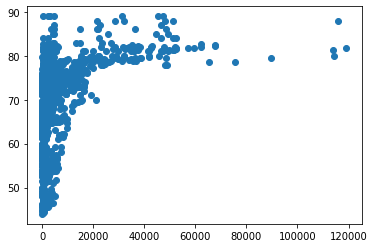

In [29]:
plt.scatter(data['GDP'], data['life expectancy'])